In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from sklearn import cluster
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm
import pandas as pd
from minisom import MiniSom
from datetime import datetime
from pathlib import Path
import os.path
import matplotlib.patches as mpatches
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from PIL import Image

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/ECLAT/C4_CP_AUX_ECLAT_REGION__20090701_000000_20091101_000000_V131120')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 region_interval__C4_CP_AUX_ECLAT_REGION CDF_EPOCH [68502, 2]
1 region_name__C4_CP_AUX_ECLAT_REGION CDF_CHAR*7 [68502]
2 mean_bxy_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
3 sd_bxy_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
4 mean_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
5 min_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
6 max_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
7 mean_density__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
8 mean_total_pressure__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
9 median_plasma_beta__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
10 percent_high_Vpar__C4_CP_AUX_ECLAT_REGION CDF_INT4 [68502]
11 percent_high_Vperp__C4_CP_AUX_ECLAT_REGION CDF_INT4 [68502]
12 Vx_min__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
13 Vx_max__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502]
14 sc_pos_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [68502, 3]
15 n_NS_crossings__C4_CP_AUX_ECLAT_REGION CDF_INT4 [68502]
16 n__C4_CP_AUX_ECLAT_REGION CDF_INT4 [68502]
17 min_data_res__C4_CP_AU

In [3]:
interval = cdf[0][...]
region = cdf[1][...]

UR: Undefined Region

NN_LOBE: Northern hemisphere tail lobe region

NN_BR: Northern hemisphere boundary region

NN_OPS: Northern hemisphere outer plasma sheet

NN_IPS: Northern hemisphere inner plasma sheet

NS_NSR: North-South crossing of the neutral sheet

00_NSR: Neutral sheet data point, Bx=0

SN_NSR: South-North crossing of the neutral sheet

SS_IPS: Southern hemisphere inner plasma sheet

SS_OPS: Southern hemisphere outer plasma sheet

SS_BR: Southern hemisphere boundary region

SS_LOBE: Southern hemisphere tail lobe region

In [4]:
#create an array of indices when Cluster is in PS 
N = [] 
region_list = list(region)

for i in range(len(region_list)):
    if region_list[i] == 'SS_LOBE':
        N.append(i)

In [5]:
#print interval durations (in seconds) when Cluster is in PS 
for j in range(len(N)):
    if (interval[N[j],1]-interval[N[j],0]).seconds > 3600:    #only look at intervals with duration > 1hr (3600)
        print(N[j],(interval[N[j],1]-interval[N[j],0]).seconds)

2573 4835
7674 9565
9379 7356
9381 4573
9383 5698
11372 5567
12457 6782
12461 4351
14422 7398
14428 4138
15658 14271
17089 5296
20580 7234
22885 4220
22897 4532
22898 4902
23479 16645
23486 3851
23530 3810
23538 4754
23540 7694
24821 4927
24829 5846
26849 3810
26851 8491
28366 4582
28376 8170
30426 4245
30547 14124
34027 8475
35783 8351
36895 3827
37314 4459
39108 9986
39765 3851
40605 6192
40637 4122
40645 8919
43026 3868
43063 5396
43065 3991
45330 5010
45390 10011
47428 9157
47440 7383
47892 3909
47924 5806
47955 4410
47957 12418
49212 3605
49232 11671
49246 10135
50560 6800
50562 6447
50568 5462
50570 5158
51950 7145
51952 3802
51956 8049
52709 3942
52772 4903
53814 5536
55332 4879
55591 11097
55597 6045
55601 12633
55787 5207
55799 4254
55811 9322
55817 8452
55903 3786
56034 6390
56038 7540
56040 6899
56378 7064
56382 7589
56415 4493
56421 4107
56803 3663
58471 3786
58694 4181
58909 4074
58931 6620
58933 5454
58935 5930
59577 4246
59676 4591
59690 3918
59925 4945
60025 4106
60031 

In [6]:
period = interval[49246]

In [7]:
time_array_start = (period[0].year,period[0].month,period[0].day,period[0].hour,period[0].minute,period[0].second)
time_array_end = (period[1].year,period[1].month,period[1].day,period[1].hour,period[1].minute,period[1].second)

strs = ["" for x in range(6)]
strs1 = ["" for x in range(6)]

for i in range(len(time_array_start)):
    if time_array_start[i]<10:
        strs[i]='0'+str(time_array_start[i])
    else:
        strs[i]=str(time_array_start[i])
    if time_array_end[i]<10:
        strs1[i]='0'+str(time_array_end[i])
    else:
        strs1[i]=str(time_array_end[i])

In [8]:
strs,strs1

(['2009', '09', '15', '12', '59', '53'],
 ['2009', '09', '15', '15', '48', '48'])

In [9]:
#NN_OPS
cdf1 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20020920_174003_20020920_191546_V170620.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf1, start=0):
    print(i, item, cdf1[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1428]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [10]:
epoch1 = cdf1[0][...]
data1 = cdf1[26][...]
energy1 = cdf1[20][...]
pa1 = cdf1[23][...]
for i in range(0,len(energy1[0])):
    print(i,energy1[0,i])

0 24023.0
1 19019.7
2 15231.0
3 12210.3
4 9777.4
5 7836.8
6 6294.6
7 5031.4
8 4042.1
9 3231.8
10 2593.6
11 2073.6
12 1662.0
13 1328.8
14 1066.3
15 852.78
16 686.63
17 549.54
18 441.09
19 353.69
20 283.62
21 226.03
22 180.69
23 145.09
24 116.42
25 93.56
26 74.645
27 60.124
28 48.038
29 38.938
30 31.075
31 25.432
32 20.564
33 16.49
34 13.186
35 10.572
36 9.209
37 8.154
38 7.116
39 5.913
40 -1.0
41 -1.0
42 -1.0
43 -1.0


In [11]:
#NN_OPS
cdf2 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20020913_131122_20020913_142253_V170620.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf2, start=0):
#     print(i, item, cdf2[i])
epoch2 = cdf2[0][...]
data2 = cdf2[26][...]
energy2 = cdf2[20][...]
pa2 = cdf2[23][...]
print(energy2[0,0:30])

[24023.    19019.7   15231.    12210.3    9777.4    7836.8    6294.6
  5031.4    4042.1    3231.8    2593.6    2073.6    1662.     1328.8
  1066.3     852.78    686.63    549.54    441.09    353.69    283.62
   226.03    180.69    145.09    116.42     93.56     74.645    60.124
    48.038    38.938]


In [12]:
#NN_OPS
cdf3 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20050807_104833_20050807_123236_V170628.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf3, start=0):
#     print(i, item, cdf3[i])
epoch3 = cdf3[0][...]
data3 = cdf3[26][...]
energy3 = cdf3[20][...]
pa3 = cdf3[23][...]
print(energy3[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [13]:
#NN_OPS
cdf4 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20050828_161837_20050828_180027_V170628.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf4, start=0):
#     print(i, item, cdf4[i])
epoch4 = cdf4[0][...]
data4 = cdf4[26][...]
energy4 = cdf4[20][...]
pa4 = cdf4[23][...]
print(energy4[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [14]:
#NN_OPS
cdf5= pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031013_075830_20031013_113207_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf5, start=0):
#     print(i, item, cdf5[i])
epoch5 = cdf5[0][...]
data5 = cdf5[26][...]
energy5 = cdf5[20][...]
pa5 = cdf5[23][...]
print(energy5[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [15]:
#NN_OPS
cdf6= pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031018_045433_20031018_075402_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf6, start=0):
#     print(i, item, cdf6[i])
epoch6 = cdf6[0][...]
data6 = cdf6[26][...]
energy6 = cdf6[20][...]
pa6 = cdf6[23][...]
print(energy6[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [16]:
#NN_IPS
cdf7= pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031011_050417_20031011_061328_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf7, start=0):
#     print(i, item, cdf7[i])
epoch7 = cdf7[0][...]
data7 = cdf7[26][...]
energy7 = cdf7[20][...]
pa7 = cdf7[23][...]
print(energy7[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [17]:
#NN_IPS
cdf8 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20070717_103913_20070717_122636_V170629')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf8, start=0):
#     print(i, item, cdf8[i])
epoch8 = cdf8[0][...]
data8 = cdf8[26][...]
energy8 = cdf8[20][...]
pa8 = cdf8[23][...]
print(energy8[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [18]:
#NN_IPS
cdf9 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20070717_070632_20070717_083245_V170629')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf9, start=0):
#     print(i, item, cdf9[i])
epoch9 = cdf9[0][...]
data9 = cdf9[26][...]
energy9 = cdf9[20][...]
pa9 = cdf9[23][...]
print(energy9[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [19]:
#SS_OPS
cdf10 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20031023_081241_20031023_135211_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf10, start=0):
#     print(i, item, cdf10[i])
epoch10 = cdf10[0][...]
data10 = cdf10[26][...]
energy10 = cdf10[20][...]
pa10 = cdf10[23][...]
print(energy10[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [20]:
#SS_IPS
cdf11 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20050810_021518_20050810_032129_V170628')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf11, start=0):
#     print(i, item, cdf11[i])
epoch11 = cdf11[0][...]
data11 = cdf11[26][...]
energy11 = cdf11[20][...]
pa11 = cdf11[23][...]
print(energy11[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [21]:
#SS_OPS
cdf12 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20081016_003641_20081016_014428_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf12, start=0):
#     print(i, item, cdf12[i])
epoch12 = cdf12[0][...]
data12 = cdf12[26][...]
energy12 = cdf12[20][...]
pa12 = cdf12[23][...]
print(energy12[0,0:30])

[24023.    19019.7   15231.    12210.3    9777.4    7836.8    6294.6
  5031.4    4042.1    3231.8    2593.6    2073.6    1662.     1328.8
  1066.3     852.78    686.63    549.54    441.09    353.69    283.62
   226.03    180.69    145.09    116.42     93.56     74.645    60.124
    48.038    38.938]


In [22]:
#SS_IPS
cdf13 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20040912_152547_20040912_162714_V170628')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf13, start=0):
#     print(i, item, cdf13[i])
epoch13 = cdf13[0][...]
data13 = cdf13[26][...]
energy13 = cdf13[20][...]
pa13 = cdf13[23][...]
print(energy13[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [23]:
#SS_IPS
cdf14 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20060804_052038_20060804_082059_V170629')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf14, start=0):
#     print(i, item, cdf14[i])
epoch14 = cdf14[0][...]
data14 = cdf14[26][...]
energy14 = cdf14[20][...]
pa14 = cdf14[23][...]
print(energy14[0,0:30])

[23896.    18968.5   15219.6   12188.9    9780.     7835.3    6283.9
  5028.2    4032.     3226.9    2588.8    2071.7    1661.7    1329.4
  1063.3     850.3     681.85    545.54    439.5     352.1     282.98
   226.28    181.54    145.8     117.35     94.251    75.614    60.893
    48.038    38.109]


In [24]:
#SS_OPS
cdf15 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__20090729_000007_20090729_010352_V160617')
#/disk/user1/mrb2/Cluster_data/... if on linux
# for (i, item) in enumerate(cdf15, start=0):
#     print(i, item, cdf15[i])
epoch15 = cdf15[0][...]
data15 = cdf15[26][...]
energy15 = cdf15[20][...]
pa15 = cdf15[23][...]
print(energy15[0,0:30])

[24023.    19019.7   15231.    12210.3    9777.4    7836.8    6294.6
  5031.4    4042.1    3231.8    2593.6    2073.6    1662.     1328.8
  1066.3     852.78    686.63    549.54    441.09    353.69    283.62
   226.03    180.69    145.09    116.42     93.56     74.645    60.124
    48.038    38.938]


In [25]:
#import cdf files from BRs and LOBEs
times = (('2002', '09', '01', '08', '49', '32','2002', '09', '01', '12', '10', '44'), # NN_LOBE
        ('2002', '09', '08', '14', '17', '19','2002', '09', '08', '17', '15', '48'), # NN_BR
        ('2002', '10', '29', '05', '31', '24','2002', '10', '29', '06', '51', '05'), # SS_BR
        ('2003', '09', '29', '02', '38', '25','2003', '09', '29', '05', '07', '01'), # NN_LOBE
        ('2004', '10', '22', '11', '54', '08','2004', '10', '22', '13', '12', '09'), # NN_BR
        ('2004', '10', '25', '15', '55', '02','2004', '10', '25', '17', '29', '19'), # SS_BR
        ('2005', '10', '12', '21', '03', '33','2005', '10', '12', '21', '04', '31'), # SS_BR
        ('2005', '08', '17', '13', '31', '44','2005', '08', '17', '14', '48', '09'), # NN_BR
        ('2006', '10', '07', '00', '00', '05','2006', '10', '07', '02', '48', '35'), # NN_LOBE
        ('2007', '08', '06', '17', '07', '06','2007', '08', '06', '19', '58', '28'), # SS_LOBE
        ('2008', '07', '26', '02', '27', '41','2008', '07', '26', '05', '53', '30'), # SS_LOBE
        ('2009', '09', '15', '12', '59', '53','2009', '09', '15', '15', '48', '48')) # SS_LOBE

In [26]:
#import cdf files from BRs and LOBEs

epoch_deflux = np.empty((0), int)
data_deflux = np.empty((0,12,44), int)

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    #remember .cdf 
    file = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V160617.cdf'
    file1 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170620.cdf'
    file2 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170628.cdf'
    file3 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170629.cdf'
    file4 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_PITCH_SPIN_DEFlux__'+stamp+'_V170630.cdf'

    if os.path.exists(file):
        cdf_deflux = pycdf.CDF(file)
    elif os.path.exists(file1):
        cdf_deflux = pycdf.CDF(file1)
    elif os.path.exists(file2):
        cdf_deflux = pycdf.CDF(file2)
    elif os.path.exists(file3):
        cdf_deflux = pycdf.CDF(file3)
    elif os.path.exists(file4):
        cdf_deflux = pycdf.CDF(file4)
    
    epoch_deflux = np.append(epoch_deflux,cdf_deflux[0][...],axis=0)
    data_deflux = np.append(data_deflux,cdf_deflux[26][...],axis=0)
    
print(np.shape(epoch_deflux))
print(np.shape(data_deflux))

(23114,)
(23114, 12, 44)


In [27]:
#combine all data and epochs and flatten

data_all = np.concatenate((data1[:,:,0:26],data2[:,:,0:26],data3[:,:,0:26],data4[:,:,0:26],data5[:,:,0:26],data6[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch1[:],epoch2[:],epoch3[:],epoch4[:],epoch5[:],epoch6[:]),axis=0)
############### try removing data5 to look at big cluster

#combine NN_OPS with NN_IPS:
data_all = np.concatenate((data_all[:,:,:],data7[:,:,0:26],data8[:,:,0:26],data9[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch_all[:],epoch7[:],epoch8[:],epoch9[:]),axis=0)

#combine NN_OPS and NN_IPS with SS_OPS and SS_IPS
data_all = np.concatenate((data_all[:,:,:],data10[:,:,0:26],data11[:,:,0:26],data12[:,:,0:26],data13[:,:,0:26],data14[:,:,0:26],data15[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch_all[:],epoch10[:],epoch11[:],epoch12[:],epoch13[:],epoch14[:],epoch15[:]),axis=0)

#combine plasma sheet periods with BR and Lobes
data_all = np.concatenate((data_all[:,:,:],data_deflux[:,:,0:26]),axis=0)
epoch_all = np.concatenate((epoch_all[:],epoch_deflux[:]),axis=0)

##normalise each data period separately:
#data_all = np.concatenate((data1[:,:,0:26]/np.max(data1[:,:,0:26]),data2[:,:,0:26]/np.max(data2[:,:,0:26]),data3[:,:,0:26]/np.max(data3[:,:,0:26]),data4[:,:,0:26]/np.max(data4[:,:,0:26]),data5[:,:,0:26]/np.max(data5[:,:,0:26]),data6[:,:,0:26]/np.max(data6[:,:,0:26])),axis=0)

print(data_all.shape)
print(epoch_all.shape)
new_data_all = data_all.reshape(len(data_all),-1)
print(new_data_all.shape)

(49721, 12, 26)
(49721,)
(49721, 312)


(1428, 2)


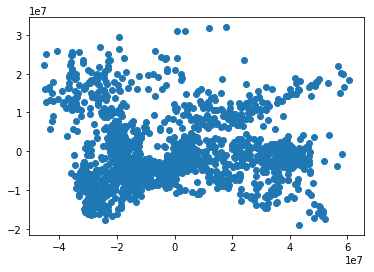

In [28]:
new_data1 = data1[:,:,0:26].reshape(len(epoch1),-1)
model1 = PCA(n_components=2)
model1.fit(new_data1)
new_data1_2d = model1.transform(new_data1)
print(new_data1_2d.shape)
plt.scatter(new_data1_2d[:,0],new_data1_2d[:,1])

(3184, 2)


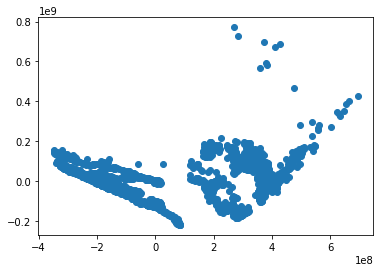

In [29]:
new_data5 = data5[:,:,0:26].reshape(len(epoch5),-1)
model5 = PCA(n_components=2)
model5.fit(new_data5)
new_data5_2d = model5.transform(new_data5)
print(new_data5_2d.shape)
plt.scatter(new_data5_2d[:,0],new_data5_2d[:,1])

(1245, 2)


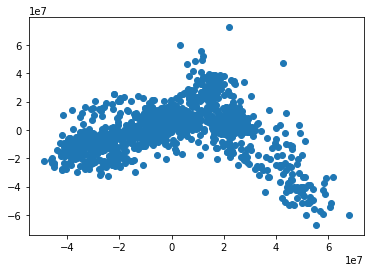

In [30]:
new_data9 = data9[:,:,0:26].reshape(len(epoch9),-1)
model9 = PCA(n_components=2)
model9.fit(new_data9)
new_data9_2d = model9.transform(new_data9)
print(new_data9_2d.shape)
plt.scatter(new_data9_2d[:,0],new_data9_2d[:,1])

(49721, 2)


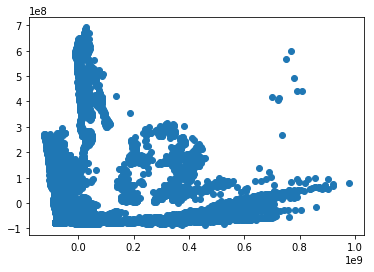

In [31]:
# fit pca 2-components to all flattened data, pre-autoencoder

model_all = PCA(n_components=2)
model_all.fit(new_data_all)
new_data_all_2d = model_all.transform(new_data_all)
print(new_data_all_2d.shape)
plt.scatter(new_data_all_2d[:,0],new_data_all_2d[:,1])

In [32]:
#look at outliers from above
df = pd.DataFrame({'PCA1': new_data_all_2d[:,0], 'PCA2': new_data_all_2d[:,1]})
new_df = df.sort_values(by='PCA1')
new_df.tail(5)

PCA1          PCA2
15491  9.015758e+08  5.737142e+07
8640   9.024977e+08  9.450347e+07
15494  9.209891e+08  6.909542e+07
15495  9.212148e+08  7.331319e+07
15493  9.770639e+08  7.775846e+07

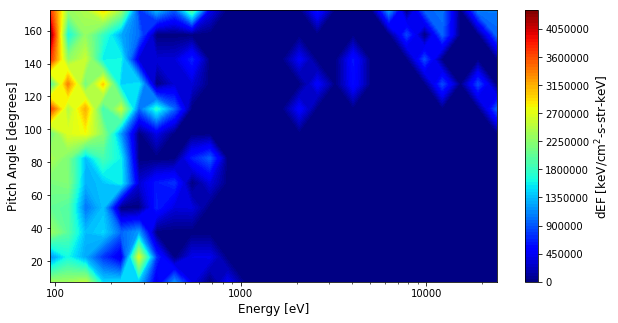

In [33]:
#example of distribution
time = 27164

#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy4[0,0:26],pa4)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = (data_all[time,0:len(pa4),0:26])
#surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12) ####Particle or Energy Flux
ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
ax.set_xlabel('Energy [eV]',fontsize=12)
ax.set_xscale('log')
#ax.set_xticks([50, 100, 200, 300, 400, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_xlim(0,5)
plt.show()

# Autoencoders

In [34]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 9.75, assuming the input is 312 floats

# this is our input placeholder
input_img = Input(shape=(312,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(312, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [36]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [37]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [38]:
# make sure to use flattened data
x = new_data_all
x_train, x_test = train_test_split(x, test_size=0.5, random_state=4)
print(x_train.shape)
print(x_test.shape)

(24860, 312)
(24861, 312)


In [39]:
x_all = x.astype('float32') / np.max(x)
x_train = x_train.astype('float32') / np.max(x)
x_test = x_test.astype('float32') / np.max(x)

In [40]:
autoencoder.fit(x_all, x_all, ## x_all,x_all or x_train,x_train
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_split=1/12.) # validation_split=1/12. or validation_test = x_test,x_test
                #last line helps model calculate val_loss

Train on 45577 samples, validate on 4144 samples
Epoch 1/500
45577/45577 [==============================] - 1s 17us/step - loss: 0.5783 - val_loss: 0.3140
Epoch 2/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.1572 - val_loss: 0.0605
Epoch 3/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.1074 - val_loss: 0.0408
Epoch 4/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.1006 - val_loss: 0.0341
Epoch 5/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0962 - val_loss: 0.0303
Epoch 6/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0929 - val_loss: 0.0275
Epoch 7/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0905 - val_loss: 0.0253
Epoch 8/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0888 - val_loss: 0.0235
Epoch 9/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0876 - val_loss: 0.02

45577/45577 [==============================] - 0s 11us/step - loss: 0.0768 - val_loss: 0.0162
Epoch 78/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0767 - val_loss: 0.0162
Epoch 79/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0767 - val_loss: 0.0162
Epoch 80/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0767 - val_loss: 0.0161
Epoch 81/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0766 - val_loss: 0.0161
Epoch 82/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0766 - val_loss: 0.0161
Epoch 83/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0766 - val_loss: 0.0161
Epoch 84/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0766 - val_loss: 0.0161
Epoch 85/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0765 - val_loss: 0.0161
Epoch 86/500
45577/45577 [========================

45577/45577 [==============================] - 0s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 154/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 155/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 156/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 157/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 158/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 159/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 160/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 161/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0753 - val_loss: 0.0152
Epoch 162/500
45577/45577 [===============

Epoch 229/500
45577/45577 [==============================] - 1s 13us/step - loss: 0.0749 - val_loss: 0.0148
Epoch 230/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0749 - val_loss: 0.0147
Epoch 231/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 232/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 233/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 234/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 235/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 236/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 237/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0748 - val_loss: 0.0147
Epoch 238/500
45577/45577 [=

Epoch 305/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 306/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 307/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 308/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 309/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 310/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 311/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 312/500
45577/45577 [==============================] - 1s 12us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 313/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0746 - val_loss: 0.0144
Epoch 314/500
45577/45577 [=

Epoch 381/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 382/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 383/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 384/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 385/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 386/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 387/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 388/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 389/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0744 - val_loss: 0.0142
Epoch 390/500
45577/45577 [=

Epoch 457/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 458/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 459/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 460/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 461/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 462/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 463/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 464/500
45577/45577 [==============================] - 1s 11us/step - loss: 0.0743 - val_loss: 0.0141
Epoch 465/500
45577/45577 [==============================] - 0s 11us/step - loss: 0.0743 - val_loss: 0.0140
Epoch 466/500
45577/45577 [=

In [41]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_all) ## x_all or (x_test)
decoded_imgs = decoder.predict(encoded_imgs) ## same as autoencoder.predict(x_all)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(49721, 32)
(49721, 312)


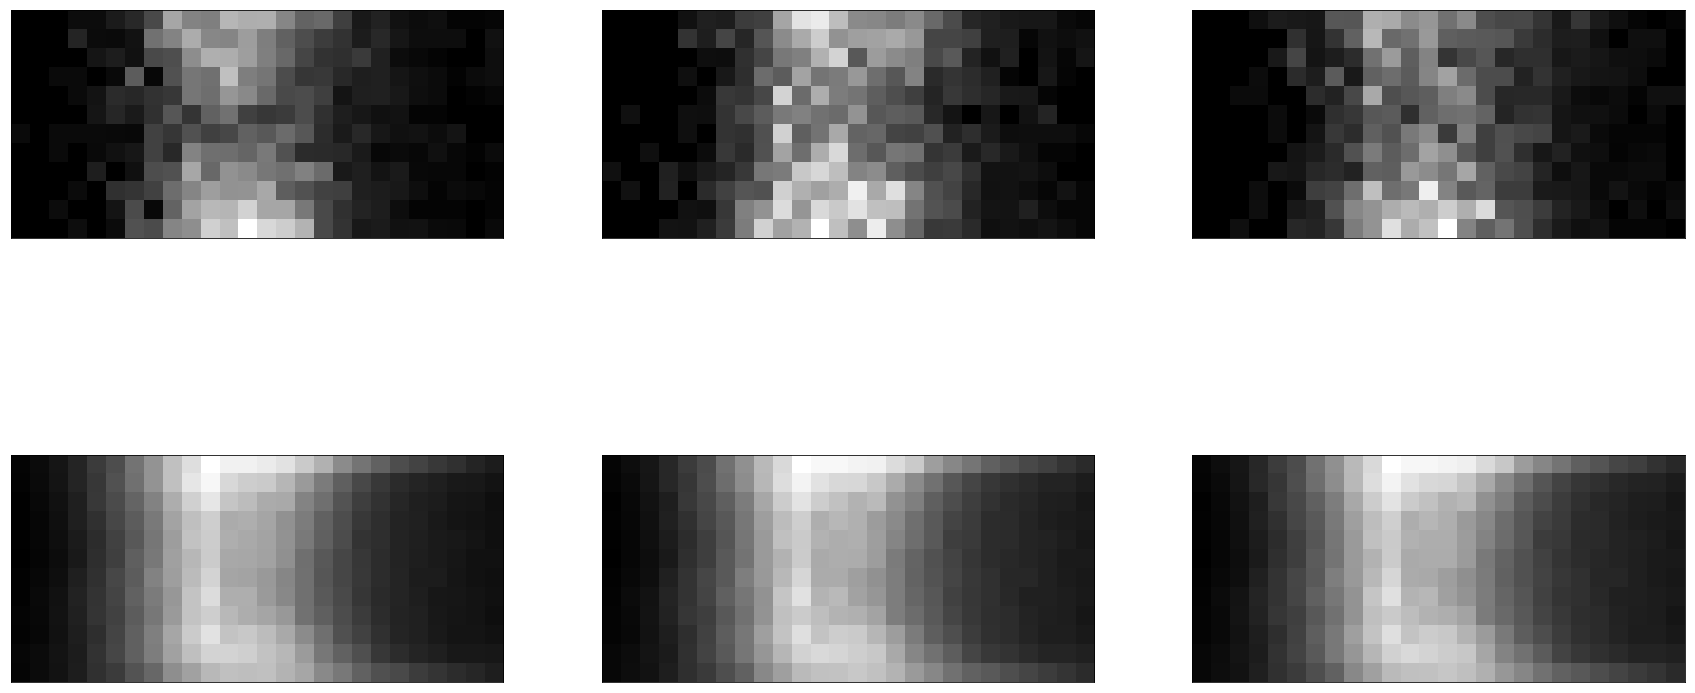

In [42]:
n = 3  # how many digits we will display
plt.figure(figsize=(30,15))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_all[i].reshape(12, 26)) ## x_all or x_test
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(12, 26))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [43]:
##### Outlier detection using Autoencoders
errors = []

for i in range(0,len(x_all)):
    mse = np.mean((x_all[i] - decoded_imgs[i])**2)
    errors.append(mse)

In [44]:
#threshold to determine which data are outliers, based on error

threshold = np.quantile(errors,0.995) 
print('mse 99.5% threshold:',threshold)

mse 99.5% threshold: 0.0010774156078696285


In [45]:
indexes = np.where(np.array(errors) >= threshold)[0]

In [46]:
for i in range(len(indexes)):
    print(indexes[i], epoch_all[indexes[i]])

4233 2005-08-28 16:34:38.249000
4235 2005-08-28 16:34:46.537000
4353 2005-08-28 16:42:55.768000
4355 2005-08-28 16:43:04.063000
4356 2005-08-28 16:43:08.209000
4358 2005-08-28 16:43:16.502000
4359 2005-08-28 16:43:20.647000
4361 2005-08-28 16:43:28.939000
4364 2005-08-28 16:43:41.369000
8590 2003-10-13 11:27:30.690000
8631 2003-10-13 11:30:15.025000
8632 2003-10-13 11:30:19.031000
8634 2003-10-13 11:30:27.050000
8635 2003-10-13 11:30:31.059000
8637 2003-10-13 11:30:39.075000
8638 2003-10-13 11:30:43.080000
8639 2003-10-13 11:30:47.088000
8640 2003-10-13 11:30:51.095000
8641 2003-10-13 11:30:55.100000
8642 2003-10-13 11:30:59.112000
8643 2003-10-13 11:31:03.124000
8644 2003-10-13 11:31:07.131000
8645 2003-10-13 11:31:11.139000
8646 2003-10-13 11:31:15.148000
8647 2003-10-13 11:31:19.152000
8650 2003-10-13 11:31:31.176000
8651 2003-10-13 11:31:35.184000
8652 2003-10-13 11:31:39.196000
8653 2003-10-13 11:31:43.203000
8654 2003-10-13 11:31:47.213000
8655 2003-10-13 11:31:51.223000
8656 200

In [47]:
epoch_all[4364]

datetime.datetime(2005, 8, 28, 16, 43, 41, 369000)

(49721, 2)


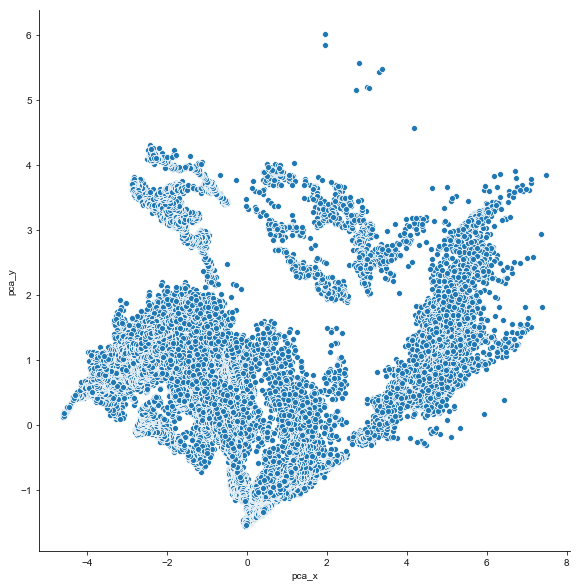

In [48]:
# try pca-2 for encoded 32 dimension testing data, pre decoding (recommended as data is in lower dimension format)

model_encoder = PCA(n_components=2)
encoded_imgs_2d = model_encoder.fit_transform(encoded_imgs)
print(encoded_imgs_2d.shape)
df_pca = pd.DataFrame({'pca_x':encoded_imgs_2d[:,0], 'pca_y':encoded_imgs_2d[:,1]})
sns.pairplot(x_vars=['pca_x'], y_vars=['pca_y'], data=df_pca, height=8)
sns.set(style="whitegrid")

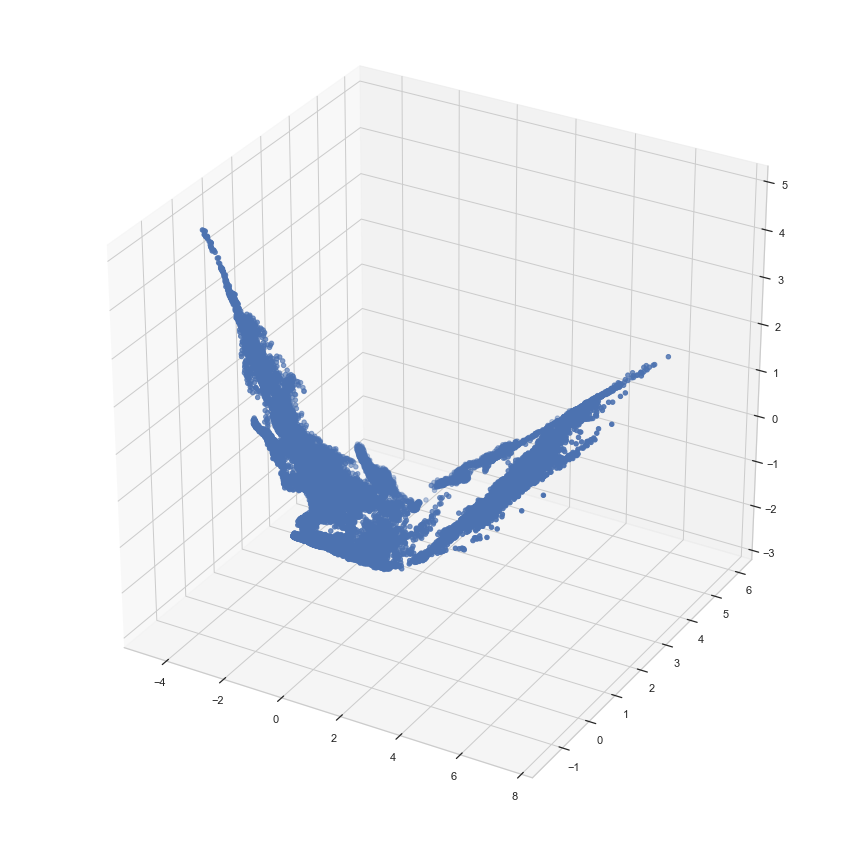

In [49]:
# try pca-3 for encoded 32 dimension testing data, pre decoding (recommended as data is in lower dimension format)

model_encoder = PCA(n_components=3)
encoded_imgs_3d = model_encoder.fit_transform(encoded_imgs)

%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs_3d[:,0],encoded_imgs_3d[:,1],encoded_imgs_3d[:,2])

In [54]:
## estimate how many regions exist in the pca_3D data
ms_clustering = MeanShift(bandwidth=1.05,bin_seeding=True).fit(encoded_imgs_3d)

In [55]:
Counter(ms_clustering.labels_)

Counter({1: 9159, 2: 8661, 0: 23347, 4: 2398, 5: 1022, 7: 52, 3: 5075, 6: 7})

In [56]:
## use to estimate probabilities of assigning a data point to each cluster
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(encoded_imgs_3d)
gmm_clustering = gmm.predict(encoded_imgs_3d)

In [57]:
gmm.predict_proba(encoded_imgs_3d)[15000]

array([1.12495460e-08, 7.15691016e-52, 3.69571835e-01, 0.00000000e+00,
       1.47888663e-06, 0.00000000e+00, 6.30426675e-01, 0.00000000e+00])

In [95]:
ac_clustering_3 = np.load('ac_clustering_3.npz')['arr_0']

In [96]:
palette=['steelblue','darkorange','forestgreen','firebrick','purple','sienna','palevioletred','grey']

In [60]:
encoded_imgs_3d_0 = []
encoded_imgs_3d_1 = []
encoded_imgs_3d_2 = []
encoded_imgs_3d_3 = []
encoded_imgs_3d_4 = []
encoded_imgs_3d_5 = []
encoded_imgs_3d_6 = []
encoded_imgs_3d_7 = []

for i in range(len(ac_clustering_3)):
    if ac_clustering_3[i] == 0:
        encoded_imgs_3d_0.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 1:
        encoded_imgs_3d_1.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 2:
        encoded_imgs_3d_2.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 3:
        encoded_imgs_3d_3.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 4:
        encoded_imgs_3d_4.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 5:
        encoded_imgs_3d_5.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 6:
        encoded_imgs_3d_6.append(encoded_imgs_3d[i])
    if ac_clustering_3[i] == 7:
        encoded_imgs_3d_7.append(encoded_imgs_3d[i])

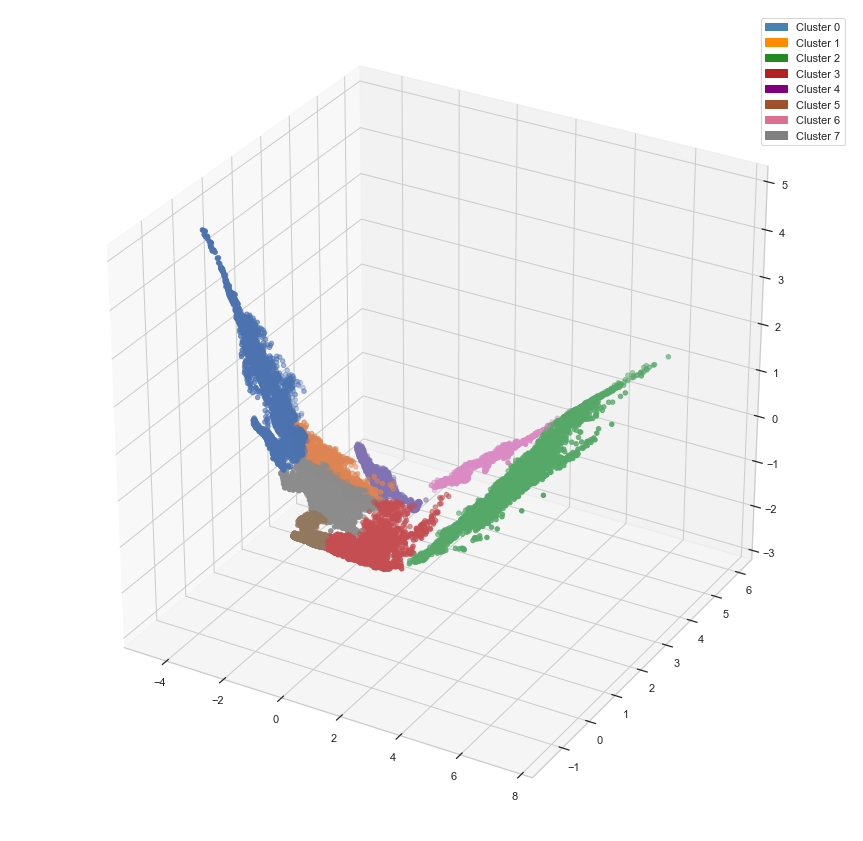

In [61]:
%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(encoded_imgs_3d_0)[:,0],np.array(encoded_imgs_3d_0)[:,1],np.array(encoded_imgs_3d_0)[:,2])
ax.scatter(np.array(encoded_imgs_3d_1)[:,0],np.array(encoded_imgs_3d_1)[:,1],np.array(encoded_imgs_3d_1)[:,2])
ax.scatter(np.array(encoded_imgs_3d_2)[:,0],np.array(encoded_imgs_3d_2)[:,1],np.array(encoded_imgs_3d_2)[:,2])
ax.scatter(np.array(encoded_imgs_3d_3)[:,0],np.array(encoded_imgs_3d_3)[:,1],np.array(encoded_imgs_3d_3)[:,2])
ax.scatter(np.array(encoded_imgs_3d_4)[:,0],np.array(encoded_imgs_3d_4)[:,1],np.array(encoded_imgs_3d_4)[:,2])
ax.scatter(np.array(encoded_imgs_3d_5)[:,0],np.array(encoded_imgs_3d_5)[:,1],np.array(encoded_imgs_3d_5)[:,2])
ax.scatter(np.array(encoded_imgs_3d_6)[:,0],np.array(encoded_imgs_3d_6)[:,1],np.array(encoded_imgs_3d_6)[:,2])
ax.scatter(np.array(encoded_imgs_3d_7)[:,0],np.array(encoded_imgs_3d_7)[:,1],np.array(encoded_imgs_3d_7)[:,2])

blue = mpatches.Patch(color=palette[0], label='Cluster 0')
orange = mpatches.Patch(color=palette[1], label='Cluster 1')
green = mpatches.Patch(color=palette[2], label='Cluster 2')
red = mpatches.Patch(color=palette[3], label='Cluster 3')
purple = mpatches.Patch(color=palette[4], label='Cluster 4')
brown = mpatches.Patch(color=palette[5], label='Cluster 5')
pink = mpatches.Patch(color=palette[6], label='Cluster 6')
grey = mpatches.Patch(color=palette[7], label='Cluster 7')

plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

In [100]:
df_ac_clustering_3 = pd.DataFrame({'Timestamp':epoch_all,'ac_clustering_x':encoded_imgs_3d[:,0], 'ac_clustering_y':encoded_imgs_3d[:,1], 'ac_clustering_z':encoded_imgs_3d[:,2]})
df_ac_clustering_3['key_ac_clustering'] = ac_clustering_3
df_ac_clustering_3['ac_results'] = ac_clustering_3

In [98]:
Counter(df_ac_clustering_3['key_ac_clustering'])

Counter({7: 8077,
         1: 3074,
         5: 18025,
         0: 6549,
         4: 2097,
         6: 1029,
         2: 5092,
         3: 5778})

In [64]:
for i in range(len(epoch_all)):
    print(i,' ',epoch_all[i],' ',ac_clustering_3[i])

0   2002-09-20 17:40:06.154000   7
1   2002-09-20 17:40:10.166000   7
2   2002-09-20 17:40:14.176000   7
3   2002-09-20 17:40:18.188000   7
4   2002-09-20 17:40:22.197000   7
5   2002-09-20 17:40:26.208000   7
6   2002-09-20 17:40:30.222000   7
7   2002-09-20 17:40:34.232000   7
8   2002-09-20 17:40:38.242000   7
9   2002-09-20 17:40:42.251000   7
10   2002-09-20 17:40:46.262000   7
11   2002-09-20 17:40:50.276000   7
12   2002-09-20 17:40:54.287000   7
13   2002-09-20 17:40:58.298000   7
14   2002-09-20 17:41:02.310000   7
15   2002-09-20 17:41:06.322000   7
16   2002-09-20 17:41:10.331000   7
17   2002-09-20 17:41:14.342000   7
18   2002-09-20 17:41:18.354000   7
19   2002-09-20 17:41:22.365000   7
20   2002-09-20 17:41:26.374000   7
21   2002-09-20 17:41:30.381000   7
22   2002-09-20 17:41:34.395000   7
23   2002-09-20 17:41:38.406000   7
24   2002-09-20 17:41:42.417000   7
25   2002-09-20 17:41:46.432000   7
26   2002-09-20 17:41:50.443000   7
27   2002-09-20 17:41:54.454000   7
28

407   2002-09-20 18:07:30.697000   7
408   2002-09-20 18:07:34.713000   7
409   2002-09-20 18:07:38.724000   7
410   2002-09-20 18:07:42.735000   7
411   2002-09-20 18:07:46.746000   7
412   2002-09-20 18:07:50.758000   7
413   2002-09-20 18:07:54.764000   7
414   2002-09-20 18:07:58.776000   7
415   2002-09-20 18:08:02.791000   7
416   2002-09-20 18:08:06.795000   7
417   2002-09-20 18:08:10.807000   7
418   2002-09-20 18:08:14.817000   7
419   2002-09-20 18:08:18.822000   7
420   2002-09-20 18:08:22.839000   7
421   2002-09-20 18:08:26.857000   7
422   2002-09-20 18:08:30.868000   7
423   2002-09-20 18:08:34.880000   7
424   2002-09-20 18:08:38.890000   7
425   2002-09-20 18:08:42.900000   7
426   2002-09-20 18:08:46.912000   7
427   2002-09-20 18:08:50.921000   7
428   2002-09-20 18:08:54.929000   7
429   2002-09-20 18:08:58.942000   7
430   2002-09-20 18:09:02.957000   7
431   2002-09-20 18:09:06.969000   7
432   2002-09-20 18:09:10.980000   7
433   2002-09-20 18:09:14.991000   7
4

707   2002-09-20 18:27:34.031000   7
708   2002-09-20 18:27:38.041000   7
709   2002-09-20 18:27:42.051000   7
710   2002-09-20 18:27:46.062000   7
711   2002-09-20 18:27:50.071000   7
712   2002-09-20 18:27:54.082000   7
713   2002-09-20 18:27:58.096000   7
714   2002-09-20 18:28:02.103000   7
715   2002-09-20 18:28:06.115000   7
716   2002-09-20 18:28:10.129000   7
717   2002-09-20 18:28:14.137000   7
718   2002-09-20 18:28:18.149000   7
719   2002-09-20 18:28:22.163000   7
720   2002-09-20 18:28:26.174000   7
721   2002-09-20 18:28:30.185000   7
722   2002-09-20 18:28:34.195000   7
723   2002-09-20 18:28:38.206000   7
724   2002-09-20 18:28:42.218000   7
725   2002-09-20 18:28:46.226000   7
726   2002-09-20 18:28:50.233000   7
727   2002-09-20 18:28:54.248000   7
728   2002-09-20 18:28:58.263000   7
729   2002-09-20 18:29:02.274000   7
730   2002-09-20 18:29:06.285000   7
731   2002-09-20 18:29:10.295000   7
732   2002-09-20 18:29:14.305000   7
733   2002-09-20 18:29:18.317000   7
7

1106   2002-09-20 18:54:14.456000   7
1107   2002-09-20 18:54:18.463000   7
1108   2002-09-20 18:54:22.475000   7
1109   2002-09-20 18:54:26.486000   7
1110   2002-09-20 18:54:30.493000   7
1111   2002-09-20 18:54:34.509000   7
1112   2002-09-20 18:54:38.523000   7
1113   2002-09-20 18:54:42.534000   7
1114   2002-09-20 18:54:46.545000   7
1115   2002-09-20 18:54:50.556000   7
1116   2002-09-20 18:54:54.567000   7
1117   2002-09-20 18:54:58.579000   7
1118   2002-09-20 18:55:02.587000   7
1119   2002-09-20 18:55:06.594000   7
1120   2002-09-20 18:55:10.604000   7
1121   2002-09-20 18:55:14.615000   7
1122   2002-09-20 18:55:18.631000   7
1123   2002-09-20 18:55:22.641000   7
1124   2002-09-20 18:55:26.649000   7
1125   2002-09-20 18:55:30.663000   7
1126   2002-09-20 18:55:34.678000   7
1127   2002-09-20 18:55:38.690000   7
1128   2002-09-20 18:55:42.701000   7
1129   2002-09-20 18:55:46.712000   7
1130   2002-09-20 18:55:50.724000   7
1131   2002-09-20 18:55:54.734000   7
1132   2002-

1506   2002-09-13 13:16:38.351000   7
1507   2002-09-13 13:16:42.358000   7
1508   2002-09-13 13:16:46.371000   7
1509   2002-09-13 13:16:50.382000   7
1510   2002-09-13 13:16:54.393000   7
1511   2002-09-13 13:16:58.408000   7
1512   2002-09-13 13:17:02.419000   7
1513   2002-09-13 13:17:06.429000   7
1514   2002-09-13 13:17:10.440000   7
1515   2002-09-13 13:17:14.451000   7
1516   2002-09-13 13:17:18.462000   7
1517   2002-09-13 13:17:22.473000   7
1518   2002-09-13 13:17:26.481000   7
1519   2002-09-13 13:17:30.492000   7
1520   2002-09-13 13:17:34.508000   7
1521   2002-09-13 13:17:38.515000   7
1522   2002-09-13 13:17:42.526000   7
1523   2002-09-13 13:17:46.538000   7
1524   2002-09-13 13:17:50.548000   7
1525   2002-09-13 13:17:54.561000   7
1526   2002-09-13 13:17:58.572000   7
1527   2002-09-13 13:18:02.584000   7
1528   2002-09-13 13:18:06.595000   7
1529   2002-09-13 13:18:10.606000   7
1530   2002-09-13 13:18:14.617000   7
1531   2002-09-13 13:18:18.629000   7
1532   2002-

1906   2002-09-13 13:43:22.769000   7
1907   2002-09-13 13:43:26.784000   7
1908   2002-09-13 13:43:30.795000   7
1909   2002-09-13 13:43:34.805000   7
1910   2002-09-13 13:43:38.815000   7
1911   2002-09-13 13:43:42.826000   7
1912   2002-09-13 13:43:46.838000   7
1913   2002-09-13 13:43:50.849000   7
1914   2002-09-13 13:43:54.860000   7
1915   2002-09-13 13:43:58.872000   7
1916   2002-09-13 13:44:02.880000   7
1917   2002-09-13 13:44:06.887000   7
1918   2002-09-13 13:44:10.900000   7
1919   2002-09-13 13:44:14.915000   7
1920   2002-09-13 13:44:18.927000   7
1921   2002-09-13 13:44:22.937000   7
1922   2002-09-13 13:44:26.948000   7
1923   2002-09-13 13:44:30.959000   7
1924   2002-09-13 13:44:34.971000   7
1925   2002-09-13 13:44:38.979000   7
1926   2002-09-13 13:44:42.986000   7
1927   2002-09-13 13:44:47.001000   7
1928   2002-09-13 13:44:51.012000   7
1929   2002-09-13 13:44:55.023000   7
1930   2002-09-13 13:44:59.038000   7
1931   2002-09-13 13:45:03.048000   7
1932   2002-

2306   2002-09-13 14:10:07.193000   1
2307   2002-09-13 14:10:11.202000   1
2308   2002-09-13 14:10:15.213000   1
2309   2002-09-13 14:10:19.222000   1
2310   2002-09-13 14:10:23.231000   1
2311   2002-09-13 14:10:27.244000   1
2312   2002-09-13 14:10:31.258000   1
2313   2002-09-13 14:10:35.270000   1
2314   2002-09-13 14:10:39.281000   1
2315   2002-09-13 14:10:43.292000   1
2316   2002-09-13 14:10:47.302000   1
2317   2002-09-13 14:10:51.313000   1
2318   2002-09-13 14:10:55.324000   1
2319   2002-09-13 14:10:59.335000   1
2320   2002-09-13 14:11:03.346000   1
2321   2002-09-13 14:11:07.350000   1
2322   2002-09-13 14:11:11.362000   1
2323   2002-09-13 14:11:15.377000   1
2324   2002-09-13 14:11:19.384000   1
2325   2002-09-13 14:11:23.397000   1
2326   2002-09-13 14:11:27.412000   1
2327   2002-09-13 14:11:31.424000   1
2328   2002-09-13 14:11:35.434000   1
2329   2002-09-13 14:11:39.445000   1
2330   2002-09-13 14:11:43.453000   1
2331   2002-09-13 14:11:47.464000   1
2332   2002-

2706   2005-08-07 11:03:03.482000   7
2707   2005-08-07 11:03:07.631000   7
2708   2005-08-07 11:03:11.784000   7
2709   2005-08-07 11:03:15.931000   7
2710   2005-08-07 11:03:20.077000   7
2711   2005-08-07 11:03:24.222000   7
2712   2005-08-07 11:03:28.368000   7
2713   2005-08-07 11:03:32.513000   7
2714   2005-08-07 11:03:36.655000   7
2715   2005-08-07 11:03:40.797000   7
2716   2005-08-07 11:03:44.941000   7
2717   2005-08-07 11:03:49.086000   7
2718   2005-08-07 11:03:53.238000   7
2719   2005-08-07 11:03:57.388000   7
2720   2005-08-07 11:04:01.533000   7
2721   2005-08-07 11:04:05.679000   7
2722   2005-08-07 11:04:09.824000   7
2723   2005-08-07 11:04:13.970000   7
2724   2005-08-07 11:04:18.116000   7
2725   2005-08-07 11:04:22.258000   7
2726   2005-08-07 11:04:26.400000   7
2727   2005-08-07 11:04:30.545000   7
2728   2005-08-07 11:04:34.695000   7
2729   2005-08-07 11:04:38.845000   7
2730   2005-08-07 11:04:42.991000   7
2731   2005-08-07 11:04:47.137000   7
2732   2005-

3106   2005-08-07 11:30:41.773000   0
3107   2005-08-07 11:30:45.922000   0
3108   2005-08-07 11:30:50.069000   0
3109   2005-08-07 11:30:54.215000   0
3110   2005-08-07 11:30:58.360000   0
3111   2005-08-07 11:31:02.506000   0
3112   2005-08-07 11:31:06.652000   0
3113   2005-08-07 11:31:10.794000   0
3114   2005-08-07 11:31:14.936000   0
3115   2005-08-07 11:31:19.081000   0
3116   2005-08-07 11:31:23.229000   0
3117   2005-08-07 11:31:27.379000   0
3118   2005-08-07 11:31:31.526000   0
3119   2005-08-07 11:31:35.671000   0
3120   2005-08-07 11:31:39.817000   0
3121   2005-08-07 11:31:43.963000   0
3122   2005-08-07 11:31:48.108000   0
3123   2005-08-07 11:31:52.254000   0
3124   2005-08-07 11:31:56.396000   0
3125   2005-08-07 11:32:00.542000   0
3126   2005-08-07 11:32:04.689000   0
3127   2005-08-07 11:32:08.834000   0
3128   2005-08-07 11:32:12.983000   0
3129   2005-08-07 11:32:17.129000   0
3130   2005-08-07 11:32:21.275000   0
3131   2005-08-07 11:32:25.420000   0
3132   2005-

3506   2005-08-07 11:58:20.060000   0
3507   2005-08-07 11:58:24.207000   0
3508   2005-08-07 11:58:28.353000   0
3509   2005-08-07 11:58:32.498000   0
3510   2005-08-07 11:58:36.644000   0
3511   2005-08-07 11:58:40.789000   0
3512   2005-08-07 11:58:44.925000   0
3513   2005-08-07 11:58:49.071000   0
3514   2005-08-07 11:58:53.227000   0
3515   2005-08-07 11:58:57.373000   0
3516   2005-08-07 11:59:01.518000   0
3517   2005-08-07 11:59:05.664000   0
3518   2005-08-07 11:59:09.809000   0
3519   2005-08-07 11:59:13.955000   0
3520   2005-08-07 11:59:18.101000   0
3521   2005-08-07 11:59:22.246000   0
3522   2005-08-07 11:59:26.391000   0
3523   2005-08-07 11:59:30.537000   0
3524   2005-08-07 11:59:34.684000   0
3525   2005-08-07 11:59:38.828000   0
3526   2005-08-07 11:59:42.973000   0
3527   2005-08-07 11:59:47.121000   0
3528   2005-08-07 11:59:51.267000   0
3529   2005-08-07 11:59:55.412000   0
3530   2005-08-07 11:59:59.558000   0
3531   2005-08-07 12:00:03.704000   0
3532   2005-

3906   2005-08-07 12:25:58.345000   7
3907   2005-08-07 12:26:02.491000   7
3908   2005-08-07 12:26:06.636000   7
3909   2005-08-07 12:26:10.782000   7
3910   2005-08-07 12:26:14.924000   7
3911   2005-08-07 12:26:19.065000   7
3912   2005-08-07 12:26:23.215000   7
3913   2005-08-07 12:26:27.365000   7
3914   2005-08-07 12:26:31.511000   7
3915   2005-08-07 12:26:35.656000   7
3916   2005-08-07 12:26:39.802000   7
3917   2005-08-07 12:26:43.947000   7
3918   2005-08-07 12:26:48.094000   7
3919   2005-08-07 12:26:52.239000   7
3920   2005-08-07 12:26:56.380000   7
3921   2005-08-07 12:27:00.518000   7
3922   2005-08-07 12:27:04.667000   7
3923   2005-08-07 12:27:08.821000   7
3924   2005-08-07 12:27:12.967000   7
3925   2005-08-07 12:27:17.112000   7
3926   2005-08-07 12:27:21.259000   7
3927   2005-08-07 12:27:25.405000   7
3928   2005-08-07 12:27:29.551000   7
3929   2005-08-07 12:27:33.696000   7
3930   2005-08-07 12:27:37.838000   7
3931   2005-08-07 12:27:41.981000   7
3932   2005-

4306   2005-08-28 16:39:40.908000   1
4307   2005-08-28 16:39:45.054000   1
4308   2005-08-28 16:39:49.200000   1
4309   2005-08-28 16:39:53.341000   1
4310   2005-08-28 16:39:57.484000   1
4311   2005-08-28 16:40:01.635000   1
4312   2005-08-28 16:40:05.785000   1
4313   2005-08-28 16:40:09.930000   1
4314   2005-08-28 16:40:14.075000   1
4315   2005-08-28 16:40:18.222000   1
4316   2005-08-28 16:40:22.368000   1
4317   2005-08-28 16:40:26.515000   1
4318   2005-08-28 16:40:30.660000   1
4319   2005-08-28 16:40:34.802000   1
4320   2005-08-28 16:40:38.945000   1
4321   2005-08-28 16:40:43.091000   1
4322   2005-08-28 16:40:47.241000   1
4323   2005-08-28 16:40:51.385000   1
4324   2005-08-28 16:40:55.531000   1
4325   2005-08-28 16:40:59.682000   1
4326   2005-08-28 16:41:03.829000   1
4327   2005-08-28 16:41:07.975000   1
4328   2005-08-28 16:41:12.121000   1
4329   2005-08-28 16:41:16.266000   1
4330   2005-08-28 16:41:20.412000   1
4331   2005-08-28 16:41:24.554000   1
4332   2005-

4706   2005-08-28 17:07:19.317000   1
4707   2005-08-28 17:07:23.463000   1
4708   2005-08-28 17:07:27.608000   1
4709   2005-08-28 17:07:31.754000   1
4710   2005-08-28 17:07:35.901000   1
4711   2005-08-28 17:07:40.047000   1
4712   2005-08-28 17:07:44.191000   1
4713   2005-08-28 17:07:48.335000   1
4714   2005-08-28 17:07:52.479000   1
4715   2005-08-28 17:07:56.627000   1
4716   2005-08-28 17:08:00.777000   1
4717   2005-08-28 17:08:04.924000   1
4718   2005-08-28 17:08:09.069000   1
4719   2005-08-28 17:08:13.215000   1
4720   2005-08-28 17:08:17.361000   1
4721   2005-08-28 17:08:21.508000   1
4722   2005-08-28 17:08:25.654000   1
4723   2005-08-28 17:08:29.799000   1
4724   2005-08-28 17:08:33.941000   1
4725   2005-08-28 17:08:38.080000   1
4726   2005-08-28 17:08:42.230000   1
4727   2005-08-28 17:08:46.384000   1
4728   2005-08-28 17:08:50.530000   1
4729   2005-08-28 17:08:54.675000   1
4730   2005-08-28 17:08:58.822000   1
4731   2005-08-28 17:09:02.968000   1
4732   2005-

5105   2005-08-28 17:34:53.576000   1
5106   2005-08-28 17:34:57.720000   1
5107   2005-08-28 17:35:01.865000   1
5108   2005-08-28 17:35:06.014000   1
5109   2005-08-28 17:35:10.163000   1
5110   2005-08-28 17:35:14.310000   1
5111   2005-08-28 17:35:18.456000   1
5112   2005-08-28 17:35:22.602000   1
5113   2005-08-28 17:35:26.747000   1
5114   2005-08-28 17:35:30.894000   1
5115   2005-08-28 17:35:35.040000   1
5116   2005-08-28 17:35:39.184000   1
5117   2005-08-28 17:35:43.327000   1
5118   2005-08-28 17:35:47.474000   1
5119   2005-08-28 17:35:51.622000   1
5120   2005-08-28 17:35:55.769000   1
5121   2005-08-28 17:35:59.917000   1
5122   2005-08-28 17:36:04.062000   1
5123   2005-08-28 17:36:08.208000   1
5124   2005-08-28 17:36:12.354000   1
5125   2005-08-28 17:36:16.500000   1
5126   2005-08-28 17:36:20.647000   1
5127   2005-08-28 17:36:24.792000   1
5128   2005-08-28 17:36:28.933000   1
5129   2005-08-28 17:36:33.076000   1
5130   2005-08-28 17:36:37.227000   1
5131   2005-

5505   2003-10-13 08:00:33.324000   1
5506   2003-10-13 08:00:37.328000   1
5507   2003-10-13 08:00:41.336000   1
5508   2003-10-13 08:00:45.344000   1
5509   2003-10-13 08:00:49.351000   1
5510   2003-10-13 08:00:53.361000   1
5511   2003-10-13 08:00:57.372000   1
5512   2003-10-13 08:01:01.382000   1
5513   2003-10-13 08:01:05.390000   1
5514   2003-10-13 08:01:09.395000   1
5515   2003-10-13 08:01:13.400000   4
5516   2003-10-13 08:01:17.411000   4
5517   2003-10-13 08:01:21.418000   4
5518   2003-10-13 08:01:25.422000   4
5519   2003-10-13 08:01:29.434000   4
5520   2003-10-13 08:01:33.447000   4
5521   2003-10-13 08:01:37.455000   4
5522   2003-10-13 08:01:41.464000   4
5523   2003-10-13 08:01:45.472000   4
5524   2003-10-13 08:01:49.479000   4
5525   2003-10-13 08:01:53.488000   4
5526   2003-10-13 08:01:57.491000   4
5527   2003-10-13 08:02:01.493000   4
5528   2003-10-13 08:02:05.506000   4
5529   2003-10-13 08:02:09.521000   4
5530   2003-10-13 08:02:13.529000   4
5531   2003-

5905   2003-10-13 08:27:16.599000   4
5906   2003-10-13 08:27:20.606000   4
5907   2003-10-13 08:27:24.615000   4
5908   2003-10-13 08:27:28.624000   4
5909   2003-10-13 08:27:32.628000   4
5910   2003-10-13 08:27:36.633000   4
5911   2003-10-13 08:27:40.644000   4
5912   2003-10-13 08:27:44.656000   4
5913   2003-10-13 08:27:48.665000   4
5914   2003-10-13 08:27:52.673000   4
5915   2003-10-13 08:27:56.676000   4
5916   2003-10-13 08:28:00.683000   4
5917   2003-10-13 08:28:04.697000   4
5918   2003-10-13 08:28:08.703000   4
5919   2003-10-13 08:28:12.709000   4
5920   2003-10-13 08:28:16.719000   4
5921   2003-10-13 08:28:20.730000   4
5922   2003-10-13 08:28:24.739000   4
5923   2003-10-13 08:28:28.747000   4
5924   2003-10-13 08:28:32.755000   4
5925   2003-10-13 08:28:36.760000   4
5926   2003-10-13 08:28:40.769000   4
5927   2003-10-13 08:28:44.777000   4
5928   2003-10-13 08:28:48.781000   4
5929   2003-10-13 08:28:52.792000   4
5930   2003-10-13 08:28:56.800000   4
5931   2003-

6305   2003-10-13 08:53:59.871000   4
6306   2003-10-13 08:54:03.879000   4
6307   2003-10-13 08:54:07.883000   4
6308   2003-10-13 08:54:11.895000   4
6309   2003-10-13 08:54:15.907000   4
6310   2003-10-13 08:54:19.916000   4
6311   2003-10-13 08:54:23.920000   4
6312   2003-10-13 08:54:27.928000   4
6313   2003-10-13 08:54:31.936000   4
6314   2003-10-13 08:54:35.945000   4
6315   2003-10-13 08:54:39.953000   4
6316   2003-10-13 08:54:43.957000   4
6317   2003-10-13 08:54:47.969000   4
6318   2003-10-13 08:54:51.981000   4
6319   2003-10-13 08:54:55.990000   4
6320   2003-10-13 08:54:59.997000   4
6321   2003-10-13 08:55:04.005000   4
6322   2003-10-13 08:55:08.009000   4
6323   2003-10-13 08:55:12.018000   4
6324   2003-10-13 08:55:16.026000   4
6325   2003-10-13 08:55:20.031000   4
6326   2003-10-13 08:55:24.039000   4
6327   2003-10-13 08:55:28.051000   4
6328   2003-10-13 08:55:32.063000   4
6329   2003-10-13 08:55:36.070000   4
6330   2003-10-13 08:55:40.078000   4
6331   2003-

6705   2003-10-13 09:20:43.149000   4
6706   2003-10-13 09:20:47.158000   4
6707   2003-10-13 09:20:51.166000   4
6708   2003-10-13 09:20:55.170000   4
6709   2003-10-13 09:20:59.179000   4
6710   2003-10-13 09:21:03.190000   4
6711   2003-10-13 09:21:07.198000   4
6712   2003-10-13 09:21:11.202000   4
6713   2003-10-13 09:21:15.211000   4
6714   2003-10-13 09:21:19.223000   4
6715   2003-10-13 09:21:23.231000   4
6716   2003-10-13 09:21:27.238000   4
6717   2003-10-13 09:21:31.244000   4
6718   2003-10-13 09:21:35.254000   4
6719   2003-10-13 09:21:39.262000   4
6720   2003-10-13 09:21:43.270000   4
6721   2003-10-13 09:21:47.280000   4
6722   2003-10-13 09:21:51.288000   4
6723   2003-10-13 09:21:55.297000   4
6724   2003-10-13 09:21:59.306000   4
6725   2003-10-13 09:22:03.313000   4
6726   2003-10-13 09:22:07.319000   4
6727   2003-10-13 09:22:11.327000   4
6728   2003-10-13 09:22:15.334000   4
6729   2003-10-13 09:22:19.343000   4
6730   2003-10-13 09:22:23.352000   4
6731   2003-

7105   2003-10-13 09:47:26.421000   4
7106   2003-10-13 09:47:30.430000   4
7107   2003-10-13 09:47:34.442000   4
7108   2003-10-13 09:47:38.449000   4
7109   2003-10-13 09:47:42.457000   4
7110   2003-10-13 09:47:46.466000   4
7111   2003-10-13 09:47:50.471000   4
7112   2003-10-13 09:47:54.480000   4
7113   2003-10-13 09:47:58.487000   4
7114   2003-10-13 09:48:02.492000   4
7115   2003-10-13 09:48:06.504000   4
7116   2003-10-13 09:48:10.516000   4
7117   2003-10-13 09:48:14.523000   4
7118   2003-10-13 09:48:18.531000   4
7119   2003-10-13 09:48:22.540000   4
7120   2003-10-13 09:48:26.548000   4
7121   2003-10-13 09:48:30.557000   4
7122   2003-10-13 09:48:34.565000   4
7123   2003-10-13 09:48:38.568000   4
7124   2003-10-13 09:48:42.576000   4
7125   2003-10-13 09:48:46.589000   4
7126   2003-10-13 09:48:50.595000   4
7127   2003-10-13 09:48:54.602000   4
7128   2003-10-13 09:48:58.612000   4
7129   2003-10-13 09:49:02.621000   4
7130   2003-10-13 09:49:06.630000   4
7131   2003-

7505   2003-10-13 10:14:33.749000   4
7506   2003-10-13 10:14:37.758000   4
7507   2003-10-13 10:14:41.766000   4
7508   2003-10-13 10:14:45.775000   4
7509   2003-10-13 10:14:49.780000   4
7510   2003-10-13 10:14:53.789000   4
7511   2003-10-13 10:14:57.796000   4
7512   2003-10-13 10:15:01.801000   4
7513   2003-10-13 10:15:05.812000   4
7514   2003-10-13 10:15:09.824000   4
7515   2003-10-13 10:15:13.832000   4
7516   2003-10-13 10:15:17.840000   4
7517   2003-10-13 10:15:21.849000   4
7518   2003-10-13 10:15:25.851000   4
7519   2003-10-13 10:15:29.860000   4
7520   2003-10-13 10:15:33.870000   4
7521   2003-10-13 10:15:37.875000   4
7522   2003-10-13 10:15:41.886000   4
7523   2003-10-13 10:15:45.898000   4
7524   2003-10-13 10:15:49.906000   4
7525   2003-10-13 10:15:53.914000   4
7526   2003-10-13 10:15:57.922000   4
7527   2003-10-13 10:16:01.929000   4
7528   2003-10-13 10:16:05.938000   4
7529   2003-10-13 10:16:09.943000   4
7530   2003-10-13 10:16:13.947000   4
7531   2003-

7905   2003-10-13 10:41:17.018000   6
7906   2003-10-13 10:41:21.029000   6
7907   2003-10-13 10:41:25.038000   6
7908   2003-10-13 10:41:29.050000   6
7909   2003-10-13 10:41:33.056000   6
7910   2003-10-13 10:41:37.064000   6
7911   2003-10-13 10:41:41.074000   6
7912   2003-10-13 10:41:45.083000   6
7913   2003-10-13 10:41:49.091000   6
7914   2003-10-13 10:41:53.099000   6
7915   2003-10-13 10:41:57.103000   6
7916   2003-10-13 10:42:01.112000   6
7917   2003-10-13 10:42:05.118000   6
7918   2003-10-13 10:42:09.127000   6
7919   2003-10-13 10:42:13.140000   6
7920   2003-10-13 10:42:17.148000   6
7921   2003-10-13 10:42:21.156000   6
7922   2003-10-13 10:42:25.164000   6
7923   2003-10-13 10:42:29.172000   6
7924   2003-10-13 10:42:33.177000   6
7925   2003-10-13 10:42:37.186000   6
7926   2003-10-13 10:42:41.196000   6
7927   2003-10-13 10:42:45.204000   6
7928   2003-10-13 10:42:49.213000   6
7929   2003-10-13 10:42:53.222000   6
7930   2003-10-13 10:42:57.230000   6
7931   2003-

8305   2003-10-13 11:08:28.353000   6
8306   2003-10-13 11:08:32.362000   6
8307   2003-10-13 11:08:36.374000   6
8308   2003-10-13 11:08:40.382000   6
8309   2003-10-13 11:08:44.390000   6
8310   2003-10-13 11:08:48.398000   6
8311   2003-10-13 11:08:52.402000   6
8312   2003-10-13 11:08:56.407000   6
8313   2003-10-13 11:09:00.419000   6
8314   2003-10-13 11:09:04.427000   6
8315   2003-10-13 11:09:08.436000   6
8316   2003-10-13 11:09:12.447000   6
8317   2003-10-13 11:09:16.456000   6
8318   2003-10-13 11:09:20.464000   6
8319   2003-10-13 11:09:24.471000   6
8320   2003-10-13 11:09:28.479000   6
8321   2003-10-13 11:09:32.482000   6
8322   2003-10-13 11:09:36.491000   6
8323   2003-10-13 11:09:40.497000   6
8324   2003-10-13 11:09:44.506000   6
8325   2003-10-13 11:09:48.521000   6
8326   2003-10-13 11:09:52.529000   6
8327   2003-10-13 11:09:56.536000   6
8328   2003-10-13 11:10:00.545000   6
8329   2003-10-13 11:10:04.553000   6
8330   2003-10-13 11:10:08.557000   6
8331   2003-

8705   2003-10-18 04:57:40.319000   0
8706   2003-10-18 04:57:44.328000   0
8707   2003-10-18 04:57:48.337000   0
8708   2003-10-18 04:57:52.345000   0
8709   2003-10-18 04:57:56.353000   0
8710   2003-10-18 04:58:00.361000   0
8711   2003-10-18 04:58:04.365000   0
8712   2003-10-18 04:58:08.369000   0
8713   2003-10-18 04:58:12.381000   0
8714   2003-10-18 04:58:16.393000   0
8715   2003-10-18 04:58:20.402000   0
8716   2003-10-18 04:58:24.410000   0
8717   2003-10-18 04:58:28.419000   1
8718   2003-10-18 04:58:32.427000   0
8719   2003-10-18 04:58:36.434000   0
8720   2003-10-18 04:58:40.439000   0
8721   2003-10-18 04:58:44.444000   0
8722   2003-10-18 04:58:48.455000   0
8723   2003-10-18 04:58:52.464000   0
8724   2003-10-18 04:58:56.473000   0
8725   2003-10-18 04:59:00.484000   0
8726   2003-10-18 04:59:04.493000   0
8727   2003-10-18 04:59:08.500000   0
8728   2003-10-18 04:59:12.508000   0
8729   2003-10-18 04:59:16.509000   0
8730   2003-10-18 04:59:20.510000   0
8731   2003-

9104   2003-10-18 05:24:19.603000   0
9105   2003-10-18 05:24:23.610000   0
9106   2003-10-18 05:24:27.615000   0
9107   2003-10-18 05:24:31.624000   0
9108   2003-10-18 05:24:35.635000   0
9109   2003-10-18 05:24:39.639000   0
9110   2003-10-18 05:24:43.647000   0
9111   2003-10-18 05:24:47.659000   0
9112   2003-10-18 05:24:51.669000   0
9113   2003-10-18 05:24:55.677000   0
9114   2003-10-18 05:24:59.684000   0
9115   2003-10-18 05:25:03.685000   0
9116   2003-10-18 05:25:07.694000   0
9117   2003-10-18 05:25:11.709000   0
9118   2003-10-18 05:25:15.713000   0
9119   2003-10-18 05:25:19.721000   0
9120   2003-10-18 05:25:23.733000   0
9121   2003-10-18 05:25:27.743000   0
9122   2003-10-18 05:25:31.750000   0
9123   2003-10-18 05:25:35.758000   0
9124   2003-10-18 05:25:39.762000   0
9125   2003-10-18 05:25:43.771000   0
9126   2003-10-18 05:25:47.783000   0
9127   2003-10-18 05:25:51.788000   0
9128   2003-10-18 05:25:55.797000   0
9129   2003-10-18 05:25:59.808000   0
9130   2003-

9504   2003-10-18 05:51:02.890000   0
9505   2003-10-18 05:51:06.900000   0
9506   2003-10-18 05:51:10.906000   0
9507   2003-10-18 05:51:14.915000   0
9508   2003-10-18 05:51:18.926000   0
9509   2003-10-18 05:51:22.934000   0
9510   2003-10-18 05:51:26.937000   0
9511   2003-10-18 05:51:30.945000   0
9512   2003-10-18 05:51:34.955000   0
9513   2003-10-18 05:51:38.964000   0
9514   2003-10-18 05:51:42.975000   0
9515   2003-10-18 05:51:46.979000   0
9516   2003-10-18 05:51:50.987000   0
9517   2003-10-18 05:51:55   0
9518   2003-10-18 05:51:59.008000   0
9519   2003-10-18 05:52:03.015000   0
9520   2003-10-18 05:52:07.023000   0
9521   2003-10-18 05:52:11.030000   0
9522   2003-10-18 05:52:15.038000   0
9523   2003-10-18 05:52:19.049000   0
9524   2003-10-18 05:52:23.055000   0
9525   2003-10-18 05:52:27.063000   1
9526   2003-10-18 05:52:31.074000   1
9527   2003-10-18 05:52:35.083000   1
9528   2003-10-18 05:52:39.090000   0
9529   2003-10-18 05:52:43.098000   0
9530   2003-10-18 0

9904   2003-10-18 06:17:46.184000   0
9905   2003-10-18 06:17:50.193000   0
9906   2003-10-18 06:17:54.201000   0
9907   2003-10-18 06:17:58.209000   0
9908   2003-10-18 06:18:02.217000   0
9909   2003-10-18 06:18:06.222000   0
9910   2003-10-18 06:18:10.226000   0
9911   2003-10-18 06:18:14.233000   0
9912   2003-10-18 06:18:18.245000   0
9913   2003-10-18 06:18:22.258000   0
9914   2003-10-18 06:18:26.267000   0
9915   2003-10-18 06:18:30.275000   0
9916   2003-10-18 06:18:34.283000   0
9917   2003-10-18 06:18:38.291000   0
9918   2003-10-18 06:18:42.295000   0
9919   2003-10-18 06:18:46.299000   0
9920   2003-10-18 06:18:50.311000   0
9921   2003-10-18 06:18:54.323000   0
9922   2003-10-18 06:18:58.332000   0
9923   2003-10-18 06:19:02.341000   0
9924   2003-10-18 06:19:06.349000   0
9925   2003-10-18 06:19:10.357000   0
9926   2003-10-18 06:19:14.365000   0
9927   2003-10-18 06:19:18.370000   0
9928   2003-10-18 06:19:22.375000   0
9929   2003-10-18 06:19:26.384000   0
9930   2003-

10304   2003-10-18 06:44:29.470000   0
10305   2003-10-18 06:44:33.479000   0
10306   2003-10-18 06:44:37.490000   0
10307   2003-10-18 06:44:41.499000   0
10308   2003-10-18 06:44:45.507000   0
10309   2003-10-18 06:44:49.515000   0
10310   2003-10-18 06:44:53.523000   0
10311   2003-10-18 06:44:57.531000   0
10312   2003-10-18 06:45:01.540000   0
10313   2003-10-18 06:45:05.546000   0
10314   2003-10-18 06:45:09.554000   0
10315   2003-10-18 06:45:13.564000   0
10316   2003-10-18 06:45:17.570000   0
10317   2003-10-18 06:45:21.578000   0
10318   2003-10-18 06:45:25.589000   0
10319   2003-10-18 06:45:29.598000   0
10320   2003-10-18 06:45:33.606000   0
10321   2003-10-18 06:45:37.614000   0
10322   2003-10-18 06:45:41.617000   0
10323   2003-10-18 06:45:45.625000   0
10324   2003-10-18 06:45:49.638000   0
10325   2003-10-18 06:45:53.640000   0
10326   2003-10-18 06:45:57.648000   0
10327   2003-10-18 06:46:01.663000   0
10328   2003-10-18 06:46:05.672000   0
10329   2003-10-18 06:46:

10704   2003-10-18 07:11:36.808000   0
10705   2003-10-18 07:11:40.816000   0
10706   2003-10-18 07:11:44.830000   0
10707   2003-10-18 07:11:48.838000   0
10708   2003-10-18 07:11:52.847000   0
10709   2003-10-18 07:11:56.856000   0
10710   2003-10-18 07:12:00.864000   0
10711   2003-10-18 07:12:04.871000   0
10712   2003-10-18 07:12:08.879000   0
10713   2003-10-18 07:12:12.885000   0
10714   2003-10-18 07:12:16.894000   0
10715   2003-10-18 07:12:20.904000   0
10716   2003-10-18 07:12:24.909000   0
10717   2003-10-18 07:12:28.918000   0
10718   2003-10-18 07:12:32.930000   0
10719   2003-10-18 07:12:36.937000   0
10720   2003-10-18 07:12:40.945000   0
10721   2003-10-18 07:12:44.954000   0
10722   2003-10-18 07:12:48.959000   0
10723   2003-10-18 07:12:52.967000   0
10724   2003-10-18 07:12:56.977000   0
10725   2003-10-18 07:13:00.981000   0
10726   2003-10-18 07:13:04.991000   0
10727   2003-10-18 07:13:09.003000   0
10728   2003-10-18 07:13:13.011000   0
10729   2003-10-18 07:13:

11104   2003-10-18 07:38:20.105000   0
11105   2003-10-18 07:38:24.113000   0
11106   2003-10-18 07:38:28.121000   0
11107   2003-10-18 07:38:32.129000   0
11108   2003-10-18 07:38:36.138000   0
11109   2003-10-18 07:38:40.147000   0
11110   2003-10-18 07:38:44.151000   0
11111   2003-10-18 07:39:12.208000   0
11112   2003-10-18 07:39:16.221000   0
11113   2003-10-18 07:39:20.225000   0
11114   2003-10-18 07:39:24.229000   0
11115   2003-10-18 07:39:28.240000   0
11116   2003-10-18 07:39:32.252000   0
11117   2003-10-18 07:39:36.262000   0
11118   2003-10-18 07:39:40.270000   0
11119   2003-10-18 07:39:44.277000   0
11120   2003-10-18 07:39:48.286000   0
11121   2003-10-18 07:39:52.295000   0
11122   2003-10-18 07:39:56.299000   0
11123   2003-10-18 07:40:00.303000   0
11124   2003-10-18 07:40:04.315000   0
11125   2003-10-18 07:40:08.327000   0
11126   2003-10-18 07:40:12.336000   0
11127   2003-10-18 07:40:16.344000   0
11128   2003-10-18 07:40:20.352000   0
11129   2003-10-18 07:40:

11504   2003-10-11 05:15:45.590000   7
11505   2003-10-11 05:15:49.598000   7
11506   2003-10-11 05:15:53.607000   7
11507   2003-10-11 05:15:57.615000   7
11508   2003-10-11 05:16:01.623000   7
11509   2003-10-11 05:16:05.629000   7
11510   2003-10-11 05:16:09.639000   7
11511   2003-10-11 05:16:13.645000   7
11512   2003-10-11 05:16:17.653000   7
11513   2003-10-11 05:16:21.663000   7
11514   2003-10-11 05:16:25.668000   7
11515   2003-10-11 05:16:29.678000   7
11516   2003-10-11 05:16:33.689000   7
11517   2003-10-11 05:16:37.696000   7
11518   2003-10-11 05:16:41.703000   7
11519   2003-10-11 05:16:45.712000   7
11520   2003-10-11 05:16:49.716000   7
11521   2003-10-11 05:16:53.725000   7
11522   2003-10-11 05:16:57.736000   7
11523   2003-10-11 05:17:01.740000   7
11524   2003-10-11 05:17:05.750000   7
11525   2003-10-11 05:17:09.762000   7
11526   2003-10-11 05:17:13.769000   7
11527   2003-10-11 05:17:17.776000   7
11528   2003-10-11 05:17:21.785000   7
11529   2003-10-11 05:17:

11904   2003-10-11 05:42:28.828000   7
11905   2003-10-11 05:42:32.839000   7
11906   2003-10-11 05:42:36.845000   7
11907   2003-10-11 05:42:40.854000   7
11908   2003-10-11 05:42:44.864000   7
11909   2003-10-11 05:42:48.871000   7
11910   2003-10-11 05:42:52.879000   7
11911   2003-10-11 05:42:56.888000   7
11912   2003-10-11 05:43:00.893000   7
11913   2003-10-11 05:43:04.902000   7
11914   2003-10-11 05:43:08.907000   7
11915   2003-10-11 05:43:12.912000   7
11916   2003-10-11 05:43:16.925000   7
11917   2003-10-11 05:43:20.936000   7
11918   2003-10-11 05:43:24.944000   7
11919   2003-10-11 05:43:28.952000   7
11920   2003-10-11 05:43:32.960000   7
11921   2003-10-11 05:43:36.966000   7
11922   2003-10-11 05:43:40.974000   7
11923   2003-10-11 05:43:44.984000   7
11924   2003-10-11 05:43:48.988000   7
11925   2003-10-11 05:43:52.997000   7
11926   2003-10-11 05:43:57.009000   7
11927   2003-10-11 05:44:01.017000   7
11928   2003-10-11 05:44:05.024000   7
11929   2003-10-11 05:44:

12304   2003-10-11 06:09:12.069000   7
12305   2003-10-11 06:09:16.073000   7
12306   2003-10-11 06:09:20.084000   7
12307   2003-10-11 06:09:24.096000   7
12308   2003-10-11 06:09:28.105000   7
12309   2003-10-11 06:09:32.113000   7
12310   2003-10-11 06:09:36.121000   7
12311   2003-10-11 06:09:40.129000   7
12312   2003-10-11 06:09:44.137000   7
12313   2003-10-11 06:09:48.142000   7
12314   2003-10-11 06:09:52.147000   7
12315   2003-10-11 06:09:56.156000   7
12316   2003-10-11 06:10:00.168000   7
12317   2003-10-11 06:10:04.178000   7
12318   2003-10-11 06:10:08.186000   7
12319   2003-10-11 06:10:12.194000   7
12320   2003-10-11 06:10:16.201000   7
12321   2003-10-11 06:10:20.210000   7
12322   2003-10-11 06:10:24.214000   7
12323   2003-10-11 06:10:28.217000   7
12324   2003-10-11 06:10:32.228000   7
12325   2003-10-11 06:10:36.239000   7
12326   2003-10-11 06:10:40.249000   7
12327   2003-10-11 06:10:44.259000   7
12328   2003-10-11 06:10:48.267000   7
12329   2003-10-11 06:10:

12704   2007-07-17 11:02:31.596000   0
12705   2007-07-17 11:02:35.751000   0
12706   2007-07-17 11:02:39.907000   0
12707   2007-07-17 11:02:44.061000   0
12708   2007-07-17 11:02:48.214000   0
12709   2007-07-17 11:02:52.366000   0
12710   2007-07-17 11:02:56.518000   0
12711   2007-07-17 11:03:00.671000   0
12712   2007-07-17 11:03:04.820000   0
12713   2007-07-17 11:03:08.972000   0
12714   2007-07-17 11:03:13.122000   0
12715   2007-07-17 11:03:17.275000   0
12716   2007-07-17 11:03:21.433000   0
12717   2007-07-17 11:03:25.585000   0
12718   2007-07-17 11:03:29.738000   0
12719   2007-07-17 11:03:33.891000   0
12720   2007-07-17 11:03:38.043000   0
12721   2007-07-17 11:03:42.192000   0
12722   2007-07-17 11:03:46.345000   0
12723   2007-07-17 11:03:50.501000   0
12724   2007-07-17 11:03:54.653000   0
12725   2007-07-17 11:03:58.805000   0
12726   2007-07-17 11:04:02.958000   0
12727   2007-07-17 11:04:07.111000   0
12728   2007-07-17 11:04:11.263000   0
12729   2007-07-17 11:04:

13103   2007-07-17 11:30:08.441000   0
13104   2007-07-17 11:30:12.594000   0
13105   2007-07-17 11:30:16.743000   0
13106   2007-07-17 11:30:20.892000   0
13107   2007-07-17 11:30:25.039000   0
13108   2007-07-17 11:30:29.195000   0
13109   2007-07-17 11:30:33.356000   0
13110   2007-07-17 11:30:37.508000   0
13111   2007-07-17 11:30:41.661000   0
13112   2007-07-17 11:30:45.814000   0
13113   2007-07-17 11:30:49.966000   1
13114   2007-07-17 11:30:54.116000   0
13115   2007-07-17 11:30:58.266000   1
13116   2007-07-17 11:31:02.416000   0
13117   2007-07-17 11:31:06.571000   1
13118   2007-07-17 11:31:10.728000   0
13119   2007-07-17 11:31:14.881000   1
13120   2007-07-17 11:31:19.034000   1
13121   2007-07-17 11:31:23.186000   0
13122   2007-07-17 11:31:27.338000   1
13123   2007-07-17 11:31:31.486000   1
13124   2007-07-17 11:31:35.634000   1
13125   2007-07-17 11:31:39.790000   1
13126   2007-07-17 11:31:43.947000   1
13127   2007-07-17 11:31:48.100000   0
13128   2007-07-17 11:31:

13503   2007-07-17 11:57:49.423000   0
13504   2007-07-17 11:57:53.584000   0
13505   2007-07-17 11:57:57.737000   0
13506   2007-07-17 11:58:01.889000   0
13507   2007-07-17 11:58:06.041000   0
13508   2007-07-17 11:58:10.194000   0
13509   2007-07-17 11:58:14.346000   0
13510   2007-07-17 11:58:18.493000   0
13511   2007-07-17 11:58:22.646000   0
13512   2007-07-17 11:58:26.804000   0
13513   2007-07-17 11:58:30.956000   0
13514   2007-07-17 11:58:35.108000   0
13515   2007-07-17 11:58:39.261000   0
13516   2007-07-17 11:58:43.414000   0
13517   2007-07-17 11:58:47.563000   0
13518   2007-07-17 11:58:51.712000   0
13519   2007-07-17 11:58:55.865000   0
13520   2007-07-17 11:59:00.021000   0
13521   2007-07-17 11:59:04.176000   0
13522   2007-07-17 11:59:08.328000   0
13523   2007-07-17 11:59:12.481000   0
13524   2007-07-17 11:59:16.633000   0
13525   2007-07-17 11:59:20.785000   0
13526   2007-07-17 11:59:24.934000   0
13527   2007-07-17 11:59:29.087000   0
13528   2007-07-17 11:59:

13903   2007-07-17 12:25:59.489000   1
13904   2007-07-17 12:26:03.641000   7
13905   2007-07-17 12:26:07.786000   1
13906   2007-07-17 12:26:11.938000   1
13907   2007-07-17 12:26:16.098000   1
13908   2007-07-17 12:26:20.251000   1
13909   2007-07-17 12:26:24.403000   1
13910   2007-07-17 12:26:28.555000   1
13911   2007-07-17 12:26:32.708000   1
13912   2007-07-17 07:06:35.811000   0
13913   2007-07-17 07:06:39.961000   0
13914   2007-07-17 07:06:44.112000   0
13915   2007-07-17 07:06:48.263000   0
13916   2007-07-17 07:06:52.417000   0
13917   2007-07-17 07:06:56.573000   0
13918   2007-07-17 07:07:00.726000   0
13919   2007-07-17 07:07:04.879000   0
13920   2007-07-17 07:07:09.029000   0
13921   2007-07-17 07:07:13.181000   0
13922   2007-07-17 07:07:17.333000   0
13923   2007-07-17 07:07:21.486000   0
13924   2007-07-17 07:07:25.640000   0
13925   2007-07-17 07:07:29.792000   0
13926   2007-07-17 07:07:33.946000   0
13927   2007-07-17 07:07:38.099000   0
13928   2007-07-17 07:07:

14303   2007-07-17 07:33:39.430000   0
14304   2007-07-17 07:33:43.583000   0
14305   2007-07-17 07:33:47.736000   0
14306   2007-07-17 07:33:51.888000   0
14307   2007-07-17 07:33:56.040000   0
14308   2007-07-17 07:34:00.188000   0
14309   2007-07-17 07:34:04.338000   0
14310   2007-07-17 07:34:08.495000   0
14311   2007-07-17 07:34:12.650000   0
14312   2007-07-17 07:34:16.802000   0
14313   2007-07-17 07:34:20.955000   0
14314   2007-07-17 07:34:25.108000   0
14315   2007-07-17 07:34:29.260000   0
14316   2007-07-17 07:34:33.412000   0
14317   2007-07-17 07:34:37.558000   0
14318   2007-07-17 07:34:41.709000   0
14319   2007-07-17 07:34:45.868000   0
14320   2007-07-17 07:34:50.022000   0
14321   2007-07-17 07:34:54.175000   0
14322   2007-07-17 07:34:58.327000   0
14323   2007-07-17 07:35:02.479000   0
14324   2007-07-17 07:35:06.629000   0
14325   2007-07-17 07:35:10.778000   0
14326   2007-07-17 07:35:14.929000   0
14327   2007-07-17 07:35:19.085000   0
14328   2007-07-17 07:35:

14703   2007-07-17 08:01:20.413000   0
14704   2007-07-17 08:01:24.568000   0
14705   2007-07-17 08:01:28.724000   0
14706   2007-07-17 08:01:32.878000   0
14707   2007-07-17 08:01:37.031000   0
14708   2007-07-17 08:01:41.183000   0
14709   2007-07-17 08:01:45.335000   0
14710   2007-07-17 08:01:49.488000   0
14711   2007-07-17 08:01:53.637000   0
14712   2007-07-17 08:01:57.790000   0
14713   2007-07-17 08:02:01.946000   0
14714   2007-07-17 08:02:06.098000   0
14715   2007-07-17 08:02:10.251000   0
14716   2007-07-17 08:02:14.404000   0
14717   2007-07-17 08:02:18.556000   0
14718   2007-07-17 08:02:22.708000   0
14719   2007-07-17 08:02:26.859000   0
14720   2007-07-17 08:02:31.004000   0
14721   2007-07-17 08:02:35.158000   0
14722   2007-07-17 08:02:39.318000   0
14723   2007-07-17 08:02:43.471000   0
14724   2007-07-17 08:02:47.623000   0
14725   2007-07-17 08:02:51.775000   0
14726   2007-07-17 08:02:55.928000   0
14727   2007-07-17 08:03:00.079000   0
14728   2007-07-17 08:03:

15103   2007-07-17 08:29:01.412000   0
15104   2007-07-17 08:29:05.561000   0
15105   2007-07-17 08:29:09.710000   0
15106   2007-07-17 08:29:13.860000   0
15107   2007-07-17 08:29:18.015000   0
15108   2007-07-17 08:29:22.174000   0
15109   2007-07-17 08:29:26.327000   0
15110   2007-07-17 08:29:30.479000   0
15111   2007-07-17 08:29:34.631000   0
15112   2007-07-17 08:29:38.784000   0
15113   2007-07-17 08:29:42.935000   0
15114   2007-07-17 08:29:47.082000   0
15115   2007-07-17 08:29:51.230000   0
15116   2007-07-17 08:29:55.386000   0
15117   2007-07-17 08:29:59.546000   0
15118   2007-07-17 08:30:03.699000   0
15119   2007-07-17 08:30:07.851000   0
15120   2007-07-17 08:30:12.004000   0
15121   2007-07-17 08:30:16.156000   0
15122   2007-07-17 08:30:20.304000   0
15123   2007-07-17 08:30:24.454000   0
15124   2007-07-17 08:30:28.610000   0
15125   2007-07-17 08:30:32.765000   0
15126   2007-07-17 08:30:36.917000   0
15127   2007-07-17 08:30:41.071000   0
15128   2007-07-17 08:30:

15503   2003-10-23 08:36:19.822000   2
15504   2003-10-23 08:36:23.827000   2
15505   2003-10-23 08:36:27.837000   2
15506   2003-10-23 08:36:31.844000   2
15507   2003-10-23 08:36:35.854000   2
15508   2003-10-23 08:36:39.867000   2
15509   2003-10-23 08:36:43.875000   2
15510   2003-10-23 08:36:47.882000   2
15511   2003-10-23 08:36:51.891000   2
15512   2003-10-23 08:36:55.892000   2
15513   2003-10-23 08:36:59.892000   2
15514   2003-10-23 08:37:03.907000   2
15515   2003-10-23 08:37:07.921000   2
15516   2003-10-23 08:37:11.930000   2
15517   2003-10-23 08:37:15.941000   2
15518   2003-10-23 08:37:19.950000   2
15519   2003-10-23 08:37:23.958000   2
15520   2003-10-23 08:37:27.966000   2
15521   2003-10-23 08:37:31.974000   2
15522   2003-10-23 08:37:35.978000   2
15523   2003-10-23 08:37:39.986000   2
15524   2003-10-23 08:37:43.994000   2
15525   2003-10-23 08:37:48.004000   2
15526   2003-10-23 08:37:52.016000   2
15527   2003-10-23 08:37:56.024000   2
15528   2003-10-23 08:38:

15903   2003-10-23 09:03:03.137000   2
15904   2003-10-23 09:03:07.146000   2
15905   2003-10-23 09:03:11.158000   2
15906   2003-10-23 09:03:15.167000   2
15907   2003-10-23 09:03:19.175000   2
15908   2003-10-23 09:03:23.182000   2
15909   2003-10-23 09:03:27.191000   2
15910   2003-10-23 09:03:31.193000   2
15911   2003-10-23 09:03:35.202000   2
15912   2003-10-23 09:03:39.213000   2
15913   2003-10-23 09:03:43.221000   2
15914   2003-10-23 09:03:47.232000   2
15915   2003-10-23 09:03:51.241000   2
15916   2003-10-23 09:03:55.249000   2
15917   2003-10-23 09:03:59.257000   2
15918   2003-10-23 09:04:03.266000   2
15919   2003-10-23 09:04:07.274000   2
15920   2003-10-23 09:04:11.282000   2
15921   2003-10-23 09:04:15.286000   2
15922   2003-10-23 09:04:19.294000   2
15923   2003-10-23 09:04:23.306000   2
15924   2003-10-23 09:04:27.313000   2
15925   2003-10-23 09:04:31.314000   2
15926   2003-10-23 09:04:35.324000   2
15927   2003-10-23 09:04:39.341000   2
15928   2003-10-23 09:04:

16303   2003-10-23 09:29:46.457000   2
16304   2003-10-23 09:29:50.466000   2
16305   2003-10-23 09:29:54.474000   2
16306   2003-10-23 09:29:58.482000   2
16307   2003-10-23 09:30:02.490000   2
16308   2003-10-23 09:30:06.498000   2
16309   2003-10-23 09:30:10.503000   2
16310   2003-10-23 09:30:14.512000   2
16311   2003-10-23 09:30:18.517000   2
16312   2003-10-23 09:30:22.526000   2
16313   2003-10-23 09:30:26.541000   2
16314   2003-10-23 09:30:30.549000   2
16315   2003-10-23 09:30:34.556000   2
16316   2003-10-23 09:30:38.564000   2
16317   2003-10-23 09:30:42.573000   2
16318   2003-10-23 09:30:46.581000   2
16319   2003-10-23 09:30:50.590000   2
16320   2003-10-23 09:30:54.597000   2
16321   2003-10-23 09:30:58.601000   2
16322   2003-10-23 09:31:02.611000   2
16323   2003-10-23 09:31:06.624000   2
16324   2003-10-23 09:31:10.631000   2
16325   2003-10-23 09:31:14.639000   2
16326   2003-10-23 09:31:18.648000   2
16327   2003-10-23 09:31:22.656000   2
16328   2003-10-23 09:31:

16703   2003-10-23 09:56:29.774000   2
16704   2003-10-23 09:56:33.782000   2
16705   2003-10-23 09:56:37.791000   2
16706   2003-10-23 09:56:41.795000   2
16707   2003-10-23 09:56:45.800000   2
16708   2003-10-23 09:56:49.808000   2
16709   2003-10-23 09:56:53.818000   2
16710   2003-10-23 09:56:57.830000   2
16711   2003-10-23 09:57:01.840000   2
16712   2003-10-23 09:57:05.848000   2
16713   2003-10-23 09:57:09.856000   2
16714   2003-10-23 09:57:13.865000   2
16715   2003-10-23 09:57:17.870000   2
16716   2003-10-23 09:57:21.875000   2
16717   2003-10-23 09:57:25.886000   2
16718   2003-10-23 09:57:29.893000   2
16719   2003-10-23 09:57:33.902000   2
16720   2003-10-23 09:57:37.915000   2
16721   2003-10-23 09:57:41.924000   2
16722   2003-10-23 09:57:45.931000   2
16723   2003-10-23 09:57:49.939000   2
16724   2003-10-23 09:57:53.948000   2
16725   2003-10-23 09:57:57.955000   2
16726   2003-10-23 09:58:01.963000   2
16727   2003-10-23 09:58:05.969000   2
16728   2003-10-23 09:58:

17202   2003-10-23 10:29:49.905000   2
17203   2003-10-23 10:29:53.914000   2
17204   2003-10-23 10:29:57.925000   2
17205   2003-10-23 10:30:01.935000   2
17206   2003-10-23 10:30:05.945000   2
17207   2003-10-23 10:30:09.954000   2
17208   2003-10-23 10:30:13.961000   2
17209   2003-10-23 10:30:17.970000   2
17210   2003-10-23 10:30:21.975000   2
17211   2003-10-23 10:30:25.979000   2
17212   2003-10-23 10:30:29.991000   2
17213   2003-10-23 10:30:34   2
17214   2003-10-23 10:30:38.009000   2
17215   2003-10-23 10:30:42.020000   2
17216   2003-10-23 10:30:46.028000   2
17217   2003-10-23 10:30:50.036000   2
17218   2003-10-23 10:30:54.045000   2
17219   2003-10-23 10:30:58.053000   2
17220   2003-10-23 10:31:02.060000   2
17221   2003-10-23 10:31:06.069000   2
17222   2003-10-23 10:31:10.069000   2
17223   2003-10-23 10:31:14.077000   2
17224   2003-10-23 10:31:18.095000   2
17225   2003-10-23 10:31:22.103000   2
17226   2003-10-23 10:31:26.110000   2
17227   2003-10-23 10:31:30.1190

17676   2003-10-23 11:01:29.843000   2
17677   2003-10-23 11:01:33.851000   2
17678   2003-10-23 11:01:37.856000   2
17679   2003-10-23 11:01:41.865000   2
17680   2003-10-23 11:01:45.877000   2
17681   2003-10-23 11:01:49.881000   2
17682   2003-10-23 11:01:53.889000   2
17683   2003-10-23 11:01:57.901000   2
17684   2003-10-23 11:02:01.910000   2
17685   2003-10-23 11:02:05.918000   2
17686   2003-10-23 11:02:09.926000   2
17687   2003-10-23 11:02:13.932000   2
17688   2003-10-23 11:02:17.940000   2
17689   2003-10-23 11:02:21.945000   2
17690   2003-10-23 11:02:25.950000   2
17691   2003-10-23 11:02:29.965000   2
17692   2003-10-23 11:02:33.977000   2
17693   2003-10-23 11:02:37.984000   2
17694   2003-10-23 11:02:41.992000   2
17695   2003-10-23 11:02:46.001000   2
17696   2003-10-23 11:02:50.010000   2
17697   2003-10-23 11:02:54.018000   2
17698   2003-10-23 11:02:58.024000   2
17699   2003-10-23 11:03:02.028000   2
17700   2003-10-23 11:03:06.039000   2
17701   2003-10-23 11:03:

18102   2003-10-23 11:29:57.377000   2
18103   2003-10-23 11:30:01.386000   2
18104   2003-10-23 11:30:05.394000   2
18105   2003-10-23 11:30:09.398000   2
18106   2003-10-23 11:30:13.407000   2
18107   2003-10-23 11:30:17.415000   2
18108   2003-10-23 11:30:21.420000   2
18109   2003-10-23 11:30:25.431000   2
18110   2003-10-23 11:30:29.443000   2
18111   2003-10-23 11:30:33.452000   2
18112   2003-10-23 11:30:37.456000   2
18113   2003-10-23 11:30:41.462000   2
18114   2003-10-23 11:30:45.471000   2
18115   2003-10-23 11:30:49.482000   2
18116   2003-10-23 11:30:53.491000   2
18117   2003-10-23 11:30:57.496000   2
18118   2003-10-23 11:31:01.506000   2
18119   2003-10-23 11:31:05.518000   2
18120   2003-10-23 11:31:09.527000   2
18121   2003-10-23 11:31:13.535000   2
18122   2003-10-23 11:31:17.542000   2
18123   2003-10-23 11:31:21.547000   2
18124   2003-10-23 11:31:25.556000   2
18125   2003-10-23 11:31:29.564000   2
18126   2003-10-23 11:31:33.568000   2
18127   2003-10-23 11:31:

18502   2003-10-23 11:56:40.692000   2
18503   2003-10-23 11:56:44.700000   2
18504   2003-10-23 11:56:48.711000   2
18505   2003-10-23 11:56:52.715000   2
18506   2003-10-23 11:56:56.724000   2
18507   2003-10-23 11:57:00.737000   2
18508   2003-10-23 11:57:04.745000   2
18509   2003-10-23 11:57:08.751000   2
18510   2003-10-23 11:57:12.761000   2
18511   2003-10-23 11:57:16.767000   2
18512   2003-10-23 11:57:20.776000   2
18513   2003-10-23 11:57:24.787000   2
18514   2003-10-23 11:57:28.791000   2
18515   2003-10-23 11:57:32.794000   2
18516   2003-10-23 11:57:36.806000   2
18517   2003-10-23 11:57:40.820000   2
18518   2003-10-23 11:57:44.827000   2
18519   2003-10-23 11:57:48.836000   2
18520   2003-10-23 11:57:52.841000   2
18521   2003-10-23 11:57:56.850000   2
18522   2003-10-23 11:58:00.861000   2
18523   2003-10-23 11:58:04.865000   2
18524   2003-10-23 11:58:08.874000   2
18525   2003-10-23 11:58:12.886000   2
18526   2003-10-23 11:58:16.894000   2
18527   2003-10-23 11:58:

18902   2003-10-23 12:23:24.010000   2
18903   2003-10-23 12:23:28.019000   2
18904   2003-10-23 12:23:32.030000   2
18905   2003-10-23 12:23:36.038000   2
18906   2003-10-23 12:23:40.046000   2
18907   2003-10-23 12:23:44.055000   2
18908   2003-10-23 12:23:48.061000   2
18909   2003-10-23 12:23:52.066000   2
18910   2003-10-23 12:23:56.074000   2
18911   2003-10-23 12:24:00.081000   2
18912   2003-10-23 12:24:04.093000   2
18913   2003-10-23 12:24:08.105000   2
18914   2003-10-23 12:24:12.112000   2
18915   2003-10-23 12:24:16.121000   2
18916   2003-10-23 12:24:20.130000   2
18917   2003-10-23 12:24:24.138000   2
18918   2003-10-23 12:24:28.146000   2
18919   2003-10-23 12:24:32.154000   2
18920   2003-10-23 12:24:36.159000   2
18921   2003-10-23 12:24:40.168000   2
18922   2003-10-23 12:24:44.180000   2
18923   2003-10-23 12:24:48.188000   2
18924   2003-10-23 12:24:52.196000   2
18925   2003-10-23 12:24:56.204000   2
18926   2003-10-23 12:25:00.212000   2
18927   2003-10-23 12:25:

19302   2003-10-23 12:50:07.331000   2
19303   2003-10-23 12:50:11.340000   2
19304   2003-10-23 12:50:15.349000   2
19305   2003-10-23 12:50:19.357000   2
19306   2003-10-23 12:50:23.363000   2
19307   2003-10-23 12:50:27.372000   2
19308   2003-10-23 12:50:31.376000   2
19309   2003-10-23 12:50:35.385000   2
19310   2003-10-23 12:50:39.398000   2
19311   2003-10-23 12:50:43.406000   2
19312   2003-10-23 12:50:47.414000   2
19313   2003-10-23 12:50:51.423000   2
19314   2003-10-23 12:50:55.432000   2
19315   2003-10-23 12:50:59.439000   2
19316   2003-10-23 12:51:03.447000   2
19317   2003-10-23 12:51:07.452000   2
19318   2003-10-23 12:51:11.461000   2
19319   2003-10-23 12:51:15.471000   2
19320   2003-10-23 12:51:19.476000   2
19321   2003-10-23 12:51:23.486000   2
19322   2003-10-23 12:51:27.497000   2
19323   2003-10-23 12:51:31.506000   2
19324   2003-10-23 12:51:35.510000   2
19325   2003-10-23 12:51:39.519000   2
19326   2003-10-23 12:51:43.527000   2
19327   2003-10-23 12:51:

19702   2003-10-23 13:16:50.645000   2
19703   2003-10-23 13:16:54.652000   2
19704   2003-10-23 13:16:58.666000   2
19705   2003-10-23 13:17:02.673000   2
19706   2003-10-23 13:17:06.682000   2
19707   2003-10-23 13:17:10.691000   2
19708   2003-10-23 13:17:14.699000   2
19709   2003-10-23 13:17:18.708000   2
19710   2003-10-23 13:17:22.717000   2
19711   2003-10-23 13:17:26.724000   2
19712   2003-10-23 13:17:30.732000   2
19713   2003-10-23 13:17:34.741000   2
19714   2003-10-23 13:17:38.748000   2
19715   2003-10-23 13:17:42.757000   2
19716   2003-10-23 13:17:46.765000   2
19717   2003-10-23 13:17:50.770000   2
19718   2003-10-23 13:17:54.779000   2
19719   2003-10-23 13:17:58.791000   2
19720   2003-10-23 13:18:02.799000   2
19721   2003-10-23 13:18:06.805000   2
19722   2003-10-23 13:18:10.813000   2
19723   2003-10-23 13:18:14.823000   2
19724   2003-10-23 13:18:18.832000   2
19725   2003-10-23 13:18:22.840000   2
19726   2003-10-23 13:18:26.845000   2
19727   2003-10-23 13:18:

20102   2003-10-23 13:43:33.965000   2
20103   2003-10-23 13:43:37.970000   2
20104   2003-10-23 13:43:41.981000   2
20105   2003-10-23 13:43:45.990000   2
20106   2003-10-23 13:43:49.999000   2
20107   2003-10-23 13:43:54.007000   2
20108   2003-10-23 13:43:58.015000   2
20109   2003-10-23 13:44:02.025000   2
20110   2003-10-23 13:44:06.034000   2
20111   2003-10-23 13:44:10.039000   2
20112   2003-10-23 13:44:14.044000   2
20113   2003-10-23 13:44:18.055000   2
20114   2003-10-23 13:44:22.064000   2
20115   2003-10-23 13:44:26.074000   2
20116   2003-10-23 13:44:30.085000   2
20117   2003-10-23 13:44:34.089000   2
20118   2003-10-23 13:44:38.097000   2
20119   2003-10-23 13:44:42.109000   2
20120   2003-10-23 13:44:46.118000   2
20121   2003-10-23 13:44:50.125000   2
20122   2003-10-23 13:44:54.133000   2
20123   2003-10-23 13:44:58.138000   2
20124   2003-10-23 13:45:02.148000   2
20125   2003-10-23 13:45:06.159000   2
20126   2003-10-23 13:45:10.163000   2
20127   2003-10-23 13:45:

20502   2005-08-10 02:34:05.169000   1
20503   2005-08-10 02:34:09.315000   1
20504   2005-08-10 02:34:13.456000   1
20505   2005-08-10 02:34:17.601000   1
20506   2005-08-10 02:34:21.752000   1
20507   2005-08-10 02:34:25.899000   1
20508   2005-08-10 02:34:30.045000   1
20509   2005-08-10 02:34:34.190000   1
20510   2005-08-10 02:34:38.336000   1
20511   2005-08-10 02:34:42.481000   1
20512   2005-08-10 02:34:46.627000   1
20513   2005-08-10 02:34:50.773000   1
20514   2005-08-10 02:34:54.915000   1
20515   2005-08-10 02:34:59.056000   1
20516   2005-08-10 02:35:03.205000   1
20517   2005-08-10 02:35:07.355000   1
20518   2005-08-10 02:35:11.501000   1
20519   2005-08-10 02:35:15.646000   1
20520   2005-08-10 02:35:19.793000   1
20521   2005-08-10 02:35:23.939000   1
20522   2005-08-10 02:35:28.085000   1
20523   2005-08-10 02:35:32.230000   1
20524   2005-08-10 02:35:36.376000   1
20525   2005-08-10 02:35:40.518000   1
20526   2005-08-10 02:35:44.664000   1
20527   2005-08-10 02:35:

20902   2005-08-10 03:01:43.455000   1
20903   2005-08-10 03:01:47.603000   1
20904   2005-08-10 03:01:51.753000   1
20905   2005-08-10 03:01:55.901000   1
20906   2005-08-10 03:02:00.046000   1
20907   2005-08-10 03:02:04.193000   1
20908   2005-08-10 03:02:08.339000   1
20909   2005-08-10 03:02:12.484000   1
20910   2005-08-10 03:02:16.626000   1
20911   2005-08-10 03:02:20.770000   1
20912   2005-08-10 03:02:24.915000   1
20913   2005-08-10 03:02:29.058000   1
20914   2005-08-10 03:02:33.208000   1
20915   2005-08-10 03:02:37.359000   1
20916   2005-08-10 03:02:41.504000   1
20917   2005-08-10 03:02:45.650000   1
20918   2005-08-10 03:02:49.795000   1
20919   2005-08-10 03:02:53.942000   1
20920   2005-08-10 03:02:58.088000   1
20921   2005-08-10 03:03:02.233000   0
20922   2005-08-10 03:03:06.379000   1
20923   2005-08-10 03:03:10.522000   0
20924   2005-08-10 03:03:14.666000   1
20925   2005-08-10 03:03:18.815000   1
20926   2005-08-10 03:03:22.962000   1
20927   2005-08-10 03:03:

21301   2008-10-16 00:44:28.194000   0
21302   2008-10-16 00:44:32.294000   0
21303   2008-10-16 00:44:36.396000   0
21304   2008-10-16 00:44:40.496000   0
21305   2008-10-16 00:44:44.592000   0
21306   2008-10-16 00:44:48.694000   0
21307   2008-10-16 00:44:52.799000   0
21308   2008-10-16 00:44:56.900000   0
21309   2008-10-16 00:45:01   0
21310   2008-10-16 00:45:05.101000   0
21311   2008-10-16 00:45:09.201000   0
21312   2008-10-16 00:45:13.302000   0
21313   2008-10-16 00:45:17.402000   0
21314   2008-10-16 00:45:21.503000   0
21315   2008-10-16 00:45:25.598000   0
21316   2008-10-16 00:45:29.692000   0
21317   2008-10-16 00:45:33.795000   0
21318   2008-10-16 00:45:37.903000   0
21319   2008-10-16 00:45:42.007000   0
21320   2008-10-16 00:45:46.107000   0
21321   2008-10-16 00:45:50.209000   0
21322   2008-10-16 00:45:54.310000   0
21323   2008-10-16 00:45:58.410000   0
21324   2008-10-16 00:46:02.511000   0
21325   2008-10-16 00:46:06.611000   0
21326   2008-10-16 00:46:10.7120

21672   2008-10-16 01:09:49.541000   1
21673   2008-10-16 01:09:53.643000   1
21674   2008-10-16 01:09:57.748000   1
21675   2008-10-16 01:10:01.850000   1
21676   2008-10-16 01:10:05.951000   1
21677   2008-10-16 01:10:10.051000   1
21678   2008-10-16 01:10:14.152000   1
21679   2008-10-16 01:10:18.253000   1
21680   2008-10-16 01:10:22.355000   1
21681   2008-10-16 01:10:26.454000   1
21682   2008-10-16 01:10:30.554000   1
21683   2008-10-16 01:10:34.651000   1
21684   2008-10-16 01:10:38.751000   1
21685   2008-10-16 01:10:42.856000   1
21686   2008-10-16 01:10:46.958000   1
21687   2008-10-16 01:10:51.059000   1
21688   2008-10-16 01:10:55.159000   1
21689   2008-10-16 01:10:59.260000   1
21690   2008-10-16 01:11:03.361000   1
21691   2008-10-16 01:11:07.461000   1
21692   2008-10-16 01:11:11.562000   1
21693   2008-10-16 01:11:15.662000   1
21694   2008-10-16 01:11:19.756000   1
21695   2008-10-16 01:11:23.853000   1
21696   2008-10-16 01:11:27.956000   1
21697   2008-10-16 01:11:

21901   2008-10-16 01:25:28.606000   1
21902   2008-10-16 01:25:32.704000   1
21903   2008-10-16 01:25:36.801000   1
21904   2008-10-16 01:25:40.901000   1
21905   2008-10-16 01:25:45.005000   1
21906   2008-10-16 01:25:49.109000   1
21907   2008-10-16 01:25:53.209000   1
21908   2008-10-16 01:25:57.310000   1
21909   2008-10-16 01:26:01.410000   1
21910   2008-10-16 01:26:05.511000   1
21911   2008-10-16 01:26:09.612000   1
21912   2008-10-16 01:26:13.712000   1
21913   2008-10-16 01:26:17.812000   1
21914   2008-10-16 01:26:21.909000   1
21915   2008-10-16 01:26:26.007000   1
21916   2008-10-16 01:26:30.108000   1
21917   2008-10-16 01:26:34.209000   1
21918   2008-10-16 01:26:38.314000   1
21919   2008-10-16 01:26:42.418000   1
21920   2008-10-16 01:26:46.519000   1
21921   2008-10-16 01:26:50.619000   1
21922   2008-10-16 01:26:54.720000   1
21923   2008-10-16 01:26:58.820000   1
21924   2008-10-16 01:27:02.921000   1
21925   2008-10-16 01:27:07.021000   1
21926   2008-10-16 01:27:

22201   2004-09-12 15:27:21.835000   3
22202   2004-09-12 15:27:25.969000   3
22203   2004-09-12 15:27:30.104000   3
22204   2004-09-12 15:27:34.239000   3
22205   2004-09-12 15:27:38.375000   3
22206   2004-09-12 15:27:42.509000   3
22207   2004-09-12 15:27:46.641000   3
22208   2004-09-12 15:27:50.772000   3
22209   2004-09-12 15:27:54.909000   3
22210   2004-09-12 15:27:59.048000   3
22211   2004-09-12 15:28:03.176000   3
22212   2004-09-12 15:28:07.310000   3
22213   2004-09-12 15:28:11.452000   3
22214   2004-09-12 15:28:15.587000   3
22215   2004-09-12 15:28:19.722000   3
22216   2004-09-12 15:28:23.857000   3
22217   2004-09-12 15:28:27.992000   3
22218   2004-09-12 15:28:32.126000   3
22219   2004-09-12 15:28:36.262000   3
22220   2004-09-12 15:28:40.397000   3
22221   2004-09-12 15:28:44.531000   3
22222   2004-09-12 15:28:48.666000   3
22223   2004-09-12 15:28:52.800000   3
22224   2004-09-12 15:28:56.935000   3
22225   2004-09-12 15:29:01.070000   3
22226   2004-09-12 15:29:

22501   2004-09-12 15:48:02.275000   3
22502   2004-09-12 15:48:06.409000   3
22503   2004-09-12 15:48:10.546000   3
22504   2004-09-12 15:48:14.673000   3
22505   2004-09-12 15:48:18.799000   3
22506   2004-09-12 15:48:22.941000   3
22507   2004-09-12 15:48:27.084000   3
22508   2004-09-12 15:48:31.219000   3
22509   2004-09-12 15:48:35.355000   3
22510   2004-09-12 15:48:39.489000   3
22511   2004-09-12 15:48:43.624000   3
22512   2004-09-12 15:48:47.759000   3
22513   2004-09-12 15:48:51.895000   3
22514   2004-09-12 15:48:56.029000   3
22515   2004-09-12 15:49:00.164000   3
22516   2004-09-12 15:49:04.298000   3
22517   2004-09-12 15:49:08.433000   3
22518   2004-09-12 15:49:12.568000   3
22519   2004-09-12 15:49:16.704000   3
22520   2004-09-12 15:49:20.838000   3
22521   2004-09-12 15:49:24.970000   3
22522   2004-09-12 15:49:29.104000   3
22523   2004-09-12 15:49:33.238000   3
22524   2004-09-12 15:49:37.370000   3
22525   2004-09-12 15:49:41.505000   3
22526   2004-09-12 15:49:

22801   2004-09-12 16:08:42.710000   3
22802   2004-09-12 16:08:46.848000   3
22803   2004-09-12 16:08:50.986000   3
22804   2004-09-12 16:08:55.121000   3
22805   2004-09-12 16:08:59.255000   3
22806   2004-09-12 16:09:03.391000   3
22807   2004-09-12 16:09:07.526000   3
22808   2004-09-12 16:09:11.662000   3
22809   2004-09-12 16:09:15.796000   3
22810   2004-09-12 16:09:19.930000   3
22811   2004-09-12 16:09:24.066000   3
22812   2004-09-12 16:09:28.200000   3
22813   2004-09-12 16:09:32.335000   3
22814   2004-09-12 16:09:36.470000   3
22815   2004-09-12 16:09:40.605000   3
22816   2004-09-12 16:09:44.739000   3
22817   2004-09-12 16:09:48.871000   3
22818   2004-09-12 16:09:53.004000   3
22819   2004-09-12 16:09:57.141000   3
22820   2004-09-12 16:10:01.276000   3
22821   2004-09-12 16:10:05.407000   3
22822   2004-09-12 16:10:09.542000   3
22823   2004-09-12 16:10:13.683000   3
22824   2004-09-12 16:10:17.815000   3
22825   2004-09-12 16:10:21.949000   3
22826   2004-09-12 16:10:

23201   2006-08-04 05:29:45.694000   7
23202   2006-08-04 05:29:49.843000   7
23203   2006-08-04 05:29:53.992000   7
23204   2006-08-04 05:29:58.139000   7
23205   2006-08-04 05:30:02.283000   7
23206   2006-08-04 05:30:06.435000   7
23207   2006-08-04 05:30:10.591000   7
23208   2006-08-04 05:30:14.740000   7
23209   2006-08-04 05:30:18.889000   7
23210   2006-08-04 05:30:23.039000   7
23211   2006-08-04 05:30:27.188000   7
23212   2006-08-04 05:30:31.338000   7
23213   2006-08-04 05:30:35.487000   7
23214   2006-08-04 05:30:39.632000   7
23215   2006-08-04 05:30:43.781000   7
23216   2006-08-04 05:30:47.935000   7
23217   2006-08-04 05:30:52.086000   7
23218   2006-08-04 05:30:56.235000   7
23219   2006-08-04 05:31:00.384000   7
23220   2006-08-04 05:31:04.533000   7
23221   2006-08-04 05:31:08.683000   7
23222   2006-08-04 05:31:12.831000   7
23223   2006-08-04 05:31:16.974000   7
23224   2006-08-04 05:31:21.124000   7
23225   2006-08-04 05:31:25.280000   7
23226   2006-08-04 05:31:

23601   2006-08-04 05:57:25.486000   7
23602   2006-08-04 05:57:29.636000   7
23603   2006-08-04 05:57:33.782000   7
23604   2006-08-04 05:57:37.927000   7
23605   2006-08-04 05:57:42.077000   7
23606   2006-08-04 05:57:46.230000   7
23607   2006-08-04 05:57:50.383000   7
23608   2006-08-04 05:57:54.533000   7
23609   2006-08-04 05:57:58.682000   7
23610   2006-08-04 05:58:02.831000   7
23611   2006-08-04 05:58:06.981000   7
23612   2006-08-04 05:58:11.131000   7
23613   2006-08-04 05:58:15.277000   7
23614   2006-08-04 05:58:19.423000   7
23615   2006-08-04 05:58:23.575000   7
23616   2006-08-04 05:58:27.728000   7
23617   2006-08-04 05:58:31.878000   7
23618   2006-08-04 05:58:36.027000   7
23619   2006-08-04 05:58:40.177000   7
23620   2006-08-04 05:58:44.327000   7
23621   2006-08-04 05:58:48.476000   7
23622   2006-08-04 05:58:52.622000   7
23623   2006-08-04 05:58:56.768000   7
23624   2006-08-04 05:59:00.916000   7
23625   2006-08-04 05:59:05.068000   7
23626   2006-08-04 05:59:

23917   2006-08-04 06:19:16.724000   7
23918   2006-08-04 06:19:20.873000   7
23919   2006-08-04 06:19:25.022000   7
23920   2006-08-04 06:19:29.168000   7
23921   2006-08-04 06:19:33.318000   7
23922   2006-08-04 06:19:37.467000   7
23923   2006-08-04 06:19:41.617000   7
23924   2006-08-04 06:19:45.770000   7
23925   2006-08-04 06:19:49.920000   7
23926   2006-08-04 06:19:54.069000   7
23927   2006-08-04 06:19:58.218000   7
23928   2006-08-04 06:20:02.368000   7
23929   2006-08-04 06:20:06.516000   7
23930   2006-08-04 06:20:10.665000   7
23931   2006-08-04 06:20:14.815000   7
23932   2006-08-04 06:20:18.966000   7
23933   2006-08-04 06:20:23.116000   7
23934   2006-08-04 06:20:27.265000   7
23935   2006-08-04 06:20:31.414000   7
23936   2006-08-04 06:20:35.564000   7
23937   2006-08-04 06:20:39.709000   7
23938   2006-08-04 06:20:43.855000   7
23939   2006-08-04 06:20:48.003000   7
23940   2006-08-04 06:20:52.156000   7
23941   2006-08-04 06:20:56.311000   7
23942   2006-08-04 06:21:

24300   2006-08-04 06:45:45.972000   7
24301   2006-08-04 06:45:50.118000   7
24302   2006-08-04 06:45:54.267000   7
24303   2006-08-04 06:45:58.412000   7
24304   2006-08-04 06:46:02.566000   7
24305   2006-08-04 06:46:06.723000   7
24306   2006-08-04 06:46:10.872000   7
24307   2006-08-04 06:46:15.021000   7
24308   2006-08-04 06:46:19.171000   7
24309   2006-08-04 06:46:23.321000   7
24310   2006-08-04 06:46:27.466000   7
24311   2006-08-04 06:46:31.612000   7
24312   2006-08-04 06:46:35.766000   7
24313   2006-08-04 06:46:39.914000   7
24314   2006-08-04 06:46:44.063000   7
24315   2006-08-04 06:46:48.217000   7
24316   2006-08-04 06:46:52.367000   7
24317   2006-08-04 06:46:56.517000   7
24318   2006-08-04 06:47:00.666000   7
24319   2006-08-04 06:47:04.816000   7
24320   2006-08-04 06:47:08.962000   7
24321   2006-08-04 06:47:13.111000   7
24322   2006-08-04 06:47:17.264000   7
24323   2006-08-04 06:47:21.413000   7
24324   2006-08-04 06:47:25.562000   7
24325   2006-08-04 06:47:

24744   2006-08-04 07:16:28.347000   7
24745   2006-08-04 07:16:32.495000   7
24746   2006-08-04 07:16:36.645000   7
24747   2006-08-04 07:16:40.791000   7
24748   2006-08-04 07:16:44.937000   7
24749   2006-08-04 07:16:49.081000   7
24750   2006-08-04 07:16:53.233000   7
24751   2006-08-04 07:16:57.392000   7
24752   2006-08-04 07:17:01.543000   7
24753   2006-08-04 07:17:05.691000   7
24754   2006-08-04 07:17:09.841000   7
24755   2006-08-04 07:17:13.991000   7
24756   2006-08-04 07:17:18.139000   7
24757   2006-08-04 07:17:22.286000   7
24758   2006-08-04 07:17:26.436000   7
24759   2006-08-04 07:17:30.589000   7
24760   2006-08-04 07:17:34.738000   7
24761   2006-08-04 07:17:38.887000   7
24762   2006-08-04 07:17:43.037000   7
24763   2006-08-04 07:17:47.187000   7
24764   2006-08-04 07:17:51.336000   7
24765   2006-08-04 07:17:55.486000   7
24766   2006-08-04 07:17:59.632000   7
24767   2006-08-04 07:18:03.775000   7
24768   2006-08-04 07:18:07.927000   7
24769   2006-08-04 07:18:

25100   2006-08-04 07:41:05.562000   7
25101   2006-08-04 07:41:09.707000   7
25102   2006-08-04 07:41:13.857000   7
25103   2006-08-04 07:41:18.011000   7
25104   2006-08-04 07:41:22.160000   7
25105   2006-08-04 07:41:26.309000   7
25106   2006-08-04 07:41:30.459000   7
25107   2006-08-04 07:41:34.609000   7
25108   2006-08-04 07:41:38.758000   7
25109   2006-08-04 07:41:42.908000   7
25110   2006-08-04 07:41:47.054000   7
25111   2006-08-04 07:41:51.199000   7
25112   2006-08-04 07:41:55.352000   7
25113   2006-08-04 07:41:59.506000   7
25114   2006-08-04 07:42:03.655000   7
25115   2006-08-04 07:42:07.805000   7
25116   2006-08-04 07:42:11.954000   7
25117   2006-08-04 07:42:16.104000   7
25118   2006-08-04 07:42:20.253000   7
25119   2006-08-04 07:42:24.402000   7
25120   2006-08-04 07:42:28.547000   7
25121   2006-08-04 07:42:32.698000   7
25122   2006-08-04 07:42:36.852000   7
25123   2006-08-04 07:42:41.001000   7
25124   2006-08-04 07:42:45.150000   7
25125   2006-08-04 07:42:

25510   2006-08-04 08:09:26.851000   7
25511   2006-08-04 08:09:30.995000   7
25512   2006-08-04 08:09:35.145000   7
25513   2006-08-04 08:09:39.300000   7
25514   2006-08-04 08:09:43.450000   7
25515   2006-08-04 08:09:47.598000   7
25516   2006-08-04 08:09:51.748000   7
25517   2006-08-04 08:09:55.898000   7
25518   2006-08-04 08:10:00.047000   7
25519   2006-08-04 08:10:04.192000   7
25520   2006-08-04 08:10:08.337000   7
25521   2006-08-04 08:10:12.489000   7
25522   2006-08-04 08:10:16.644000   7
25523   2006-08-04 08:10:20.794000   7
25524   2006-08-04 08:10:24.944000   7
25525   2006-08-04 08:10:29.094000   7
25526   2006-08-04 08:10:33.243000   7
25527   2006-08-04 08:10:37.392000   7
25528   2006-08-04 08:10:41.538000   7
25529   2006-08-04 08:10:45.684000   7
25530   2006-08-04 08:10:49.831000   7
25531   2006-08-04 08:10:53.984000   7
25532   2006-08-04 08:10:58.140000   7
25533   2006-08-04 08:11:02.290000   7
25534   2006-08-04 08:11:06.439000   7
25535   2006-08-04 08:11:

25900   2009-07-29 00:15:30.328000   7
25901   2009-07-29 00:15:34.434000   3
25902   2009-07-29 00:15:38.540000   3
25903   2009-07-29 00:15:42.646000   3
25904   2009-07-29 00:15:46.747000   3
25905   2009-07-29 00:15:50.849000   3
25906   2009-07-29 00:15:54.954000   3
25907   2009-07-29 00:15:59.059000   3
25908   2009-07-29 00:16:03.166000   3
25909   2009-07-29 00:16:07.273000   3
25910   2009-07-29 00:16:11.381000   3
25911   2009-07-29 00:16:15.490000   3
25912   2009-07-29 00:16:19.596000   3
25913   2009-07-29 00:16:23.701000   3
25914   2009-07-29 00:16:27.807000   3
25915   2009-07-29 00:16:31.913000   3
25916   2009-07-29 00:16:36.018000   3
25917   2009-07-29 00:16:40.124000   3
25918   2009-07-29 00:16:44.230000   3
25919   2009-07-29 00:16:48.333000   3
25920   2009-07-29 00:16:52.438000   3
25921   2009-07-29 00:16:56.545000   3
25922   2009-07-29 00:17:00.647000   3
25923   2009-07-29 00:17:04.750000   3
25924   2009-07-29 00:17:08.856000   3
25925   2009-07-29 00:17:

26300   2009-07-29 00:42:52.574000   3
26301   2009-07-29 00:42:56.679000   3
26302   2009-07-29 00:43:00.783000   3
26303   2009-07-29 00:43:04.889000   3
26304   2009-07-29 00:43:08.995000   3
26305   2009-07-29 00:43:13.101000   3
26306   2009-07-29 00:43:17.203000   3
26307   2009-07-29 00:43:21.304000   3
26308   2009-07-29 00:43:25.410000   3
26309   2009-07-29 00:43:29.520000   3
26310   2009-07-29 00:43:33.630000   3
26311   2009-07-29 00:43:37.736000   3
26312   2009-07-29 00:43:41.841000   3
26313   2009-07-29 00:43:45.947000   3
26314   2009-07-29 00:43:50.053000   3
26315   2009-07-29 00:43:54.158000   3
26316   2009-07-29 00:43:58.264000   3
26317   2009-07-29 00:44:02.370000   3
26318   2009-07-29 00:44:06.474000   3
26319   2009-07-29 00:44:10.579000   3
26320   2009-07-29 00:44:14.683000   3
26321   2009-07-29 00:44:18.786000   3
26322   2009-07-29 00:44:22.891000   3
26323   2009-07-29 00:44:26.996000   3
26324   2009-07-29 00:44:31.105000   3
26325   2009-07-29 00:44:

26700   2002-09-01 08:55:45.627000   5
26701   2002-09-01 08:55:49.641000   5
26702   2002-09-01 08:55:53.646000   5
26703   2002-09-01 08:55:57.656000   5
26704   2002-09-01 08:56:01.672000   5
26705   2002-09-01 08:56:05.683000   5
26706   2002-09-01 08:56:09.693000   5
26707   2002-09-01 08:56:13.702000   5
26708   2002-09-01 08:56:17.714000   5
26709   2002-09-01 08:56:21.722000   5
26710   2002-09-01 08:56:25.733000   5
26711   2002-09-01 08:56:29.746000   5
26712   2002-09-01 08:56:33.754000   5
26713   2002-09-01 08:56:37.765000   5
26714   2002-09-01 08:56:41.779000   5
26715   2002-09-01 08:56:45.789000   5
26716   2002-09-01 08:56:49.798000   5
26717   2002-09-01 08:56:53.809000   5
26718   2002-09-01 08:56:57.821000   5
26719   2002-09-01 08:57:01.833000   5
26720   2002-09-01 08:57:05.843000   5
26721   2002-09-01 08:57:09.850000   5
26722   2002-09-01 08:57:13.860000   5
26723   2002-09-01 08:57:17.871000   5
26724   2002-09-01 08:57:21.882000   5
26725   2002-09-01 08:57:

27100   2002-09-01 09:22:29.872000   5
27101   2002-09-01 09:22:33.884000   5
27102   2002-09-01 09:22:37.898000   5
27103   2002-09-01 09:22:41.911000   5
27104   2002-09-01 09:22:45.921000   5
27105   2002-09-01 09:22:49.932000   5
27106   2002-09-01 09:22:53.943000   5
27107   2002-09-01 09:22:57.954000   5
27108   2002-09-01 09:23:01.964000   5
27109   2002-09-01 09:23:05.973000   5
27110   2002-09-01 09:23:09.980000   5
27111   2002-09-01 09:23:13.991000   5
27112   2002-09-01 09:23:18   5
27113   2002-09-01 09:23:22.004000   5
27114   2002-09-01 09:23:26.021000   5
27115   2002-09-01 09:23:30.038000   5
27116   2002-09-01 09:23:34.049000   5
27117   2002-09-01 09:23:38.059000   5
27118   2002-09-01 09:23:42.070000   5
27119   2002-09-01 09:23:46.081000   5
27120   2002-09-01 09:23:50.092000   5
27121   2002-09-01 09:23:54.103000   5
27122   2002-09-01 09:23:58.110000   5
27123   2002-09-01 09:24:02.120000   5
27124   2002-09-01 09:24:06.131000   5
27125   2002-09-01 09:24:10.1420

27551   2002-09-01 09:52:38.665000   5
27552   2002-09-01 09:52:42.676000   5
27553   2002-09-01 09:52:46.691000   5
27554   2002-09-01 09:52:50.702000   5
27555   2002-09-01 09:52:54.713000   5
27556   2002-09-01 09:52:58.724000   5
27557   2002-09-01 09:53:02.734000   5
27558   2002-09-01 09:53:06.744000   5
27559   2002-09-01 09:53:10.753000   5
27560   2002-09-01 09:53:14.761000   5
27561   2002-09-01 09:53:18.773000   5
27562   2002-09-01 09:53:22.785000   5
27563   2002-09-01 09:53:26.796000   5
27564   2002-09-01 09:53:30.808000   5
27565   2002-09-01 09:53:34.818000   5
27566   2002-09-01 09:53:38.828000   5
27567   2002-09-01 09:53:42.839000   5
27568   2002-09-01 09:53:46.850000   5
27569   2002-09-01 09:53:50.861000   5
27570   2002-09-01 09:53:54.872000   5
27571   2002-09-01 09:53:58.880000   5
27572   2002-09-01 09:54:02.890000   5
27573   2002-09-01 09:54:06.903000   5
27574   2002-09-01 09:54:10.911000   5
27575   2002-09-01 09:54:14.922000   5
27576   2002-09-01 09:54:

27900   2002-09-01 10:15:58.377000   5
27901   2002-09-01 10:16:02.388000   5
27902   2002-09-01 10:16:06.399000   5
27903   2002-09-01 10:16:10.406000   5
27904   2002-09-01 10:16:14.416000   5
27905   2002-09-01 10:16:18.428000   5
27906   2002-09-01 10:16:22.440000   5
27907   2002-09-01 10:16:26.448000   5
27908   2002-09-01 10:16:30.459000   5
27909   2002-09-01 10:16:34.468000   5
27910   2002-09-01 10:16:38.478000   5
27911   2002-09-01 10:16:42.493000   5
27912   2002-09-01 10:16:46.504000   5
27913   2002-09-01 10:16:50.515000   5
27914   2002-09-01 10:16:54.523000   5
27915   2002-09-01 10:16:58.533000   5
27916   2002-09-01 10:17:02.547000   5
27917   2002-09-01 10:17:06.554000   5
27918   2002-09-01 10:17:10.565000   5
27919   2002-09-01 10:17:14.576000   5
27920   2002-09-01 10:17:18.584000   5
27921   2002-09-01 10:17:22.597000   5
27922   2002-09-01 10:17:26.611000   5
27923   2002-09-01 10:17:30.622000   5
27924   2002-09-01 10:17:34.632000   5
27925   2002-09-01 10:17:

28299   2002-09-01 10:42:38.615000   5
28300   2002-09-01 10:42:42.626000   5
28301   2002-09-01 10:42:46.636000   5
28302   2002-09-01 10:42:50.647000   5
28303   2002-09-01 10:42:54.658000   5
28304   2002-09-01 10:42:58.667000   5
28305   2002-09-01 10:43:02.676000   5
28306   2002-09-01 10:43:06.684000   5
28307   2002-09-01 10:43:10.697000   5
28308   2002-09-01 10:43:14.708000   5
28309   2002-09-01 10:43:18.715000   5
28310   2002-09-01 10:43:22.728000   5
28311   2002-09-01 10:43:26.742000   5
28312   2002-09-01 10:43:30.753000   5
28313   2002-09-01 10:43:34.764000   5
28314   2002-09-01 10:43:38.774000   5
28315   2002-09-01 10:43:42.784000   5
28316   2002-09-01 10:43:46.795000   5
28317   2002-09-01 10:43:50.806000   5
28318   2002-09-01 10:43:54.816000   5
28319   2002-09-01 10:43:58.827000   5
28320   2002-09-01 10:44:02.838000   5
28321   2002-09-01 10:44:06.849000   5
28322   2002-09-01 10:44:10.860000   5
28323   2002-09-01 10:44:14.871000   5
28324   2002-09-01 10:44:

28799   2002-09-01 11:16:03.926000   5
28800   2002-09-01 11:16:07.936000   5
28801   2002-09-01 11:16:11.944000   5
28802   2002-09-01 11:16:15.951000   5
28803   2002-09-01 11:16:19.965000   5
28804   2002-09-01 11:16:23.978000   5
28805   2002-09-01 11:16:27.987000   5
28806   2002-09-01 11:16:31.999000   5
28807   2002-09-01 11:16:36.011000   5
28808   2002-09-01 11:16:40.022000   5
28809   2002-09-01 11:16:44.032000   5
28810   2002-09-01 11:16:48.042000   5
28811   2002-09-01 11:16:52.053000   5
28812   2002-09-01 11:16:56.064000   5
28813   2002-09-01 11:17:00.070000   5
28814   2002-09-01 11:17:04.075000   5
28815   2002-09-01 11:17:08.090000   5
28816   2002-09-01 11:17:12.103000   5
28817   2002-09-01 11:17:16.115000   5
28818   2002-09-01 11:17:20.127000   5
28819   2002-09-01 11:17:24.137000   5
28820   2002-09-01 11:17:28.148000   5
28821   2002-09-01 11:17:32.160000   5
28822   2002-09-01 11:17:36.171000   5
28823   2002-09-01 11:17:40.179000   5
28824   2002-09-01 11:17:

29099   2002-09-01 11:36:07.109000   5
29100   2002-09-01 11:36:11.120000   5
29101   2002-09-01 11:36:15.134000   5
29102   2002-09-01 11:36:19.145000   5
29103   2002-09-01 11:36:23.154000   5
29104   2002-09-01 11:36:27.164000   5
29105   2002-09-01 11:36:31.175000   5
29106   2002-09-01 11:36:35.186000   5
29107   2002-09-01 11:36:39.197000   5
29108   2002-09-01 11:36:43.208000   5
29109   2002-09-01 11:36:47.219000   5
29110   2002-09-01 11:36:51.226000   5
29111   2002-09-01 11:36:55.236000   5
29112   2002-09-01 11:36:59.249000   5
29113   2002-09-01 11:37:03.257000   5
29114   2002-09-01 11:37:07.268000   5
29115   2002-09-01 11:37:11.282000   5
29116   2002-09-01 11:37:15.293000   5
29117   2002-09-01 11:37:19.302000   5
29118   2002-09-01 11:37:23.313000   5
29119   2002-09-01 11:37:27.323000   5
29120   2002-09-01 11:37:31.334000   5
29121   2002-09-01 11:37:35.345000   5
29122   2002-09-01 11:37:39.352000   5
29123   2002-09-01 11:37:43.364000   5
29124   2002-09-01 11:37:

29499   2002-09-01 12:02:51.357000   5
29500   2002-09-01 12:02:55.364000   5
29501   2002-09-01 12:02:59.377000   5
29502   2002-09-01 12:03:03.389000   5
29503   2002-09-01 12:03:07.400000   5
29504   2002-09-01 12:03:11.414000   5
29505   2002-09-01 12:03:15.423000   5
29506   2002-09-01 12:03:19.434000   5
29507   2002-09-01 12:03:23.445000   5
29508   2002-09-01 12:03:27.457000   5
29509   2002-09-01 12:03:31.467000   5
29510   2002-09-01 12:03:35.476000   5
29511   2002-09-01 12:03:39.484000   5
29512   2002-09-01 12:03:43.495000   5
29513   2002-09-01 12:03:47.506000   5
29514   2002-09-01 12:03:51.514000   5
29515   2002-09-01 12:03:55.526000   5
29516   2002-09-01 12:03:59.541000   5
29517   2002-09-01 12:04:03.552000   5
29518   2002-09-01 12:04:07.562000   5
29519   2002-09-01 12:04:11.572000   5
29520   2002-09-01 12:04:15.582000   5
29521   2002-09-01 12:04:19.593000   5
29522   2002-09-01 12:04:23.605000   5
29523   2002-09-01 12:04:27.615000   5
29524   2002-09-01 12:04:

29899   2002-09-08 14:36:14.104000   3
29900   2002-09-08 14:36:18.115000   3
29901   2002-09-08 14:36:22.126000   3
29902   2002-09-08 14:36:26.136000   3
29903   2002-09-08 14:36:30.145000   3
29904   2002-09-08 14:36:34.154000   3
29905   2002-09-08 14:36:38.167000   3
29906   2002-09-08 14:36:42.177000   3
29907   2002-09-08 14:36:46.185000   3
29908   2002-09-08 14:36:50.199000   3
29909   2002-09-08 14:36:54.214000   3
29910   2002-09-08 14:36:58.226000   3
29911   2002-09-08 14:37:02.235000   3
29912   2002-09-08 14:37:06.246000   3
29913   2002-09-08 14:37:10.257000   3
29914   2002-09-08 14:37:14.268000   3
29915   2002-09-08 14:37:18.280000   3
29916   2002-09-08 14:37:22.290000   3
29917   2002-09-08 14:37:26.302000   3
29918   2002-09-08 14:37:30.309000   3
29919   2002-09-08 14:37:34.321000   3
29920   2002-09-08 14:37:38.336000   3
29921   2002-09-08 14:37:42.347000   3
29922   2002-09-08 14:37:46.358000   3
29923   2002-09-08 14:37:50.369000   3
29924   2002-09-08 14:37:

30242   2002-09-08 14:59:09.893000   3
30243   2002-09-08 14:59:13.906000   3
30244   2002-09-08 14:59:17.917000   3
30245   2002-09-08 14:59:21.929000   3
30246   2002-09-08 14:59:25.939000   3
30247   2002-09-08 14:59:29.951000   3
30248   2002-09-08 14:59:33.962000   3
30249   2002-09-08 14:59:37.973000   3
30250   2002-09-08 14:59:41.985000   3
30251   2002-09-08 14:59:45.988000   3
30252   2002-09-08 14:59:49.999000   3
30253   2002-09-08 14:59:54.018000   3
30254   2002-09-08 14:59:58.028000   3
30255   2002-09-08 15:00:02.039000   3
30256   2002-09-08 15:00:06.050000   3
30257   2002-09-08 15:00:10.060000   3
30258   2002-09-08 15:00:14.071000   3
30259   2002-09-08 15:00:18.083000   3
30260   2002-09-08 15:00:22.094000   3
30261   2002-09-08 15:00:26.106000   3
30262   2002-09-08 15:00:30.114000   3
30263   2002-09-08 15:00:34.121000   3
30264   2002-09-08 15:00:38.135000   3
30265   2002-09-08 15:00:42.150000   3
30266   2002-09-08 15:00:46.161000   3
30267   2002-09-08 15:00:

30599   2002-09-08 15:23:01.839000   3
30600   2002-09-08 15:23:05.853000   3
30601   2002-09-08 15:23:09.865000   3
30602   2002-09-08 15:23:13.877000   3
30603   2002-09-08 15:23:17.888000   3
30604   2002-09-08 15:23:21.899000   3
30605   2002-09-08 15:23:25.910000   3
30606   2002-09-08 15:23:29.920000   3
30607   2002-09-08 15:23:33.927000   3
30608   2002-09-08 15:23:37.938000   3
30609   2002-09-08 15:23:41.952000   3
30610   2002-09-08 15:23:45.964000   3
30611   2002-09-08 15:23:49.975000   3
30612   2002-09-08 15:23:53.986000   3
30613   2002-09-08 15:23:57.997000   3
30614   2002-09-08 15:24:02.009000   3
30615   2002-09-08 15:24:06.019000   3
30616   2002-09-08 15:24:10.029000   3
30617   2002-09-08 15:24:14.041000   3
30618   2002-09-08 15:24:18.050000   3
30619   2002-09-08 15:24:22.061000   3
30620   2002-09-08 15:24:26.071000   3
30621   2002-09-08 15:24:30.078000   3
30622   2002-09-08 15:24:34.093000   3
30623   2002-09-08 15:24:38.106000   3
30624   2002-09-08 15:24:

30999   2002-09-08 15:49:46.264000   3
31000   2002-09-08 15:49:50.276000   3
31001   2002-09-08 15:49:54.288000   3
31002   2002-09-08 15:49:58.294000   3
31003   2002-09-08 15:50:02.306000   3
31004   2002-09-08 15:50:06.318000   3
31005   2002-09-08 15:50:10.325000   3
31006   2002-09-08 15:50:14.340000   3
31007   2002-09-08 15:50:18.354000   3
31008   2002-09-08 15:50:22.364000   3
31009   2002-09-08 15:50:26.375000   3
31010   2002-09-08 15:50:30.387000   3
31011   2002-09-08 15:50:34.398000   3
31012   2002-09-08 15:50:38.409000   3
31013   2002-09-08 15:50:42.421000   3
31014   2002-09-08 15:50:46.431000   3
31015   2002-09-08 15:50:50.442000   3
31016   2002-09-08 15:50:54.453000   3
31017   2002-09-08 15:50:58.464000   3
31018   2002-09-08 15:51:02.475000   3
31019   2002-09-08 15:51:06.486000   3
31020   2002-09-08 15:51:10.497000   3
31021   2002-09-08 15:51:14.508000   3
31022   2002-09-08 15:51:18.515000   3
31023   2002-09-08 15:51:22.525000   3
31024   2002-09-08 15:51:

31399   2002-09-08 16:16:30.685000   3
31400   2002-09-08 16:16:34.699000   3
31401   2002-09-08 16:16:38.711000   3
31402   2002-09-08 16:16:42.721000   3
31403   2002-09-08 16:16:46.732000   3
31404   2002-09-08 16:16:50.743000   3
31405   2002-09-08 16:16:54.754000   3
31406   2002-09-08 16:16:58.765000   3
31407   2002-09-08 16:17:02.773000   3
31408   2002-09-08 16:17:06.784000   3
31409   2002-09-08 16:17:10.794000   3
31410   2002-09-08 16:17:14.802000   3
31411   2002-09-08 16:17:18.817000   3
31412   2002-09-08 16:17:22.832000   3
31413   2002-09-08 16:17:26.843000   3
31414   2002-09-08 16:17:30.854000   3
31415   2002-09-08 16:17:34.864000   3
31416   2002-09-08 16:17:38.870000   3
31417   2002-09-08 16:17:42.881000   3
31418   2002-09-08 16:17:46.898000   3
31419   2002-09-08 16:17:50.909000   3
31420   2002-09-08 16:17:54.919000   3
31421   2002-09-08 16:17:58.927000   3
31422   2002-09-08 16:18:02.939000   3
31423   2002-09-08 16:18:06.950000   3
31424   2002-09-08 16:18:

31799   2002-09-08 16:43:15.110000   3
31800   2002-09-08 16:43:19.116000   3
31801   2002-09-08 16:43:23.128000   3
31802   2002-09-08 16:43:27.141000   3
31803   2002-09-08 16:43:31.149000   3
31804   2002-09-08 16:43:35.162000   3
31805   2002-09-08 16:43:39.174000   3
31806   2002-09-08 16:43:43.186000   3
31807   2002-09-08 16:43:47.199000   3
31808   2002-09-08 16:43:51.210000   3
31809   2002-09-08 16:43:55.221000   3
31810   2002-09-08 16:43:59.232000   3
31811   2002-09-08 16:44:03.244000   3
31812   2002-09-08 16:44:07.253000   3
31813   2002-09-08 16:44:11.264000   3
31814   2002-09-08 16:44:15.272000   3
31815   2002-09-08 16:44:19.283000   3
31816   2002-09-08 16:44:23.298000   3
31817   2002-09-08 16:44:27.305000   3
31818   2002-09-08 16:44:31.316000   3
31819   2002-09-08 16:44:35.331000   3
31820   2002-09-08 16:44:39.343000   3
31821   2002-09-08 16:44:43.354000   3
31822   2002-09-08 16:44:47.364000   3
31823   2002-09-08 16:44:51.374000   3
31824   2002-09-08 16:44:

32098   2002-09-08 17:03:14.414000   3
32099   2002-09-08 17:03:18.425000   3
32100   2002-09-08 17:03:22.436000   3
32101   2002-09-08 17:03:26.444000   3
32102   2002-09-08 17:03:30.454000   3
32103   2002-09-08 17:03:34.468000   3
32104   2002-09-08 17:03:38.483000   3
32105   2002-09-08 17:03:42.494000   3
32106   2002-09-08 17:03:46.505000   3
32107   2002-09-08 17:03:50.515000   3
32108   2002-09-08 17:03:54.526000   3
32109   2002-09-08 17:03:58.535000   3
32110   2002-09-08 17:04:02.542000   3
32111   2002-09-08 17:04:06.556000   3
32112   2002-09-08 17:04:10.566000   3
32113   2002-09-08 17:04:14.578000   3
32114   2002-09-08 17:04:18.594000   3
32115   2002-09-08 17:04:22.601000   3
32116   2002-09-08 17:04:26.612000   3
32117   2002-09-08 17:04:30.626000   3
32118   2002-09-08 17:04:34.637000   3
32119   2002-09-08 17:04:38.648000   3
32120   2002-09-08 17:04:42.658000   3
32121   2002-09-08 17:04:46.670000   3
32122   2002-09-08 17:04:50.682000   3
32123   2002-09-08 17:04:

32498   2002-10-29 05:45:42.344000   5
32499   2002-10-29 05:45:46.354000   5
32500   2002-10-29 05:45:50.366000   5
32501   2002-10-29 05:45:54.375000   5
32502   2002-10-29 05:45:58.387000   5
32503   2002-10-29 05:46:02.402000   5
32504   2002-10-29 05:46:06.413000   5
32505   2002-10-29 05:46:10.424000   5
32506   2002-10-29 05:46:14.435000   5
32507   2002-10-29 05:46:18.447000   5
32508   2002-10-29 05:46:22.457000   5
32509   2002-10-29 05:46:26.467000   5
32510   2002-10-29 05:46:30.477000   5
32511   2002-10-29 05:46:34.489000   5
32512   2002-10-29 05:46:38.500000   5
32513   2002-10-29 05:46:42.508000   5
32514   2002-10-29 05:46:46.522000   5
32515   2002-10-29 05:46:50.537000   5
32516   2002-10-29 05:46:54.549000   5
32517   2002-10-29 05:46:58.560000   5
32518   2002-10-29 05:47:02.571000   5
32519   2002-10-29 05:47:06.583000   5
32520   2002-10-29 05:47:10.594000   5
32521   2002-10-29 05:47:14.605000   5
32522   2002-10-29 05:47:18.616000   5
32523   2002-10-29 05:47:

32898   2002-10-29 06:12:26.887000   5
32899   2002-10-29 06:12:30.899000   5
32900   2002-10-29 06:12:34.913000   5
32901   2002-10-29 06:12:38.924000   5
32902   2002-10-29 06:12:42.934000   5
32903   2002-10-29 06:12:46.946000   5
32904   2002-10-29 06:12:50.955000   5
32905   2002-10-29 06:12:54.966000   5
32906   2002-10-29 06:12:58.978000   5
32907   2002-10-29 06:13:02.984000   5
32908   2002-10-29 06:13:06.998000   5
32909   2002-10-29 06:13:11.007000   5
32910   2002-10-29 06:13:15.010000   5
32911   2002-10-29 06:13:19.029000   5
32912   2002-10-29 06:13:23.049000   5
32913   2002-10-29 06:13:27.059000   5
32914   2002-10-29 06:13:31.070000   5
32915   2002-10-29 06:13:35.083000   5
32916   2002-10-29 06:13:39.091000   5
32917   2002-10-29 06:13:43.103000   5
32918   2002-10-29 06:13:47.117000   5
32919   2002-10-29 06:13:51.128000   5
32920   2002-10-29 06:13:55.139000   5
32921   2002-10-29 06:13:59.147000   5
32922   2002-10-29 06:14:03.159000   5
32923   2002-10-29 06:14:

33298   2002-10-29 06:39:11.436000   5
33299   2002-10-29 06:39:15.445000   5
33300   2002-10-29 06:39:19.456000   5
33301   2002-10-29 06:39:23.467000   5
33302   2002-10-29 06:39:27.479000   5
33303   2002-10-29 06:39:31.493000   5
33304   2002-10-29 06:39:35.501000   5
33305   2002-10-29 06:39:39.513000   5
33306   2002-10-29 06:39:43.528000   5
33307   2002-10-29 06:39:47.539000   5
33308   2002-10-29 06:39:51.550000   5
33309   2002-10-29 06:39:55.561000   5
33310   2002-10-29 06:39:59.571000   5
33311   2002-10-29 06:40:03.583000   5
33312   2002-10-29 06:40:07.595000   5
33313   2002-10-29 06:40:11.602000   5
33314   2002-10-29 06:40:15.614000   5
33315   2002-10-29 06:40:19.626000   5
33316   2002-10-29 06:40:23.638000   5
33317   2002-10-29 06:40:27.649000   5
33318   2002-10-29 06:40:31.658000   5
33319   2002-10-29 06:40:35.673000   5
33320   2002-10-29 06:40:39.686000   5
33321   2002-10-29 06:40:43.696000   5
33322   2002-10-29 06:40:47.707000   5
33323   2002-10-29 06:40:

33698   2003-09-29 02:53:07.579000   5
33699   2003-09-29 02:53:11.552000   5
33700   2003-09-29 02:53:15.525000   5
33701   2003-09-29 02:53:19.499000   5
33702   2003-09-29 02:53:23.473000   5
33703   2003-09-29 02:53:27.442000   5
33704   2003-09-29 02:53:31.411000   5
33705   2003-09-29 02:53:35.388000   5
33706   2003-09-29 02:53:39.365000   5
33707   2003-09-29 02:53:43.339000   5
33708   2003-09-29 02:53:47.313000   5
33709   2003-09-29 02:53:51.282000   5
33710   2003-09-29 02:53:55.253000   5
33711   2003-09-29 02:53:59.230000   5
33712   2003-09-29 02:54:03.204000   5
33713   2003-09-29 02:54:07.177000   5
33714   2003-09-29 02:54:11.150000   5
33715   2003-09-29 02:54:15.122000   5
33716   2003-09-29 02:54:19.097000   5
33717   2003-09-29 02:54:23.072000   5
33718   2003-09-29 02:54:27.044000   5
33719   2003-09-29 02:54:31.014000   5
33720   2003-09-29 02:54:34.987000   5
33721   2003-09-29 02:54:38.963000   5
33722   2003-09-29 02:54:42.937000   5
33723   2003-09-29 02:54:

34098   2003-09-29 03:19:36.876000   5
34099   2003-09-29 03:19:40.850000   5
34100   2003-09-29 03:19:44.823000   5
34101   2003-09-29 03:19:48.796000   5
34102   2003-09-29 03:19:52.769000   5
34103   2003-09-29 03:19:56.742000   5
34104   2003-09-29 03:20:00.714000   5
34105   2003-09-29 03:20:04.687000   5
34106   2003-09-29 03:20:08.662000   5
34107   2003-09-29 03:20:12.635000   5
34108   2003-09-29 03:20:16.609000   5
34109   2003-09-29 03:20:20.583000   5
34110   2003-09-29 03:20:24.554000   5
34111   2003-09-29 03:20:28.526000   5
34112   2003-09-29 03:20:32.501000   5
34113   2003-09-29 03:20:36.475000   5
34114   2003-09-29 03:20:40.448000   5
34115   2003-09-29 03:20:44.421000   5
34116   2003-09-29 03:20:48.394000   5
34117   2003-09-29 03:20:52.367000   5
34118   2003-09-29 03:20:56.342000   5
34119   2003-09-29 03:21:00.316000   5
34120   2003-09-29 03:21:04.285000   5
34121   2003-09-29 03:21:08.255000   5
34122   2003-09-29 03:21:12.232000   5
34123   2003-09-29 03:21:

34498   2003-09-29 03:46:06.174000   5
34499   2003-09-29 03:46:10.146000   5
34500   2003-09-29 03:46:14.116000   5
34501   2003-09-29 03:46:18.090000   5
34502   2003-09-29 03:46:22.067000   5
34503   2003-09-29 03:46:26.039000   5
34504   2003-09-29 03:46:30.012000   5
34505   2003-09-29 03:46:33.986000   5
34506   2003-09-29 03:46:37.960000   5
34507   2003-09-29 03:46:41.934000   5
34508   2003-09-29 03:46:45.907000   5
34509   2003-09-29 03:46:49.880000   5
34510   2003-09-29 03:46:53.854000   5
34511   2003-09-29 03:46:57.827000   5
34512   2003-09-29 03:47:01.799000   5
34513   2003-09-29 03:47:05.772000   5
34514   2003-09-29 03:47:09.746000   5
34515   2003-09-29 03:47:13.720000   5
34516   2003-09-29 03:47:17.693000   5
34517   2003-09-29 03:47:21.665000   5
34518   2003-09-29 03:47:25.638000   5
34519   2003-09-29 03:47:29.611000   5
34520   2003-09-29 03:47:33.586000   5
34521   2003-09-29 03:47:37.559000   5
34522   2003-09-29 03:47:41.532000   5
34523   2003-09-29 03:47:

34898   2003-09-29 04:12:35.472000   5
34899   2003-09-29 04:12:39.445000   5
34900   2003-09-29 04:12:43.418000   5
34901   2003-09-29 04:12:47.391000   5
34902   2003-09-29 04:12:51.363000   5
34903   2003-09-29 04:12:55.337000   5
34904   2003-09-29 04:12:59.311000   5
34905   2003-09-29 04:13:03.283000   5
34906   2003-09-29 04:13:07.254000   5
34907   2003-09-29 04:13:11.228000   5
34908   2003-09-29 04:13:15.204000   5
34909   2003-09-29 04:13:19.177000   5
34910   2003-09-29 04:13:23.150000   5
34911   2003-09-29 04:13:27.123000   5
34912   2003-09-29 04:13:31.097000   5
34913   2003-09-29 04:13:35.070000   5
34914   2003-09-29 04:13:39.043000   5
34915   2003-09-29 04:13:43.017000   5
34916   2003-09-29 04:13:46.991000   5
34917   2003-09-29 04:13:50.963000   5
34918   2003-09-29 04:13:54.936000   5
34919   2003-09-29 04:13:58.909000   5
34920   2003-09-29 04:14:02.882000   5
34921   2003-09-29 04:14:06.856000   5
34922   2003-09-29 04:14:10.830000   5
34923   2003-09-29 04:14:

35298   2003-09-29 04:39:04.769000   5
35299   2003-09-29 04:39:08.742000   5
35300   2003-09-29 04:39:12.715000   5
35301   2003-09-29 04:39:16.689000   5
35302   2003-09-29 04:39:20.659000   5
35303   2003-09-29 04:39:24.628000   5
35304   2003-09-29 04:39:28.600000   5
35305   2003-09-29 04:39:32.577000   5
35306   2003-09-29 04:39:36.555000   5
35307   2003-09-29 04:39:40.528000   5
35308   2003-09-29 04:39:44.500000   5
35309   2003-09-29 04:39:48.474000   5
35310   2003-09-29 04:39:52.447000   5
35311   2003-09-29 04:39:56.421000   5
35312   2003-09-29 04:40:00.395000   5
35313   2003-09-29 04:40:04.367000   5
35314   2003-09-29 04:40:08.340000   5
35315   2003-09-29 04:40:12.314000   5
35316   2003-09-29 04:40:16.286000   5
35317   2003-09-29 04:40:20.259000   5
35318   2003-09-29 04:40:24.233000   5
35319   2003-09-29 04:40:28.206000   5
35320   2003-09-29 04:40:32.180000   5
35321   2003-09-29 04:40:36.150000   5
35322   2003-09-29 04:40:40.122000   5
35323   2003-09-29 04:40:

35698   2003-09-29 05:05:34.062000   5
35699   2003-09-29 05:05:38.035000   5
35700   2003-09-29 05:05:42.012000   5
35701   2003-09-29 05:05:45.985000   5
35702   2003-09-29 05:05:49.959000   5
35703   2003-09-29 05:05:53.930000   5
35704   2003-09-29 05:05:57.902000   5
35705   2003-09-29 05:06:01.878000   5
35706   2003-09-29 05:06:05.852000   5
35707   2003-09-29 05:06:09.825000   5
35708   2003-09-29 05:06:13.798000   5
35709   2003-09-29 05:06:17.771000   5
35710   2003-09-29 05:06:21.743000   5
35711   2003-09-29 05:06:25.717000   5
35712   2003-09-29 05:06:29.692000   5
35713   2003-09-29 05:06:33.661000   5
35714   2003-09-29 05:06:37.630000   5
35715   2003-09-29 05:06:41.607000   5
35716   2003-09-29 05:06:45.584000   5
35717   2003-09-29 05:06:49.557000   5
35718   2003-09-29 05:06:53.529000   5
35719   2003-09-29 05:06:57.502000   5
35720   2004-10-22 11:54:08.609000   5
35721   2004-10-22 11:54:12.745000   5
35722   2004-10-22 11:54:16.880000   5
35723   2004-10-22 11:54:

36097   2004-10-22 12:20:07.586000   3
36098   2004-10-22 12:20:11.719000   3
36099   2004-10-22 12:20:15.855000   3
36100   2004-10-22 12:20:19.996000   3
36101   2004-10-22 12:20:24.132000   3
36102   2004-10-22 12:20:28.267000   3
36103   2004-10-22 12:20:32.402000   3
36104   2004-10-22 12:20:36.537000   3
36105   2004-10-22 12:20:40.673000   3
36106   2004-10-22 12:20:44.807000   3
36107   2004-10-22 12:20:48.943000   3
36108   2004-10-22 12:20:53.078000   3
36109   2004-10-22 12:20:57.213000   3
36110   2004-10-22 12:21:01.348000   3
36111   2004-10-22 12:21:05.484000   3
36112   2004-10-22 12:21:09.616000   3
36113   2004-10-22 12:21:13.747000   3
36114   2004-10-22 12:21:17.881000   3
36115   2004-10-22 12:21:22.018000   3
36116   2004-10-22 12:21:26.158000   3
36117   2004-10-22 12:21:30.295000   3
36118   2004-10-22 12:21:34.430000   3
36119   2004-10-22 12:21:38.566000   3
36120   2004-10-22 12:21:42.701000   3
36121   2004-10-22 12:21:46.837000   3
36122   2004-10-22 12:21:

36497   2004-10-22 12:47:41.676000   3
36498   2004-10-22 12:47:45.818000   3
36499   2004-10-22 12:47:49.949000   3
36500   2004-10-22 12:47:54.083000   3
36501   2004-10-22 12:47:58.222000   3
36502   2004-10-22 12:48:02.358000   3
36503   2004-10-22 12:48:06.494000   3
36504   2004-10-22 12:48:10.629000   3
36505   2004-10-22 12:48:14.765000   3
36506   2004-10-22 12:48:18.899000   3
36507   2004-10-22 12:48:23.035000   3
36508   2004-10-22 12:48:27.170000   3
36509   2004-10-22 12:48:31.305000   3
36510   2004-10-22 12:48:35.440000   3
36511   2004-10-22 12:48:39.576000   3
36512   2004-10-22 12:48:43.711000   3
36513   2004-10-22 12:48:47.847000   3
36514   2004-10-22 12:48:51.981000   3
36515   2004-10-22 12:48:56.113000   3
36516   2004-10-22 12:49:00.242000   3
36517   2004-10-22 12:49:04.371000   3
36518   2004-10-22 12:49:08.513000   3
36519   2004-10-22 12:49:12.656000   3
36520   2004-10-22 12:49:16.789000   3
36521   2004-10-22 12:49:20.927000   3
36522   2004-10-22 12:49:

36897   2004-10-25 15:58:08.443000   3
36898   2004-10-25 15:58:12.577000   3
36899   2004-10-25 15:58:16.713000   3
36900   2004-10-25 15:58:20.848000   3
36901   2004-10-25 15:58:24.979000   3
36902   2004-10-25 15:58:29.110000   7
36903   2004-10-25 15:58:33.245000   3
36904   2004-10-25 15:58:37.385000   3
36905   2004-10-25 15:58:41.522000   3
36906   2004-10-25 15:58:45.656000   3
36907   2004-10-25 15:58:49.795000   3
36908   2004-10-25 15:58:53.930000   3
36909   2004-10-25 15:58:58.065000   3
36910   2004-10-25 15:59:02.200000   3
36911   2004-10-25 15:59:06.336000   3
36912   2004-10-25 15:59:10.471000   3
36913   2004-10-25 15:59:14.607000   3
36914   2004-10-25 15:59:18.741000   3
36915   2004-10-25 15:59:22.876000   3
36916   2004-10-25 15:59:27.011000   3
36917   2004-10-25 15:59:31.147000   3
36918   2004-10-25 15:59:35.282000   3
36919   2004-10-25 15:59:39.417000   3
36920   2004-10-25 15:59:43.551000   3
36921   2004-10-25 15:59:47.684000   3
36922   2004-10-25 15:59:

37297   2004-10-25 16:25:42.543000   5
37298   2004-10-25 16:25:46.679000   5
37299   2004-10-25 16:25:50.815000   5
37300   2004-10-25 16:25:54.949000   5
37301   2004-10-25 16:25:59.084000   5
37302   2004-10-25 16:26:03.218000   5
37303   2004-10-25 16:26:07.350000   5
37304   2004-10-25 16:26:11.482000   5
37305   2004-10-25 16:26:15.617000   5
37306   2004-10-25 16:26:19.756000   5
37307   2004-10-25 16:26:23.896000   5
37308   2004-10-25 16:26:28.031000   5
37309   2004-10-25 16:26:32.166000   5
37310   2004-10-25 16:26:36.301000   5
37311   2004-10-25 16:26:40.437000   5
37312   2004-10-25 16:26:44.572000   5
37313   2004-10-25 16:26:48.708000   5
37314   2004-10-25 16:26:52.843000   5
37315   2004-10-25 16:26:56.979000   5
37316   2004-10-25 16:27:01.113000   5
37317   2004-10-25 16:27:05.248000   5
37318   2004-10-25 16:27:09.383000   5
37319   2004-10-25 16:27:13.519000   5
37320   2004-10-25 16:27:17.654000   5
37321   2004-10-25 16:27:21.790000   3
37322   2004-10-25 16:27:

37697   2004-10-25 16:53:16.644000   5
37698   2004-10-25 16:53:20.780000   5
37699   2004-10-25 16:53:24.915000   5
37700   2004-10-25 16:53:29.051000   5
37701   2004-10-25 16:53:33.185000   5
37702   2004-10-25 16:53:37.320000   5
37703   2004-10-25 16:53:41.455000   5
37704   2004-10-25 16:53:45.588000   5
37705   2004-10-25 16:53:49.720000   5
37706   2004-10-25 16:53:53.855000   5
37707   2004-10-25 16:53:57.990000   5
37708   2004-10-25 16:54:02.128000   5
37709   2004-10-25 16:54:06.267000   5
37710   2004-10-25 16:54:10.400000   5
37711   2004-10-25 16:54:14.535000   5
37712   2004-10-25 16:54:18.673000   5
37713   2004-10-25 16:54:22.808000   5
37714   2004-10-25 16:54:26.944000   5
37715   2004-10-25 16:54:31.080000   5
37716   2004-10-25 16:54:35.214000   5
37717   2004-10-25 16:54:39.349000   5
37718   2004-10-25 16:54:43.484000   5
37719   2004-10-25 16:54:47.619000   5
37720   2004-10-25 16:54:51.755000   5
37721   2004-10-25 16:54:55.891000   5
37722   2004-10-25 16:55:

38097   2004-10-25 17:20:50.745000   5
38098   2004-10-25 17:20:54.881000   5
38099   2004-10-25 17:20:59.016000   5
38100   2004-10-25 17:21:03.152000   5
38101   2004-10-25 17:21:07.286000   5
38102   2004-10-25 17:21:11.422000   5
38103   2004-10-25 17:21:15.557000   5
38104   2004-10-25 17:21:19.689000   5
38105   2004-10-25 17:21:23.820000   5
38106   2004-10-25 17:21:27.954000   5
38107   2004-10-25 17:21:32.093000   5
38108   2004-10-25 17:21:36.227000   5
38109   2004-10-25 17:21:40.364000   5
38110   2004-10-25 17:21:44.505000   5
38111   2004-10-25 17:21:48.635000   5
38112   2004-10-25 17:21:52.769000   5
38113   2004-10-25 17:21:56.909000   5
38114   2004-10-25 17:22:01.045000   5
38115   2004-10-25 17:22:05.180000   5
38116   2004-10-25 17:22:09.316000   5
38117   2004-10-25 17:22:13.450000   5
38118   2004-10-25 17:22:17.586000   5
38119   2004-10-25 17:22:21.721000   5
38120   2004-10-25 17:22:25.856000   5
38121   2004-10-25 17:22:29.991000   5
38122   2004-10-25 17:22:

38497   2005-08-17 13:50:19.381000   7
38498   2005-08-17 13:50:23.527000   7
38499   2005-08-17 13:50:27.672000   7
38500   2005-08-17 13:50:31.819000   7
38501   2005-08-17 13:50:35.964000   7
38502   2005-08-17 13:50:40.109000   7
38503   2005-08-17 13:50:44.251000   7
38504   2005-08-17 13:50:48.397000   7
38505   2005-08-17 13:50:52.547000   7
38506   2005-08-17 13:50:56.693000   7
38507   2005-08-17 13:51:00.839000   7
38508   2005-08-17 13:51:04.984000   7
38509   2005-08-17 13:51:09.130000   7
38510   2005-08-17 13:51:13.277000   7
38511   2005-08-17 13:51:17.423000   7
38512   2005-08-17 13:51:21.569000   7
38513   2005-08-17 13:51:25.712000   7
38514   2005-08-17 13:51:29.850000   7
38515   2005-08-17 13:51:33.997000   7
38516   2005-08-17 13:51:38.151000   7
38517   2005-08-17 13:51:42.298000   7
38518   2005-08-17 13:51:46.443000   7
38519   2005-08-17 13:51:50.589000   7
38520   2005-08-17 13:51:54.735000   5
38521   2005-08-17 13:51:58.881000   7
38522   2005-08-17 13:52:

38897   2005-08-17 14:17:57.714000   7
38898   2005-08-17 14:18:01.861000   7
38899   2005-08-17 14:18:06.003000   7
38900   2005-08-17 14:18:10.149000   7
38901   2005-08-17 14:18:14.297000   7
38902   2005-08-17 14:18:18.443000   7
38903   2005-08-17 14:18:22.590000   7
38904   2005-08-17 14:18:26.735000   7
38905   2005-08-17 14:18:30.881000   7
38906   2005-08-17 14:18:35.028000   7
38907   2005-08-17 14:18:39.173000   7
38908   2005-08-17 14:18:43.319000   7
38909   2005-08-17 14:18:47.462000   7
38910   2005-08-17 14:18:51.604000   7
38911   2005-08-17 14:18:55.753000   7
38912   2005-08-17 14:18:59.897000   7
38913   2005-08-17 14:19:04.043000   7
38914   2005-08-17 14:19:08.193000   7
38915   2005-08-17 14:19:12.340000   7
38916   2005-08-17 14:19:16.486000   7
38917   2005-08-17 14:19:20.632000   7
38918   2005-08-17 14:19:24.778000   7
38919   2005-08-17 14:19:28.923000   7
38920   2005-08-17 14:19:33.064000   7
38921   2005-08-17 14:19:37.210000   7
38922   2005-08-17 14:19:

39297   2005-08-17 14:45:36.046000   7
39298   2005-08-17 14:45:40.195000   7
39299   2005-08-17 14:45:44.341000   7
39300   2005-08-17 14:45:48.486000   7
39301   2005-08-17 14:45:52.632000   7
39302   2005-08-17 14:45:56.778000   7
39303   2005-08-17 14:46:00.923000   7
39304   2005-08-17 14:46:05.070000   7
39305   2005-08-17 14:46:09.213000   7
39306   2005-08-17 14:46:13.355000   7
39307   2005-08-17 14:46:17.499000   7
39308   2005-08-17 14:46:21.649000   7
39309   2005-08-17 14:46:25.800000   7
39310   2005-08-17 14:46:29.945000   7
39311   2005-08-17 14:46:34.091000   7
39312   2005-08-17 14:46:38.237000   7
39313   2005-08-17 14:46:42.383000   7
39314   2005-08-17 14:46:46.528000   7
39315   2005-08-17 14:46:50.674000   7
39316   2005-08-17 14:46:54.820000   7
39317   2005-08-17 14:46:58.962000   7
39318   2005-08-17 14:47:03.106000   7
39319   2005-08-17 14:47:07.256000   7
39320   2005-08-17 14:47:11.404000   7
39321   2005-08-17 14:47:15.550000   7
39322   2005-08-17 14:47:

39718   2006-10-07 00:26:43.589000   5
39719   2006-10-07 00:26:47.739000   5
39720   2006-10-07 00:26:51.889000   5
39721   2006-10-07 00:26:56.039000   5
39722   2006-10-07 00:27:00.189000   5
39723   2006-10-07 00:27:04.339000   5
39724   2006-10-07 00:27:08.489000   5
39725   2006-10-07 00:27:12.640000   5
39726   2006-10-07 00:27:16.791000   5
39727   2006-10-07 00:27:20.941000   5
39728   2006-10-07 00:27:25.087000   5
39729   2006-10-07 00:27:29.238000   5
39730   2006-10-07 00:27:33.390000   5
39731   2006-10-07 00:27:37.540000   5
39732   2006-10-07 00:27:41.692000   5
39733   2006-10-07 00:27:45.842000   5
39734   2006-10-07 00:27:49.993000   5
39735   2006-10-07 00:27:54.143000   5
39736   2006-10-07 00:27:58.293000   5
39737   2006-10-07 00:28:02.444000   5
39738   2006-10-07 00:28:06.593000   5
39739   2006-10-07 00:28:10.743000   5
39740   2006-10-07 00:28:14.893000   5
39741   2006-10-07 00:28:19.044000   5
39742   2006-10-07 00:28:23.195000   5
39743   2006-10-07 00:28:

40114   2006-10-07 00:54:07.102000   5
40115   2006-10-07 00:54:11.253000   5
40116   2006-10-07 00:54:15.403000   5
40117   2006-10-07 00:54:19.550000   5
40118   2006-10-07 00:54:23.701000   5
40119   2006-10-07 00:54:27.854000   5
40120   2006-10-07 00:54:32.004000   5
40121   2006-10-07 00:54:36.154000   5
40122   2006-10-07 00:54:40.304000   5
40123   2006-10-07 00:54:44.454000   5
40124   2006-10-07 00:54:48.605000   5
40125   2006-10-07 00:54:52.755000   5
40126   2006-10-07 00:54:56.905000   5
40127   2006-10-07 00:55:01.053000   5
40128   2006-10-07 00:55:05.204000   5
40129   2006-10-07 00:55:09.356000   5
40130   2006-10-07 00:55:13.507000   5
40131   2006-10-07 00:55:17.657000   5
40132   2006-10-07 00:55:21.807000   5
40133   2006-10-07 00:55:25.957000   5
40134   2006-10-07 00:55:30.108000   5
40135   2006-10-07 00:55:34.255000   5
40136   2006-10-07 00:55:38.402000   5
40137   2006-10-07 00:55:42.555000   5
40138   2006-10-07 00:55:46.709000   5
40139   2006-10-07 00:55:

40585   2006-10-07 01:26:41.887000   5
40586   2006-10-07 01:26:46.032000   5
40587   2006-10-07 01:26:50.183000   5
40588   2006-10-07 01:26:54.338000   5
40589   2006-10-07 01:26:58.488000   5
40590   2006-10-07 01:27:02.638000   5
40591   2006-10-07 01:27:06.789000   5
40592   2006-10-07 01:27:10.939000   5
40593   2006-10-07 01:27:15.090000   5
40594   2006-10-07 01:27:19.240000   5
40595   2006-10-07 01:27:23.389000   5
40596   2006-10-07 01:27:27.535000   5
40597   2006-10-07 01:27:31.687000   5
40598   2006-10-07 01:27:35.841000   5
40599   2006-10-07 01:27:39.991000   5
40600   2006-10-07 01:27:44.141000   5
40601   2006-10-07 01:27:48.291000   5
40602   2006-10-07 01:27:52.441000   5
40603   2006-10-07 01:27:56.592000   5
40604   2006-10-07 01:28:00.743000   5
40605   2006-10-07 01:28:04.890000   5
40606   2006-10-07 01:28:09.039000   5
40607   2006-10-07 01:28:13.192000   5
40608   2006-10-07 01:28:17.344000   5
40609   2006-10-07 01:28:21.494000   5
40610   2006-10-07 01:28:

40996   2006-10-07 01:55:07.654000   5
40997   2006-10-07 01:55:11.805000   5
40998   2006-10-07 01:55:15.955000   5
40999   2006-10-07 01:55:20.106000   5
41000   2006-10-07 01:55:24.256000   5
41001   2006-10-07 01:55:28.405000   5
41002   2006-10-07 01:55:32.556000   5
41003   2006-10-07 01:55:36.706000   5
41004   2006-10-07 01:55:40.856000   5
41005   2006-10-07 01:55:45.006000   5
41006   2006-10-07 01:55:49.157000   5
41007   2006-10-07 01:55:53.308000   5
41008   2006-10-07 01:55:57.458000   5
41009   2006-10-07 01:56:01.608000   5
41010   2006-10-07 01:56:05.759000   5
41011   2006-10-07 01:56:09.909000   5
41012   2006-10-07 01:56:14.054000   5
41013   2006-10-07 01:56:18.204000   5
41014   2006-10-07 01:56:22.360000   5
41015   2006-10-07 01:56:26.510000   5
41016   2006-10-07 01:56:30.659000   5
41017   2006-10-07 01:56:34.810000   5
41018   2006-10-07 01:56:38.961000   5
41019   2006-10-07 01:56:43.112000   5
41020   2006-10-07 01:56:47.262000   5
41021   2006-10-07 01:56:

41396   2006-10-07 02:22:47.769000   5
41397   2006-10-07 02:22:51.919000   5
41398   2006-10-07 02:22:56.070000   5
41399   2006-10-07 02:23:00.220000   5
41400   2006-10-07 02:23:04.366000   5
41401   2006-10-07 02:23:08.511000   5
41402   2006-10-07 02:23:12.664000   5
41403   2006-10-07 02:23:16.820000   5
41404   2006-10-07 02:23:20.971000   5
41405   2006-10-07 02:23:25.121000   5
41406   2006-10-07 02:23:29.272000   5
41407   2006-10-07 02:23:33.422000   5
41408   2006-10-07 02:23:37.572000   5
41409   2006-10-07 02:23:41.718000   5
41410   2006-10-07 02:23:45.869000   5
41411   2006-10-07 02:23:50.024000   5
41412   2006-10-07 02:23:54.174000   5
41413   2006-10-07 02:23:58.324000   5
41414   2006-10-07 02:24:02.474000   5
41415   2006-10-07 02:24:06.624000   5
41416   2006-10-07 02:24:10.775000   5
41417   2006-10-07 02:24:14.925000   5
41418   2006-10-07 02:24:19.072000   5
41419   2006-10-07 02:24:23.222000   5
41420   2006-10-07 02:24:27.375000   5
41421   2006-10-07 02:24:

41896   2007-08-06 17:15:53.483000   5
41897   2007-08-06 17:15:57.636000   5
41898   2007-08-06 17:16:01.788000   5
41899   2007-08-06 17:16:05.940000   5
41900   2007-08-06 17:16:10.093000   5
41901   2007-08-06 17:16:14.246000   5
41902   2007-08-06 17:16:18.399000   5
41903   2007-08-06 17:16:22.551000   5
41904   2007-08-06 17:16:26.703000   5
41905   2007-08-06 17:16:30.856000   5
41906   2007-08-06 17:16:35.009000   5
41907   2007-08-06 17:16:39.162000   5
41908   2007-08-06 17:16:43.315000   5
41909   2007-08-06 17:16:47.468000   5
41910   2007-08-06 17:16:51.620000   5
41911   2007-08-06 17:16:55.772000   5
41912   2007-08-06 17:16:59.926000   5
41913   2007-08-06 17:17:04.079000   5
41914   2007-08-06 17:17:08.231000   5
41915   2007-08-06 17:17:12.384000   5
41916   2007-08-06 17:17:16.537000   5
41917   2007-08-06 17:17:20.690000   5
41918   2007-08-06 17:17:24.843000   5
41919   2007-08-06 17:17:28.990000   5
41920   2007-08-06 17:17:33.142000   5
41921   2007-08-06 17:17:

42296   2007-08-06 17:43:34.571000   5
42297   2007-08-06 17:43:38.724000   5
42298   2007-08-06 17:43:42.877000   5
42299   2007-08-06 17:43:47.030000   5
42300   2007-08-06 17:43:51.183000   5
42301   2007-08-06 17:43:55.336000   5
42302   2007-08-06 17:43:59.485000   5
42303   2007-08-06 17:44:03.638000   5
42304   2007-08-06 17:44:07.794000   5
42305   2007-08-06 17:44:11.946000   5
42306   2007-08-06 17:44:16.099000   5
42307   2007-08-06 17:44:20.252000   5
42308   2007-08-06 17:44:24.405000   5
42309   2007-08-06 17:44:28.558000   5
42310   2007-08-06 17:44:32.710000   5
42311   2007-08-06 17:44:36.862000   5
42312   2007-08-06 17:44:41.015000   5
42313   2007-08-06 17:44:45.168000   5
42314   2007-08-06 17:44:49.321000   5
42315   2007-08-06 17:44:53.474000   5
42316   2007-08-06 17:44:57.627000   5
42317   2007-08-06 17:45:01.780000   5
42318   2007-08-06 17:45:05.929000   5
42319   2007-08-06 17:45:10.081000   5
42320   2007-08-06 17:45:14.232000   5
42321   2007-08-06 17:45:

42696   2007-08-06 18:11:19.814000   5
42697   2007-08-06 18:11:23.966000   5
42698   2007-08-06 18:11:28.119000   5
42699   2007-08-06 18:11:32.272000   5
42700   2007-08-06 18:11:36.425000   5
42701   2007-08-06 18:11:40.577000   5
42702   2007-08-06 18:11:44.729000   5
42703   2007-08-06 18:11:48.882000   5
42704   2007-08-06 18:11:53.037000   5
42705   2007-08-06 18:11:57.189000   5
42706   2007-08-06 18:12:01.341000   5
42707   2007-08-06 18:12:05.494000   5
42708   2007-08-06 18:12:09.646000   5
42709   2007-08-06 18:12:13.798000   5
42710   2007-08-06 18:12:17.952000   5
42711   2007-08-06 18:12:22.105000   5
42712   2007-08-06 18:12:26.257000   5
42713   2007-08-06 18:12:30.410000   5
42714   2007-08-06 18:12:34.563000   5
42715   2007-08-06 18:12:38.716000   5
42716   2007-08-06 18:12:42.869000   5
42717   2007-08-06 18:12:47.017000   5
42718   2007-08-06 18:12:51.169000   5
42719   2007-08-06 18:12:55.326000   5
42720   2007-08-06 18:12:59.479000   5
42721   2007-08-06 18:13:

42996   2007-08-06 18:32:05.632000   5
42997   2007-08-06 18:32:09.784000   5
42998   2007-08-06 18:32:13.937000   5
42999   2007-08-06 18:32:18.087000   5
43000   2007-08-06 18:32:22.236000   5
43001   2007-08-06 18:32:26.391000   5
43002   2007-08-06 18:32:30.547000   5
43003   2007-08-06 18:32:34.701000   5
43004   2007-08-06 18:32:38.854000   5
43005   2007-08-06 18:32:43.006000   5
43006   2007-08-06 18:32:47.158000   5
43007   2007-08-06 18:32:51.311000   5
43008   2007-08-06 18:32:55.460000   5
43009   2007-08-06 18:32:59.613000   5
43010   2007-08-06 18:33:03.767000   5
43011   2007-08-06 18:33:07.920000   5
43012   2007-08-06 18:33:12.076000   5
43013   2007-08-06 18:33:16.228000   5
43014   2007-08-06 18:33:20.380000   5
43015   2007-08-06 18:33:24.533000   5
43016   2007-08-06 18:33:28.685000   5
43017   2007-08-06 18:33:32.834000   5
43018   2007-08-06 18:33:36.988000   5
43019   2007-08-06 18:33:41.145000   5
43020   2007-08-06 18:33:45.297000   5
43021   2007-08-06 18:33:

43296   2007-08-06 18:52:51.449000   5
43297   2007-08-06 18:52:55.601000   5
43298   2007-08-06 18:52:59.754000   5
43299   2007-08-06 18:53:03.907000   5
43300   2007-08-06 18:53:08.055000   5
43301   2007-08-06 18:53:12.208000   5
43302   2007-08-06 18:53:16.366000   5
43303   2007-08-06 18:53:20.519000   5
43304   2007-08-06 18:53:24.671000   5
43305   2007-08-06 18:53:28.823000   5
43306   2007-08-06 18:53:32.976000   5
43307   2007-08-06 18:53:37.127000   5
43308   2007-08-06 18:53:41.278000   5
43309   2007-08-06 18:53:45.430000   5
43310   2007-08-06 18:53:49.584000   5
43311   2007-08-06 18:53:53.739000   5
43312   2007-08-06 18:53:57.892000   5
43313   2007-08-06 18:54:02.045000   5
43314   2007-08-06 18:54:06.198000   5
43315   2007-08-06 18:54:10.351000   5
43316   2007-08-06 18:54:14.504000   5
43317   2007-08-06 18:54:18.651000   5
43318   2007-08-06 18:54:22.803000   5
43319   2007-08-06 18:54:26.960000   5
43320   2007-08-06 18:54:31.113000   5
43321   2007-08-06 18:54:

43696   2007-08-06 19:20:32.539000   5
43697   2007-08-06 19:20:36.691000   5
43698   2007-08-06 19:20:40.844000   5
43699   2007-08-06 19:20:44.993000   5
43700   2007-08-06 19:20:49.146000   5
43701   2007-08-06 19:20:53.301000   5
43702   2007-08-06 19:20:57.454000   5
43703   2007-08-06 19:21:01.608000   5
43704   2007-08-06 19:21:05.760000   5
43705   2007-08-06 19:21:09.913000   5
43706   2007-08-06 19:21:14.066000   5
43707   2007-08-06 19:21:18.217000   5
43708   2007-08-06 19:21:22.365000   5
43709   2007-08-06 19:21:26.520000   5
43710   2007-08-06 19:21:30.678000   5
43711   2007-08-06 19:21:34.830000   5
43712   2007-08-06 19:21:38.982000   5
43713   2007-08-06 19:21:43.135000   5
43714   2007-08-06 19:21:47.288000   5
43715   2007-08-06 19:21:51.441000   5
43716   2007-08-06 19:21:55.594000   5
43717   2007-08-06 19:21:59.743000   5
43718   2007-08-06 19:22:03.896000   5
43719   2007-08-06 19:22:08.052000   5
43720   2007-08-06 19:22:12.204000   5
43721   2007-08-06 19:22:

44095   2007-08-06 19:48:09.476000   5
44096   2007-08-06 19:48:13.629000   5
44097   2007-08-06 19:48:17.782000   5
44098   2007-08-06 19:48:21.935000   5
44099   2007-08-06 19:48:26.084000   5
44100   2007-08-06 19:48:30.237000   5
44101   2007-08-06 19:48:34.393000   5
44102   2007-08-06 19:48:38.545000   5
44103   2007-08-06 19:48:42.698000   5
44104   2007-08-06 19:48:46.851000   5
44105   2007-08-06 19:48:51.004000   5
44106   2007-08-06 19:48:55.153000   5
44107   2007-08-06 19:48:59.304000   5
44108   2007-08-06 19:49:03.457000   5
44109   2007-08-06 19:49:07.611000   5
44110   2007-08-06 19:49:11.767000   5
44111   2007-08-06 19:49:15.920000   5
44112   2007-08-06 19:49:20.073000   5
44113   2007-08-06 19:49:24.226000   5
44114   2007-08-06 19:49:28.379000   5
44115   2007-08-06 19:49:32.532000   5
44116   2007-08-06 19:49:36.679000   5
44117   2007-08-06 19:49:40.831000   5
44118   2007-08-06 19:49:44.989000   5
44119   2007-08-06 19:49:49.142000   5
44120   2007-08-06 19:49:

44495   2008-07-26 02:45:02.585000   5
44496   2008-07-26 02:45:06.682000   5
44497   2008-07-26 02:45:10.779000   5
44498   2008-07-26 02:45:14.882000   5
44499   2008-07-26 02:45:18.985000   5
44500   2008-07-26 02:45:23.086000   5
44501   2008-07-26 02:45:27.185000   5
44502   2008-07-26 02:45:31.285000   5
44503   2008-07-26 02:45:35.385000   5
44504   2008-07-26 02:45:39.485000   5
44505   2008-07-26 02:45:43.584000   5
44506   2008-07-26 02:45:47.685000   5
44507   2008-07-26 02:45:51.784000   5
44508   2008-07-26 02:45:55.883000   5
44509   2008-07-26 02:45:59.982000   5
44510   2008-07-26 02:46:04.082000   5
44511   2008-07-26 02:46:08.184000   5
44512   2008-07-26 02:46:12.283000   5
44513   2008-07-26 02:46:16.384000   5
44514   2008-07-26 02:46:20.484000   5
44515   2008-07-26 02:46:24.584000   5
44516   2008-07-26 02:46:28.683000   5
44517   2008-07-26 02:46:32.783000   5
44518   2008-07-26 02:46:36.882000   5
44519   2008-07-26 02:46:40.983000   5
44520   2008-07-26 02:46:

44895   2008-07-26 03:12:22.530000   5
44896   2008-07-26 03:12:26.629000   5
44897   2008-07-26 03:12:30.733000   5
44898   2008-07-26 03:12:34.833000   5
44899   2008-07-26 03:12:38.932000   5
44900   2008-07-26 03:12:43.032000   5
44901   2008-07-26 03:12:47.133000   5
44902   2008-07-26 03:12:51.234000   5
44903   2008-07-26 03:12:55.333000   5
44904   2008-07-26 03:12:59.432000   5
44905   2008-07-26 03:13:03.533000   5
44906   2008-07-26 03:13:07.633000   5
44907   2008-07-26 03:13:11.733000   5
44908   2008-07-26 03:13:15.832000   5
44909   2008-07-26 03:13:19.932000   5
44910   2008-07-26 03:13:24.032000   5
44911   2008-07-26 03:13:28.133000   5
44912   2008-07-26 03:13:32.232000   5
44913   2008-07-26 03:13:36.332000   5
44914   2008-07-26 03:13:40.431000   5
44915   2008-07-26 03:13:44.532000   5
44916   2008-07-26 03:13:48.632000   5
44917   2008-07-26 03:13:52.732000   5
44918   2008-07-26 03:13:56.831000   5
44919   2008-07-26 03:14:00.931000   5
44920   2008-07-26 03:14:

45295   2008-07-26 03:39:42.482000   5
45296   2008-07-26 03:39:46.581000   5
45297   2008-07-26 03:39:50.682000   5
45298   2008-07-26 03:39:54.783000   5
45299   2008-07-26 03:39:58.882000   5
45300   2008-07-26 03:40:02.981000   5
45301   2008-07-26 03:40:07.082000   5
45302   2008-07-26 03:40:11.182000   5
45303   2008-07-26 03:40:15.282000   5
45304   2008-07-26 03:40:19.381000   5
45305   2008-07-26 03:40:23.481000   5
45306   2008-07-26 03:40:27.580000   5
45307   2008-07-26 03:40:31.680000   5
45308   2008-07-26 03:40:35.776000   5
45309   2008-07-26 03:40:39.877000   5
45310   2008-07-26 03:40:43.980000   5
45311   2008-07-26 03:40:48.081000   5
45312   2008-07-26 03:40:52.181000   5
45313   2008-07-26 03:40:56.281000   5
45314   2008-07-26 03:41:00.381000   5
45315   2008-07-26 03:41:04.481000   5
45316   2008-07-26 03:41:08.579000   5
45317   2008-07-26 03:41:12.680000   5
45318   2008-07-26 03:41:16.780000   5
45319   2008-07-26 03:41:20.880000   5
45320   2008-07-26 03:41:

45695   2008-07-26 04:07:02.432000   5
45696   2008-07-26 04:07:06.531000   5
45697   2008-07-26 04:07:10.627000   5
45698   2008-07-26 04:07:14.728000   5
45699   2008-07-26 04:07:18.831000   5
45700   2008-07-26 04:07:22.930000   5
45701   2008-07-26 04:07:27.030000   5
45702   2008-07-26 04:07:31.129000   5
45703   2008-07-26 04:07:35.230000   5
45704   2008-07-26 04:07:39.330000   5
45705   2008-07-26 04:07:43.430000   5
45706   2008-07-26 04:07:47.529000   5
45707   2008-07-26 04:07:51.630000   5
45708   2008-07-26 04:07:55.726000   5
45709   2008-07-26 04:07:59.822000   5
45710   2008-07-26 04:08:03.926000   5
45711   2008-07-26 04:08:08.029000   5
45712   2008-07-26 04:08:12.128000   5
45713   2008-07-26 04:08:16.229000   5
45714   2008-07-26 04:08:20.329000   5
45715   2008-07-26 04:08:24.429000   5
45716   2008-07-26 04:08:28.527000   5
45717   2008-07-26 04:08:32.627000   5
45718   2008-07-26 04:08:36.727000   5
45719   2008-07-26 04:08:40.828000   5
45720   2008-07-26 04:08:

46095   2008-07-26 04:34:22.377000   5
46096   2008-07-26 04:34:26.479000   5
46097   2008-07-26 04:34:30.580000   5
46098   2008-07-26 04:34:34.679000   5
46099   2008-07-26 04:34:38.779000   5
46100   2008-07-26 04:34:42.879000   5
46101   2008-07-26 04:34:46.979000   5
46102   2008-07-26 04:34:51.078000   5
46103   2008-07-26 04:34:55.179000   5
46104   2008-07-26 04:34:59.279000   5
46105   2008-07-26 04:35:03.379000   5
46106   2008-07-26 04:35:07.478000   5
46107   2008-07-26 04:35:11.578000   5
46108   2008-07-26 04:35:15.677000   5
46109   2008-07-26 04:35:19.778000   5
46110   2008-07-26 04:35:23.878000   5
46111   2008-07-26 04:35:27.978000   5
46112   2008-07-26 04:35:32.077000   5
46113   2008-07-26 04:35:36.177000   5
46114   2008-07-26 04:35:40.276000   5
46115   2008-07-26 04:35:44.377000   5
46116   2008-07-26 04:35:48.477000   5
46117   2008-07-26 04:35:52.576000   5
46118   2008-07-26 04:35:56.676000   5
46119   2008-07-26 04:36:00.773000   5
46120   2008-07-26 04:36:

46495   2008-07-26 05:01:42.328000   5
46496   2008-07-26 05:01:46.424000   5
46497   2008-07-26 05:01:50.524000   5
46498   2008-07-26 05:01:54.627000   5
46499   2008-07-26 05:01:58.728000   5
46500   2008-07-26 05:02:02.828000   5
46501   2008-07-26 05:02:06.928000   5
46502   2008-07-26 05:02:11.027000   5
46503   2008-07-26 05:02:15.128000   5
46504   2008-07-26 05:02:19.226000   5
46505   2008-07-26 05:02:23.326000   5
46506   2008-07-26 05:02:27.426000   5
46507   2008-07-26 05:02:31.526000   5
46508   2008-07-26 05:02:35.625000   5
46509   2008-07-26 05:02:39.725000   5
46510   2008-07-26 05:02:43.826000   5
46511   2008-07-26 05:02:47.927000   5
46512   2008-07-26 05:02:52.026000   5
46513   2008-07-26 05:02:56.127000   5
46514   2008-07-26 05:03:00.226000   5
46515   2008-07-26 05:03:04.326000   5
46516   2008-07-26 05:03:08.426000   5
46517   2008-07-26 05:03:12.526000   5
46518   2008-07-26 05:03:16.625000   5
46519   2008-07-26 05:03:20.725000   5
46520   2008-07-26 05:03:

46895   2008-07-26 05:29:02.278000   5
46896   2008-07-26 05:29:06.376000   5
46897   2008-07-26 05:29:10.472000   5
46898   2008-07-26 05:29:14.573000   5
46899   2008-07-26 05:29:18.677000   5
46900   2008-07-26 05:29:22.777000   5
46901   2008-07-26 05:29:26.877000   5
46902   2008-07-26 05:29:30.976000   5
46903   2008-07-26 05:29:35.076000   5
46904   2008-07-26 05:29:39.175000   5
46905   2008-07-26 05:29:43.276000   5
46906   2008-07-26 05:29:47.374000   5
46907   2008-07-26 05:29:51.472000   5
46908   2008-07-26 05:29:55.571000   5
46909   2008-07-26 05:29:59.673000   5
46910   2008-07-26 05:30:03.776000   5
46911   2008-07-26 05:30:07.876000   5
46912   2008-07-26 05:30:11.975000   5
46913   2008-07-26 05:30:16.075000   5
46914   2008-07-26 05:30:20.174000   5
46915   2008-07-26 05:30:24.275000   5
46916   2008-07-26 05:30:28.375000   5
46917   2008-07-26 05:30:32.475000   5
46918   2008-07-26 05:30:36.574000   5
46919   2008-07-26 05:30:40.668000   5
46920   2008-07-26 05:30:

47295   2009-09-15 13:02:45.480000   5
47296   2009-09-15 13:02:49.587000   5
47297   2009-09-15 13:02:53.694000   5
47298   2009-09-15 13:02:57.805000   5
47299   2009-09-15 13:03:01.916000   5
47300   2009-09-15 13:03:06.023000   5
47301   2009-09-15 13:03:10.129000   5
47302   2009-09-15 13:03:14.235000   5
47303   2009-09-15 13:03:18.342000   5
47304   2009-09-15 13:03:22.450000   5
47305   2009-09-15 13:03:26.557000   5
47306   2009-09-15 13:03:30.663000   5
47307   2009-09-15 13:03:34.769000   5
47308   2009-09-15 13:03:38.876000   5
47309   2009-09-15 13:03:42.983000   5
47310   2009-09-15 13:03:47.090000   5
47311   2009-09-15 13:03:51.191000   5
47312   2009-09-15 13:03:55.293000   5
47313   2009-09-15 13:03:59.400000   5
47314   2009-09-15 13:04:03.509000   5
47315   2009-09-15 13:04:07.619000   5
47316   2009-09-15 13:04:11.727000   5
47317   2009-09-15 13:04:15.834000   5
47318   2009-09-15 13:04:19.943000   5
47319   2009-09-15 13:04:24.050000   5
47320   2009-09-15 13:04:

47695   2009-09-15 13:30:08.183000   5
47696   2009-09-15 13:30:12.289000   5
47697   2009-09-15 13:30:16.396000   5
47698   2009-09-15 13:30:20.503000   5
47699   2009-09-15 13:30:24.610000   5
47700   2009-09-15 13:30:28.717000   5
47701   2009-09-15 13:30:32.823000   5
47702   2009-09-15 13:30:36.929000   5
47703   2009-09-15 13:30:41.036000   5
47704   2009-09-15 13:30:45.143000   5
47705   2009-09-15 13:30:49.244000   5
47706   2009-09-15 13:30:53.350000   5
47707   2009-09-15 13:30:57.459000   5
47708   2009-09-15 13:31:01.564000   5
47709   2009-09-15 13:31:05.674000   5
47710   2009-09-15 13:31:09.784000   5
47711   2009-09-15 13:31:13.891000   5
47712   2009-09-15 13:31:17.998000   5
47713   2009-09-15 13:31:22.104000   5
47714   2009-09-15 13:31:26.210000   5
47715   2009-09-15 13:31:30.317000   5
47716   2009-09-15 13:31:34.424000   5
47717   2009-09-15 13:31:38.531000   5
47718   2009-09-15 13:31:42.638000   5
47719   2009-09-15 13:31:46.745000   5
47720   2009-09-15 13:31:

48094   2009-09-15 13:57:26.770000   5
48095   2009-09-15 13:57:30.877000   5
48096   2009-09-15 13:57:34.984000   5
48097   2009-09-15 13:57:39.091000   5
48098   2009-09-15 13:57:43.198000   5
48099   2009-09-15 13:57:47.304000   5
48100   2009-09-15 13:57:51.407000   5
48101   2009-09-15 13:57:55.510000   5
48102   2009-09-15 13:57:59.620000   5
48103   2009-09-15 13:58:03.732000   5
48104   2009-09-15 13:58:07.838000   5
48105   2009-09-15 13:58:11.944000   5
48106   2009-09-15 13:58:16.051000   5
48107   2009-09-15 13:58:20.158000   5
48108   2009-09-15 13:58:24.265000   5
48109   2009-09-15 13:58:28.372000   5
48110   2009-09-15 13:58:32.478000   5
48111   2009-09-15 13:58:36.584000   5
48112   2009-09-15 13:58:40.691000   5
48113   2009-09-15 13:58:44.799000   5
48114   2009-09-15 13:58:48.905000   5
48115   2009-09-15 13:58:53.011000   5
48116   2009-09-15 13:58:57.115000   5
48117   2009-09-15 13:59:01.221000   5
48118   2009-09-15 13:59:05.327000   5
48119   2009-09-15 13:59:

48494   2009-09-15 14:24:49.461000   5
48495   2009-09-15 14:24:53.567000   5
48496   2009-09-15 14:24:57.674000   5
48497   2009-09-15 14:25:01.785000   5
48498   2009-09-15 14:25:05.892000   5
48499   2009-09-15 14:25:09.999000   5
48500   2009-09-15 14:25:14.106000   5
48501   2009-09-15 14:25:18.213000   5
48502   2009-09-15 14:25:22.319000   5
48503   2009-09-15 14:25:26.425000   5
48504   2009-09-15 14:25:30.533000   5
48505   2009-09-15 14:25:34.639000   5
48506   2009-09-15 14:25:38.745000   5
48507   2009-09-15 14:25:42.852000   5
48508   2009-09-15 14:25:46.957000   5
48509   2009-09-15 14:25:51.060000   5
48510   2009-09-15 14:25:55.167000   5
48511   2009-09-15 14:25:59.277000   5
48512   2009-09-15 14:26:03.382000   5
48513   2009-09-15 14:26:07.486000   5
48514   2009-09-15 14:26:11.596000   5
48515   2009-09-15 14:26:15.706000   5
48516   2009-09-15 14:26:19.813000   5
48517   2009-09-15 14:26:23.920000   5
48518   2009-09-15 14:26:28.026000   5
48519   2009-09-15 14:26:

48894   2009-09-15 14:52:12.158000   5
48895   2009-09-15 14:52:16.265000   5
48896   2009-09-15 14:52:20.374000   5
48897   2009-09-15 14:52:24.480000   5
48898   2009-09-15 14:52:28.586000   5
48899   2009-09-15 14:52:32.693000   5
48900   2009-09-15 14:52:36.800000   5
48901   2009-09-15 14:52:40.907000   5
48902   2009-09-15 14:52:45.011000   5
48903   2009-09-15 14:52:49.117000   5
48904   2009-09-15 14:52:53.226000   5
48905   2009-09-15 14:52:57.330000   5
48906   2009-09-15 14:53:01.434000   5
48907   2009-09-15 14:53:05.540000   5
48908   2009-09-15 14:53:09.649000   5
48909   2009-09-15 14:53:13.760000   5
48910   2009-09-15 14:53:17.867000   5
48911   2009-09-15 14:53:21.974000   5
48912   2009-09-15 14:53:26.081000   5
48913   2009-09-15 14:53:30.188000   5
48914   2009-09-15 14:53:34.295000   5
48915   2009-09-15 14:53:38.402000   5
48916   2009-09-15 14:53:42.508000   5
48917   2009-09-15 14:53:46.614000   5
48918   2009-09-15 14:53:50.721000   5
48919   2009-09-15 14:53:

49294   2009-09-15 15:19:34.855000   5
49295   2009-09-15 15:19:38.962000   5
49296   2009-09-15 15:19:43.068000   5
49297   2009-09-15 15:19:47.173000   5
49298   2009-09-15 15:19:51.279000   5
49299   2009-09-15 15:19:55.383000   5
49300   2009-09-15 15:19:59.490000   5
49301   2009-09-15 15:20:03.598000   5
49302   2009-09-15 15:20:07.702000   5
49303   2009-09-15 15:20:11.810000   5
49304   2009-09-15 15:20:15.921000   5
49305   2009-09-15 15:20:20.029000   5
49306   2009-09-15 15:20:24.136000   5
49307   2009-09-15 15:20:28.242000   5
49308   2009-09-15 15:20:32.348000   5
49309   2009-09-15 15:20:36.455000   5
49310   2009-09-15 15:20:40.562000   5
49311   2009-09-15 15:20:44.670000   5
49312   2009-09-15 15:20:48.776000   5
49313   2009-09-15 15:20:52.882000   5
49314   2009-09-15 15:20:56.989000   5
49315   2009-09-15 15:21:01.096000   5
49316   2009-09-15 15:21:05.202000   5
49317   2009-09-15 15:21:09.305000   5
49318   2009-09-15 15:21:13.410000   5
49319   2009-09-15 15:21:

49694   2009-09-15 15:46:57.545000   5
49695   2009-09-15 15:47:01.652000   5
49696   2009-09-15 15:47:05.763000   5
49697   2009-09-15 15:47:09.870000   5
49698   2009-09-15 15:47:13.977000   5
49699   2009-09-15 15:47:18.084000   5
49700   2009-09-15 15:47:22.190000   5
49701   2009-09-15 15:47:26.297000   5
49702   2009-09-15 15:47:30.404000   5
49703   2009-09-15 15:47:34.511000   5
49704   2009-09-15 15:47:38.617000   5
49705   2009-09-15 15:47:42.723000   5
49706   2009-09-15 15:47:46.830000   5
49707   2009-09-15 15:47:50.937000   5
49708   2009-09-15 15:47:55.044000   5
49709   2009-09-15 15:47:59.151000   5
49710   2009-09-15 15:48:03.258000   5
49711   2009-09-15 15:48:07.364000   5
49712   2009-09-15 15:48:11.462000   5
49713   2009-09-15 15:48:15.569000   5
49714   2009-09-15 15:48:19.684000   5
49715   2009-09-15 15:48:23.792000   5
49716   2009-09-15 15:48:27.898000   5
49717   2009-09-15 15:48:32.004000   5
49718   2009-09-15 15:48:36.111000   5
49719   2009-09-15 15:48:

In [102]:
a = np.full(26606-(-1),0) #PS
b = np.full(29616-26606,2) #Lobe
c = np.full(33475-29616,1) #BR
d = np.full(35719-33475,2) #Lobe
e = np.full(39333-35719,1) #BR
f = np.full(49720-39333,2) #Lobe

eclat_labels = np.concatenate((a,b,c,d,e,f))
df_eclat = pd.DataFrame({'eclat':eclat_labels})

df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(1,0)
df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(4,0)
df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(7,0)
df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(2,1)
df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(3,1)
df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(6,1)
df_ac_clustering_3['ac_results'] = df_ac_clustering_3['ac_results'].replace(5,2)

print(Counter(df_ac_clustering_3['ac_results']))

pd.crosstab(df_ac_clustering_3['ac_results'],df_eclat['eclat'])

Counter({0: 19797, 2: 18025, 1: 11899})


eclat           0     1      2
ac_results                    
0           18740  1057      0
1            7711  4188      0
2             156  2228  15641

In [72]:
data_all_0 = []
data_all_1 = []
data_all_2 = []
data_all_3 = []
data_all_4 = []
data_all_5 = []
data_all_6 = []
data_all_7 = []

for i in range(len(ac_clustering_3)):
    if ac_clustering_3[i] == 0:
        data_all_0.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 1:
        data_all_1.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 2:
        data_all_2.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 3:
        data_all_3.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 4:
        data_all_4.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 5:
        data_all_5.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 6:
        data_all_6.append(data_all[i,0:len(pa4),0:26])
    if ac_clustering_3[i] == 7:
        data_all_7.append(data_all[i,0:len(pa4),0:26])
        
data_all_0_mean = np.mean(data_all_0[:],axis=0)
data_all_1_mean = np.mean(data_all_1[:],axis=0)
data_all_2_mean = np.mean(data_all_2[:],axis=0)
data_all_3_mean = np.mean(data_all_3[:],axis=0)
data_all_4_mean = np.mean(data_all_4[:],axis=0)
data_all_5_mean = np.mean(data_all_5[:],axis=0)
data_all_6_mean = np.mean(data_all_6[:],axis=0)
data_all_7_mean = np.mean(data_all_7[:],axis=0)
all_data_means = (data_all_0_mean,data_all_1_mean,data_all_2_mean,data_all_3_mean,data_all_4_mean,data_all_5_mean,data_all_6_mean,data_all_7_mean)


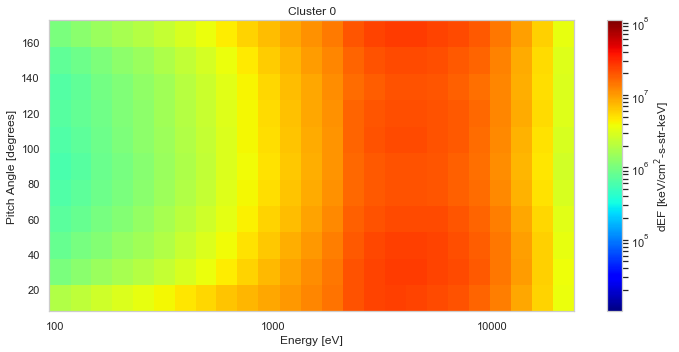

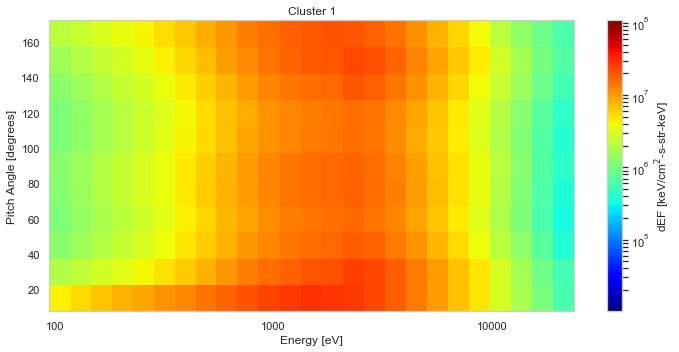

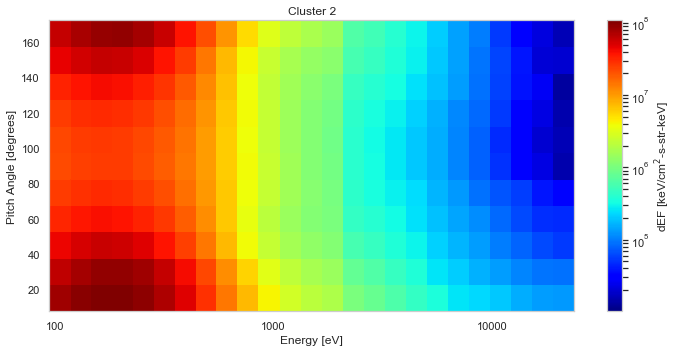

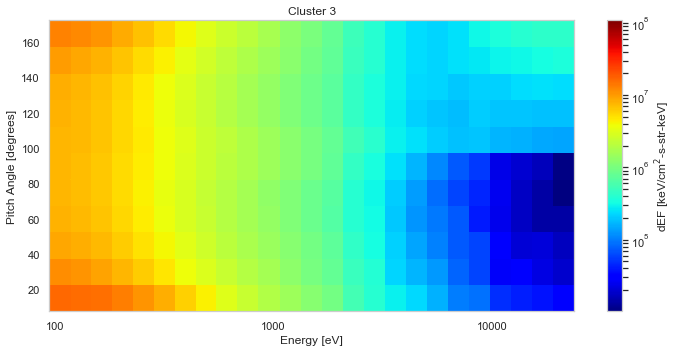

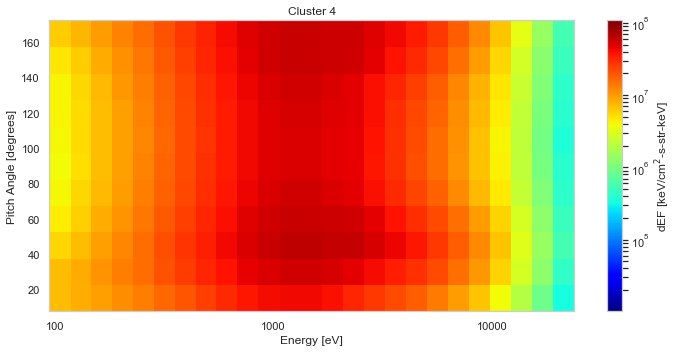

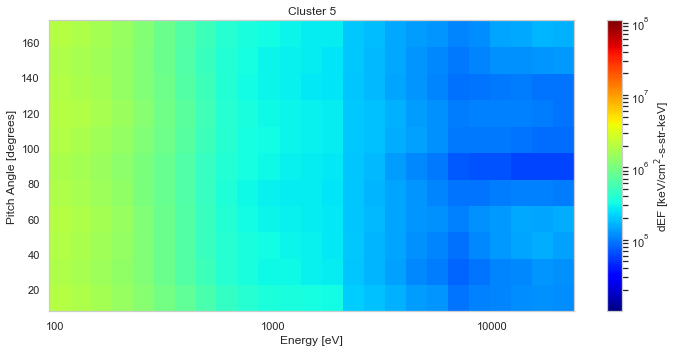

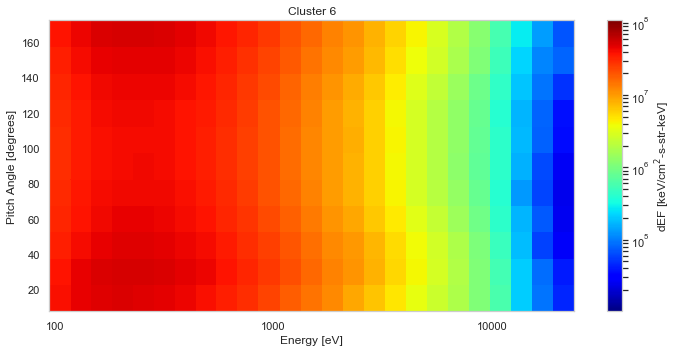

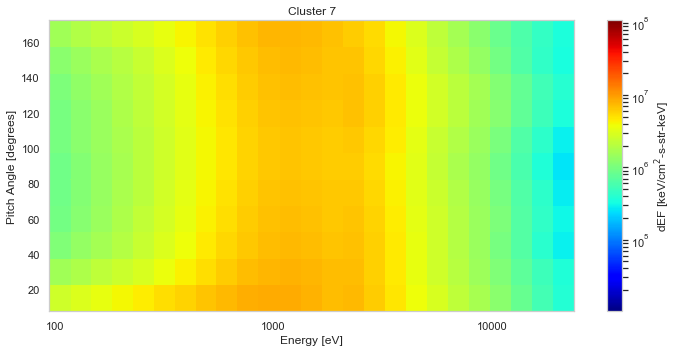

In [73]:
# average 2d plotting by cluster:
for i in range(len(all_data_means)):
    X, Y = np.meshgrid(energy4[0,0:26],pa4)
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    D = (all_data_means[i][0:len(pa4),0:26])
    vmin, vmax = np.min(all_data_means[:]), np.max(all_data_means[:])
    levels = np.linspace(vmin,vmax,10)
    surf = ax.pcolormesh((X), Y, D, cmap=cm.jet,norm=LogNorm(vmin,vmax))
    #surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
    cbar = fig.colorbar(surf)
    cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12) ####Particle or Energy Flux
    ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
    ax.set_xlabel('Energy [eV]',fontsize=12)
    ax.set_xscale('log')
    ax.set_title('Cluster '+str(i))

    #ax.set_xticks([50, 100, 200, 300, 400, 500])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.set_xlim(0,5)
    plt.tight_layout()
    plt.show()

0 = PS a (plasma sheet)

1 = PS b

2 = PSBL a

3 = PSBL b

4 = PS c

5 = Lobe

6 = PSBL c

7 = CS (current sheet)

In [74]:
# find energy bin with max flux for each cluster

peak_0 = []
peak_1 = []
peak_2 = []
peak_3 = []
peak_4 = []
peak_5 = []
peak_6 = []
peak_7 = []

for i in range(len(epoch_all)):
    if ac_clustering_3[i] == 0:
        peak_0.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 1:
        peak_1.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 2:
        peak_2.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 3:
        peak_3.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 4:
        peak_4.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 5:
        peak_5.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 6:
        peak_6.append(np.median(np.argmax(data_all[i,:],axis=1)))
    elif ac_clustering_3[i] == 7:
        peak_7.append(np.median(np.argmax(data_all[i,:],axis=1)))

In [75]:
print(int(np.mean(peak_0)),int(np.mean(peak_1)),int(np.mean(peak_2)),int(np.mean(peak_3)),int(np.mean(peak_4)),int(np.mean(peak_5)),int(np.mean(peak_6)),int(np.mean(peak_7)))
print(energy4[0,int(np.mean(peak_0))],energy4[0,int(np.mean(peak_1))],energy4[0,int(np.mean(peak_2))],energy4[0,int(np.mean(peak_3))],energy4[0,int(np.mean(peak_4))],energy4[0,int(np.mean(peak_5))],energy4[0,int(np.mean(peak_6))],energy4[0,int(np.mean(peak_7))])


6 10 21 23 12 22 20 11
6283.9 2588.8 226.28 145.8 1661.7 181.54 282.98 2071.7


In [76]:
# find pa bin with max flux for each cluster

pa_peak_0 = []
pa_peak_1 = []
pa_peak_2 = []
pa_peak_3 = []
pa_peak_4 = []
pa_peak_5 = []
pa_peak_6 = []
pa_peak_7 = []

for i in range(len(epoch_all)):
    if ac_clustering_3[i] == 0:
        pa_peak_0.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 1:
        pa_peak_1.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 2:
        pa_peak_2.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 3:
        pa_peak_3.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 4:
        pa_peak_4.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 5:
        pa_peak_5.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 6:
        pa_peak_6.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])
    if ac_clustering_3[i] == 7:
        pa_peak_7.append((np.unravel_index(data_all[i].argmax(), data_all[i].shape))[0])

In [77]:
print(pa1[int(np.mean(pa_peak_0))],pa1[int(np.mean(pa_peak_1))],pa1[int(np.mean(pa_peak_2))],pa1[int(np.mean(pa_peak_3))],pa1[int(np.mean(pa_peak_4))],pa1[int(np.mean(pa_peak_5))],pa1[int(np.mean(pa_peak_6))],pa1[int(np.mean(pa_peak_7))])
print(pa1[int(np.median(pa_peak_0))],pa1[int(np.median(pa_peak_1))],pa1[int(np.median(pa_peak_2))],pa1[int(np.median(pa_peak_3))],pa1[int(np.median(pa_peak_4))],pa1[int(np.median(pa_peak_5))],pa1[int(np.median(pa_peak_6))],pa1[int(np.median(pa_peak_7))])


82.5 67.5 52.5 97.5 67.5 82.5 82.5 82.5
97.5 67.5 22.5 142.5 37.5 97.5 52.5 82.5


In [78]:
# find how ratio of peak parallel to peak perpendicular flux compares for each class

ratio_0 = []
ratio_1 = []
ratio_2 = []
ratio_3 = []
ratio_4 = []
ratio_5 = []
ratio_6 = []
ratio_7 = []

for i in range(len(epoch_all)):
    peak_en = (np.unravel_index(data_all[i].argmax(), data_all[i].shape))[1]
    if ac_clustering_3[i] == 0:
        ratio_0.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 1:
        ratio_1.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 2:
        ratio_2.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 3:
        ratio_3.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 4:
        ratio_4.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 5:
        ratio_5.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 6:
        ratio_6.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])
    if ac_clustering_3[i] == 7:
        ratio_7.append(data_all[i,0,peak_en]/data_all[i,6,peak_en])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [79]:
print(np.median(ratio_0),np.median(ratio_1),np.median(ratio_2),np.median(ratio_3),np.median(ratio_4),np.median(ratio_5),np.median(ratio_6),np.median(ratio_7))


1.019457735247209 1.7208568296765194 4.1109850537389425 1.4169075510959235 0.7999683118117722 nan 1.13806207760728 1.2757799225770288


In [80]:
# find how ratio of peak parallel to peak anti-parallel flux compares for each class

par_ratio_0 = []
par_ratio_1 = []
par_ratio_2 = []
par_ratio_3 = []
par_ratio_4 = []
par_ratio_5 = []
par_ratio_6 = []
par_ratio_7 = []

for i in range(len(epoch_all)):
    peak_en = (np.unravel_index(data_all[i].argmax(), data_all[i].shape))[1]
    if ac_clustering_3[i] == 0:
        par_ratio_0.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 1:
        par_ratio_1.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 2:
        par_ratio_2.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 3:
        par_ratio_3.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 4:
        par_ratio_4.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 5:
        par_ratio_5.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 6:
        par_ratio_6.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])
    if ac_clustering_3[i] == 7:
        par_ratio_7.append(data_all[i,0,peak_en]/data_all[i,11,peak_en])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [81]:
print(np.median(par_ratio_0),np.median(par_ratio_1),np.median(par_ratio_2),np.median(par_ratio_3),np.median(par_ratio_4),np.median(par_ratio_5),np.median(par_ratio_6),np.median(par_ratio_7))
# negligible difference between median and mean

0.9984071677451468 1.339094091355355 1.0457943363999735 0.9203052930193973 0.8924573935541932 nan 1.0097160298512233 0.8396206824946356


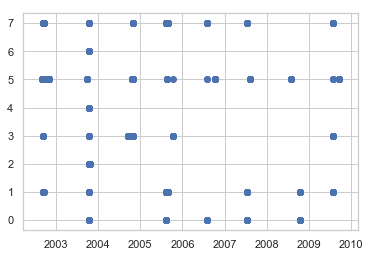

In [82]:
#plt.scatter(np.arange(0,len(epoch_all)),y_s_clustering)
plt.scatter(epoch_all,ac_clustering_3)

# Parameters

In [125]:
k_b = 1.38e-23 #m^2 kg s^-2 K^-1
mu_0 = 1.26e-6 #m kg s^-2 A^-2

In [126]:
times = (('2002','09','20','17','40','03','2002','09','20','19','15','46'),
         ('2002','09','13','13','11','22','2002','09','13','14','22','53'),
         ('2005','08','07','10','48','33','2005','08','07','12','32','36'),
         ('2005','08','28','16','18','37','2005','08','28','18','00','27'),
         ('2003','10','13','07','58','30','2003','10','13','11','32','07'),
        ('2003','10','18','04','54','33','2003','10','18','07','54','02'),
        ('2003','10','11','05','04','17','2003','10','11','06','13','28'),
        ('2007','07','17','10','39','13','2007','07','17','12','26','36'),
        ('2007','07','17','07','06','32','2007','07','17','08','32','45'),
        ('2003','10','23','08','12','41','2003','10','23','13','52','11'),
        ('2005','08','10','02','15','18','2005','08','10','03','21','29'),
        ('2008','10','16','00','36','41','2008','10','16','01','44','28'),
        ('2004','09','12','15','25','47','2004','09','12','16','27','14'),
        ('2006','08','04','05','20','38','2006','08','04','08','20','59'),
        ('2009','07','29','00','00','07','2009','07','29','01','03','52'),
        ('2002', '09', '01', '08', '49', '32','2002', '09', '01', '12', '10', '44'),
        ('2002', '09', '08', '14', '17', '19','2002', '09', '08', '17', '15', '48'),
        ('2002', '10', '29', '05', '31', '24','2002', '10', '29', '06', '51', '05'),
        ('2003', '09', '29', '02', '38', '25','2003', '09', '29', '05', '07', '01'),
        ('2004', '10', '22', '11', '54', '08','2004', '10', '22', '13', '12', '09'),
        ('2004', '10', '25', '15', '55', '02','2004', '10', '25', '17', '29', '19'),
        ('2005', '10', '12', '21', '03', '33','2005', '10', '12', '21', '04', '31'),
        ('2005', '08', '17', '13', '31', '44','2005', '08', '17', '14', '48', '09'),
        ('2006', '10', '07', '00', '00', '05','2006', '10', '07', '02', '48', '35'),
        ('2007', '08', '06', '17', '07', '06','2007', '08', '06', '19', '58', '28'),
        ('2008', '07', '26', '02', '27', '41','2008', '07', '26', '05', '53', '30'),
        ('2009', '09', '15', '12', '59', '53','2009', '09', '15', '15', '48', '48'))

In [127]:
epoch_fgm = []
B_vec_fgm = []
B_x_fgm = []
B_z_fgm = []
B_mag_fgm = []
pos_fgm = []
pos_x_fgm = []
pos_z_fgm = []

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    cdf_fgm = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_FGM_SPIN__'+stamp+'_V140305')
    
    epoch_fgm.append(cdf_fgm[0][...])
    B_vec_fgm.append(cdf_fgm[2][...])
    B_x_fgm.append(cdf_fgm[2][...][:,0])
    B_z_fgm.append(cdf_fgm[2][...][:,2])
    B_mag_fgm.append(cdf_fgm[3][...])
    pos_fgm.append(cdf_fgm[4][...])
    pos_x_fgm.append(cdf_fgm[4][...][:,0])
    pos_z_fgm.append(cdf_fgm[4][...][:,2])

In [128]:
all_epoch_fgm = []
all_B_vec_fgm = []
all_B_x_fgm = []
all_B_z_fgm = []
all_B_mag_fgm = []
all_pos_fgm = []
all_pos_x_fgm = []
all_pos_z_fgm = []

for i in range(len(epoch_fgm)):
    for j in range(len(epoch_fgm[i])):
        all_epoch_fgm.append(epoch_fgm[i][j])
        all_B_vec_fgm.append(B_vec_fgm[i][j])
        all_B_x_fgm.append(B_x_fgm[i][j])
        all_B_z_fgm.append(B_z_fgm[i][j])
        all_B_mag_fgm.append(B_mag_fgm[i][j])
        all_pos_fgm.append(pos_fgm[i][j]/6371.)
        all_pos_x_fgm.append(pos_x_fgm[i][j]/6371.)
        all_pos_z_fgm.append(pos_z_fgm[i][j]/6371.)

In [129]:
df_fgm = pd.DataFrame({'Timestamp':all_epoch_fgm, 'B_mag':all_B_mag_fgm, 'B_vec':all_B_vec_fgm, 'B_pos':all_pos_fgm, 'B_pos_x':all_pos_x_fgm, 'B_pos_z':all_pos_z_fgm, 'B_x':all_B_x_fgm, 'B_z':all_B_z_fgm})
df_fgm = df_fgm.sort_values(by='Timestamp')

In [130]:
epoch_cis = []
density_cis = [] #cm-3
T_cis = [] #MK then converted to eV

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    #remember .cdf 
    file = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V080213.cdf'
    file1 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V130131.cdf'
    file2 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V081210.cdf'
    file3 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V100518.cdf'
    file4 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__'+stamp+'_V110922.cdf'

    if os.path.exists(file):
        cdf_cis = pycdf.CDF(file)
    elif os.path.exists(file1):
        cdf_cis = pycdf.CDF(file1)
    elif os.path.exists(file2):
        cdf_cis = pycdf.CDF(file2)
    elif os.path.exists(file3):
        cdf_cis = pycdf.CDF(file3)
    elif os.path.exists(file4):
        cdf_cis = pycdf.CDF(file4)
    
    epoch_cis.append(cdf_cis[0][...])
    density_cis.append(cdf_cis[1][...])
    T_cis.append(cdf_cis[5][...])

In [131]:
all_epoch_cis = []
all_density_cis = []
all_T_cis = []

for i in range(len(epoch_cis)):
    for j in range(len(epoch_cis[i])):
        all_epoch_cis.append(epoch_cis[i][j])
        all_density_cis.append(density_cis[i][j])
        all_T_cis.append(T_cis[i][j]*86.21738)

In [132]:
df_cis = pd.DataFrame({'Timestamp':all_epoch_cis, 'density':all_density_cis, 'T':all_T_cis})
df_cis = df_cis.sort_values(by='Timestamp')

In [133]:
# merge CIS and FGM data into one dataframe based on timestamp
df_fgm['Timestamp'] = pd.to_datetime(df_fgm['Timestamp'])
df_cis['Timestamp'] = pd.to_datetime(df_cis['Timestamp'])
df_merge = pd.merge_asof(df_cis, df_fgm, on='Timestamp')
# calculate proton plasma beta
plasma_beta = (df_merge['density']*(100**3)*k_b*(df_merge['T']*(10**6)/86.21738))/(((df_merge['B_mag']*(10**-9))**2)/(2*mu_0))
df_merge['plasma_beta'] = plasma_beta

In [134]:
#merge AC clustering labels and parameters
df_ac_clustering = df_ac_clustering_3.sort_values(by='Timestamp')
df_ac_clustering['Timestamp'] = pd.to_datetime(df_ac_clustering['Timestamp'])

df_merge_v2 = pd.merge_asof(df_merge, df_ac_clustering, on='Timestamp')

y2 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2002].index)[0]
y3 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2003].index)[0]
y4 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2004].index)[0]
y5 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2005].index)[0]
y6 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2006].index)[0]
y7 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2007].index)[0]
y8 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2008].index)[0]
y9 = (df_merge_v2[df_merge_v2['Timestamp'].dt.year==2009].index)[0]

In [135]:
print(Counter(df_merge_v2['key_ac_clustering']))
print(len(df_merge_v2))

Counter({5: 9020, 7: 4031, 0: 3272, 3: 2886, 2: 2548, 1: 1550, 4: 1050, 6: 517})
24874


In [136]:
blue = mpatches.Patch(color=palette[0], label='PS a')
orange = mpatches.Patch(color=palette[1], label='PS b')
green = mpatches.Patch(color=palette[2], label='PSBL a')
red = mpatches.Patch(color=palette[3], label='PSBL b')
purple = mpatches.Patch(color=palette[4], label='PS c')
brown = mpatches.Patch(color=palette[5], label='Lobe')
pink = mpatches.Patch(color=palette[6], label='PSBL c')
grey = mpatches.Patch(color=palette[7], label='CS')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


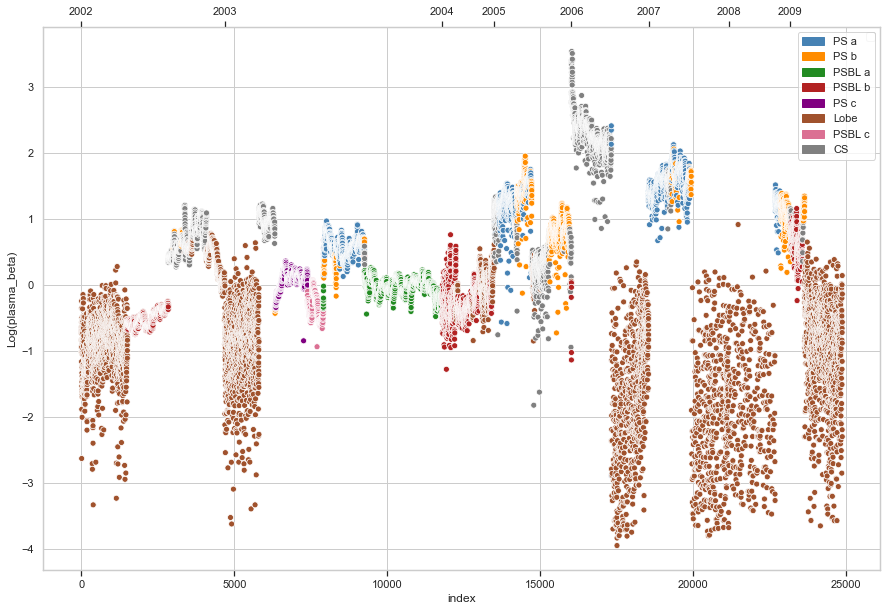

In [137]:
##plasma beta
plt.figure(figsize=(15,10))
plt.legend(labels=['CS','PSBL a','Active PS','PS','PSBL b'])
ax = sns.scatterplot(x=df_merge_v2.index, y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette, legend=False)
ax.set(xlabel='index',ylabel='Log(plasma_beta)')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

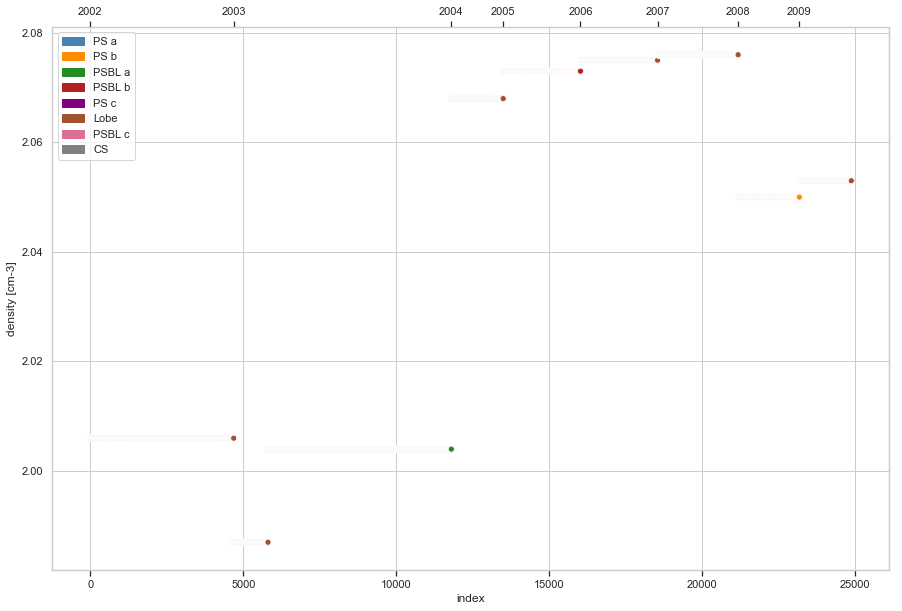

In [96]:
##ion density
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2.index, y=df_merge_v2["density"], data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='density [cm-3]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey],loc='upper left')
ax2.grid(False)

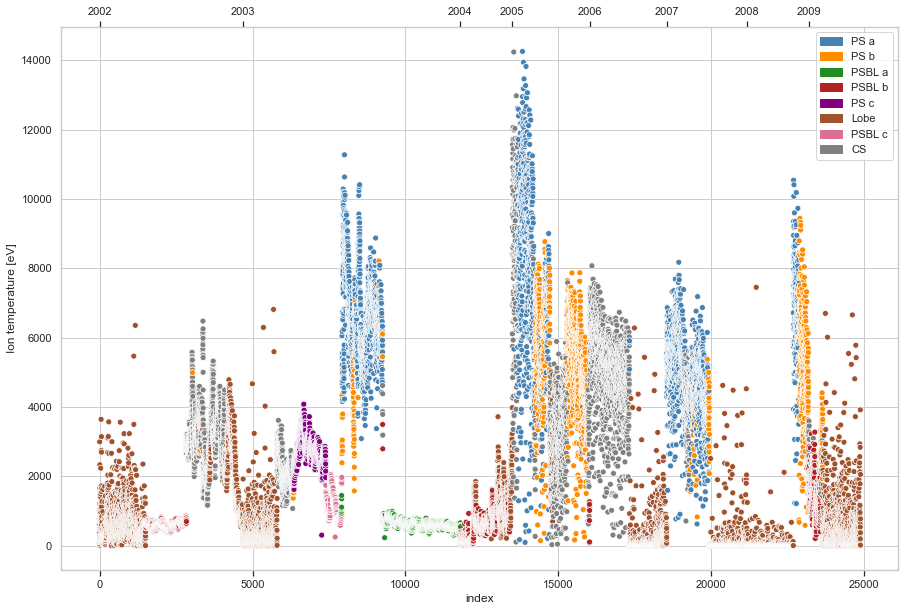

In [97]:
## ion temperature
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2.index, y=(df_merge_v2["T"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='Ion temperature [eV]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

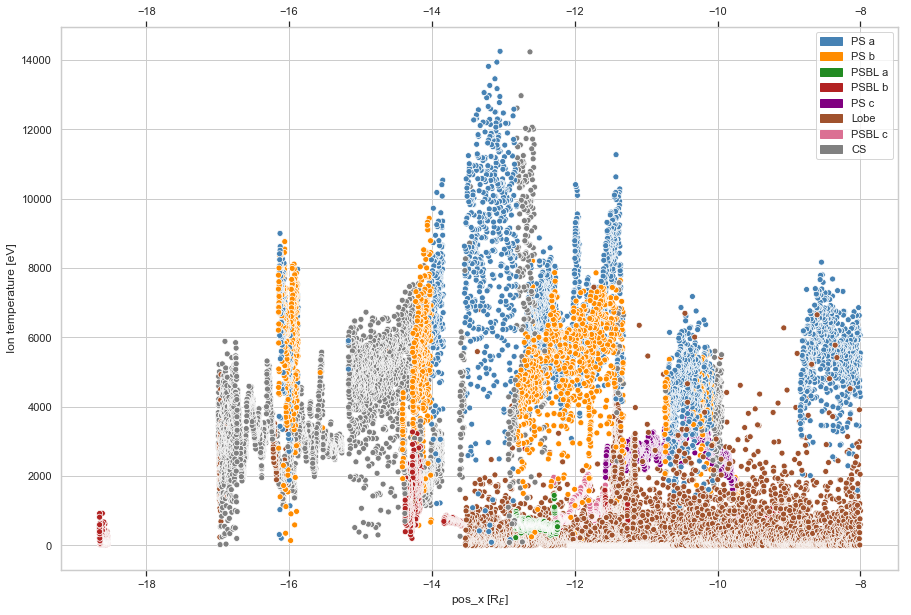

In [98]:
## ion temperature vs pos_x
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v2['B_pos_x'], y=(df_merge_v2["T"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='pos_x [R$_E$]',ylabel='Ion temperature [eV]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


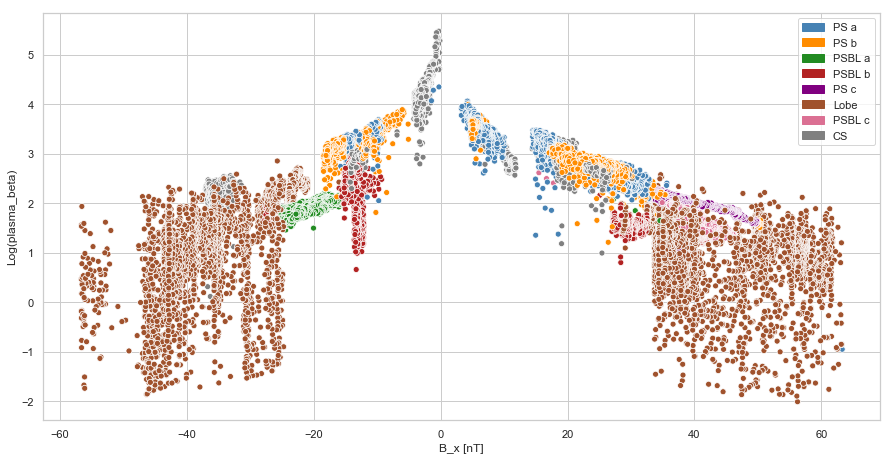

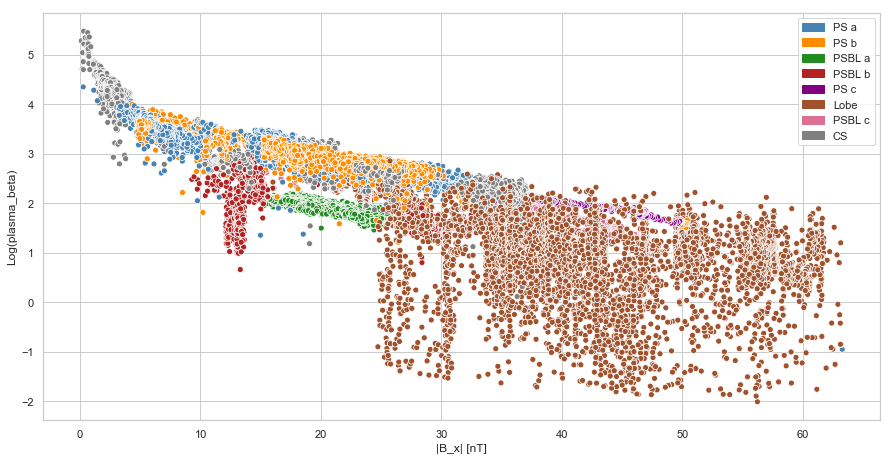

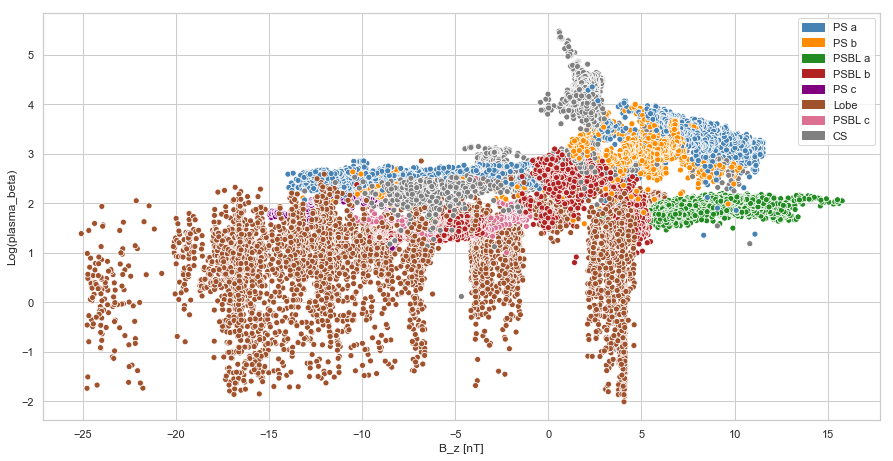

In [99]:
##plasma beta vs B_x
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v2["B_x"], y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_x [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
##plasma beta vs abs(B_x)
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=np.absolute(df_merge_v2["B_x"]), y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='|B_x| [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
##plasma beta vs B_z
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(df_merge_v2["B_z"], y=np.log10(df_merge_v2["plasma_beta"]), data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_z [nT]',ylabel='Log(plasma_beta)')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

In [100]:
#merge AC clustering labels and fgm parameters
df_ac_clustering = df_ac_clustering.sort_values(by='Timestamp')
df_ac_clustering['Timestamp'] = pd.to_datetime(df_ac_clustering['Timestamp'])

df_merge_v3 = pd.merge_asof(df_fgm, df_ac_clustering, on='Timestamp')

y2 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2002].index)[0]
y3 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2003].index)[0]
y4 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2004].index)[0]
y5 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2005].index)[0]
y6 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2006].index)[0]
y7 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2007].index)[0]
y8 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2008].index)[0]
y9 = (df_merge_v3[df_merge_v3['Timestamp'].dt.year==2009].index)[0]

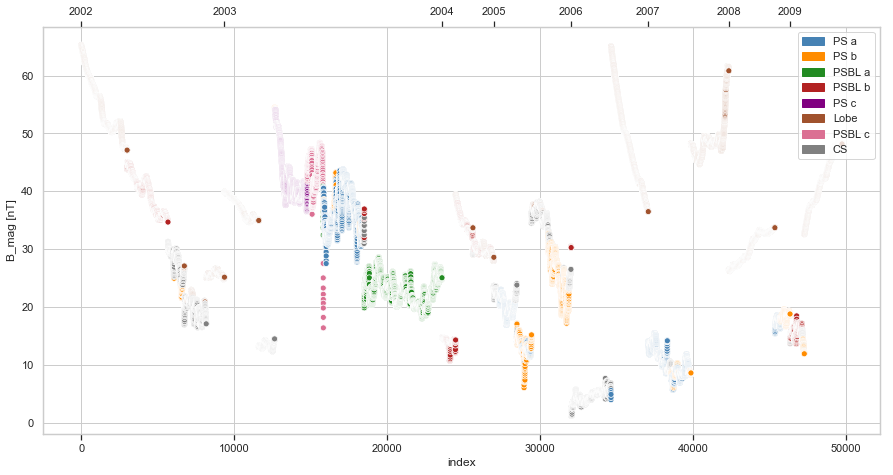

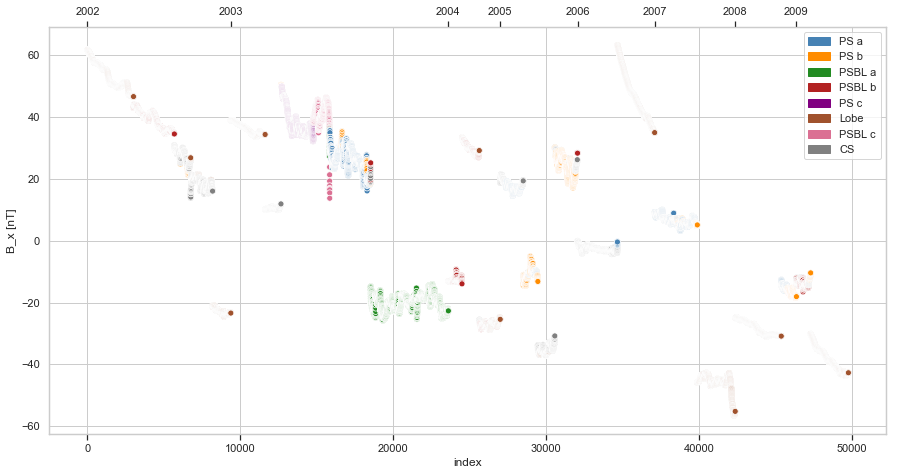

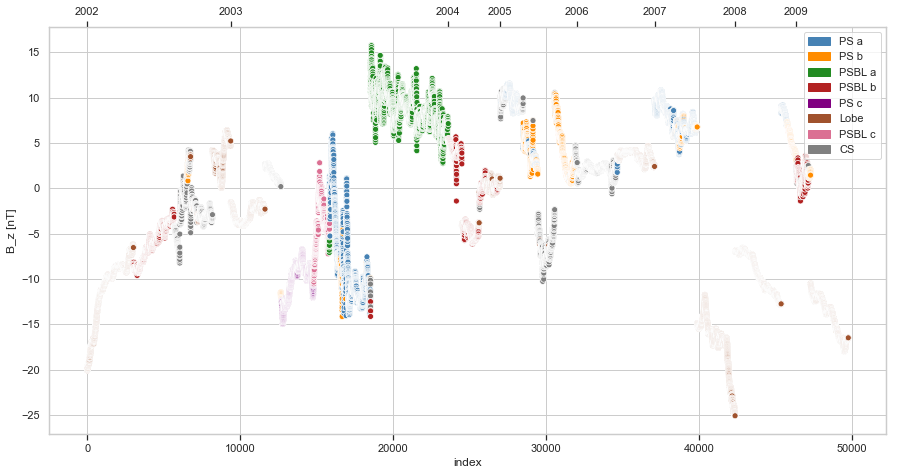

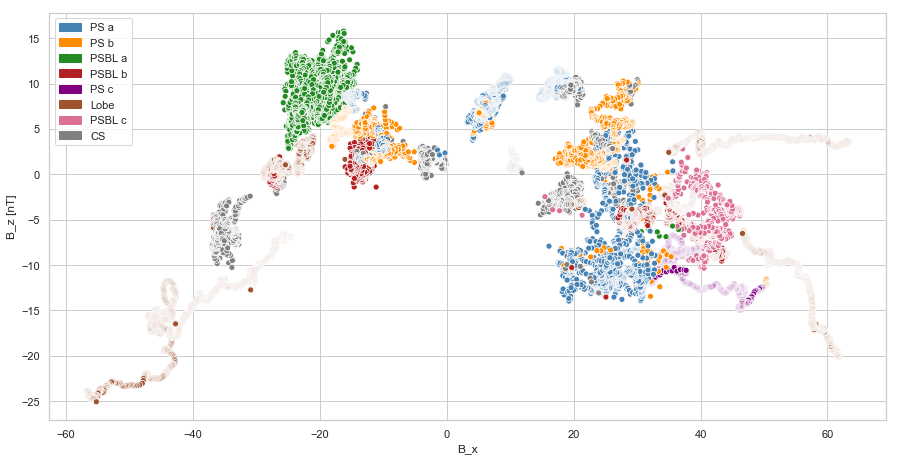

In [101]:
##B_mag
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=df_merge_v3['B_mag'], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='B_mag [nT]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##B_x
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=df_merge_v3['B_x'], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='B_x [nT]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##B_z
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(x=df_merge_v3.index, y=df_merge_v3['B_z'], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='B_z [nT]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
ax2.grid(False)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()
##B_x vs B_z
plt.figure(figsize=(15,7.5))
ax = sns.scatterplot(df_merge_v2["B_x"], df_merge_v2["B_z"], data=df_merge_v2, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='B_x',ylabel='B_z [nT]')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

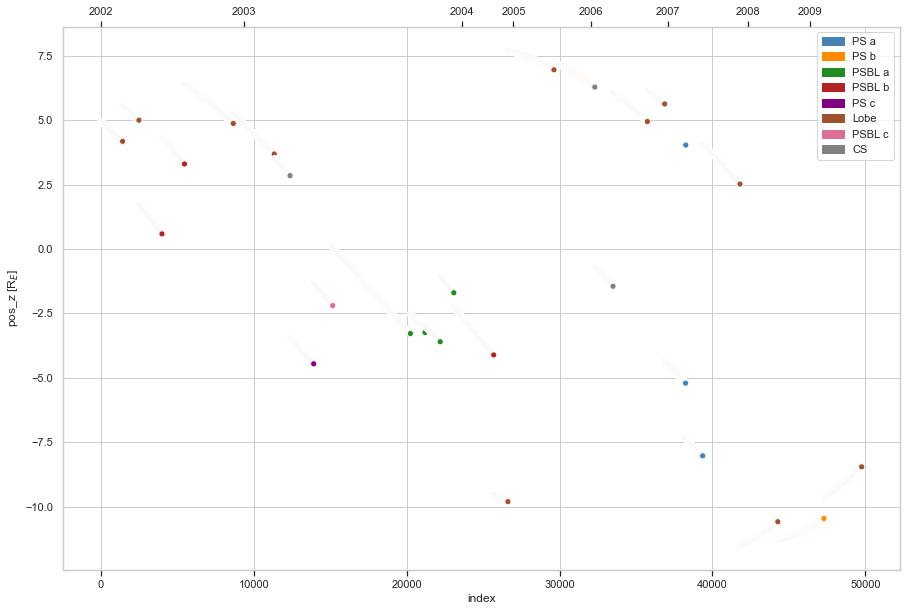

In [102]:
##position
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v3.index, y=np.array(all_pos_fgm)[:,2], data=df_merge_v3, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='pos_z [R$_{E}$]')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.array([y2,y3,y4,y5,y6,y7,y8,y9]))
ax2.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
ax2.grid(False)

In [103]:
all_pos_fgm_0 = []
all_pos_fgm_1 = []
all_pos_fgm_2 = []
all_pos_fgm_3 = []
all_pos_fgm_4 = []
all_pos_fgm_5 = []
all_pos_fgm_6 = []
all_pos_fgm_7 = []

for i in range(len(all_pos_fgm)):
    if df_merge_v3['key_ac_clustering'].iloc[i] == 0:
        all_pos_fgm_0.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 1:
        all_pos_fgm_1.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 2:
        all_pos_fgm_2.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 3:
        all_pos_fgm_3.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 4:
        all_pos_fgm_4.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 5:
        all_pos_fgm_5.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 6:
        all_pos_fgm_6.append(all_pos_fgm[i])
    if df_merge_v3['key_ac_clustering'].iloc[i] == 7:
        all_pos_fgm_7.append(all_pos_fgm[i])
        
        
# all_pos_fgm_0 = np.array(all_pos_fgm_0)/6371.
# all_pos_fgm_1 = np.array(all_pos_fgm_1)/6371.
# all_pos_fgm_2 = np.array(all_pos_fgm_2)/6371.
# all_pos_fgm_3 = np.array(all_pos_fgm_3)/6371.
# all_pos_fgm_4 = np.array(all_pos_fgm_4)/6371.
# all_pos_fgm_5 = np.array(all_pos_fgm_5)/6371.
# all_pos_fgm_6 = np.array(all_pos_fgm_6)/6371.
# all_pos_fgm_7 = np.array(all_pos_fgm_7)/6371.

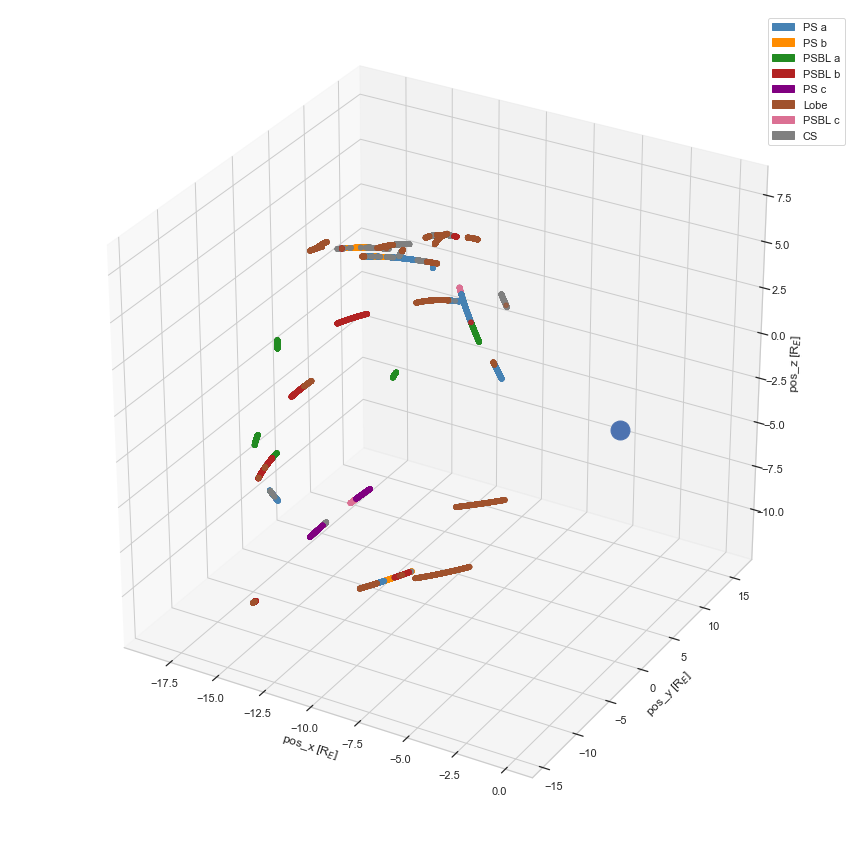

In [104]:
## GSE coordinates

%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(all_pos_fgm_0)[:,0],np.array(all_pos_fgm_0)[:,1],np.array(all_pos_fgm_0)[:,2], color=palette[0],s=20)
ax.scatter(np.array(all_pos_fgm_1)[:,0],np.array(all_pos_fgm_1)[:,1],np.array(all_pos_fgm_1)[:,2], color=palette[1],s=20)
ax.scatter(np.array(all_pos_fgm_2)[:,0],np.array(all_pos_fgm_2)[:,1],np.array(all_pos_fgm_2)[:,2], color=palette[2],s=20)
ax.scatter(np.array(all_pos_fgm_3)[:,0],np.array(all_pos_fgm_3)[:,1],np.array(all_pos_fgm_3)[:,2], color=palette[3],s=20)
ax.scatter(np.array(all_pos_fgm_4)[:,0],np.array(all_pos_fgm_4)[:,1],np.array(all_pos_fgm_4)[:,2], color=palette[4],s=20)
ax.scatter(np.array(all_pos_fgm_5)[:,0],np.array(all_pos_fgm_5)[:,1],np.array(all_pos_fgm_5)[:,2], color=palette[5],s=20)
ax.scatter(np.array(all_pos_fgm_6)[:,0],np.array(all_pos_fgm_6)[:,1],np.array(all_pos_fgm_6)[:,2], color=palette[6],s=20)
ax.scatter(np.array(all_pos_fgm_7)[:,0],np.array(all_pos_fgm_7)[:,1],np.array(all_pos_fgm_7)[:,2], color=palette[7],s=20)
ax.scatter(0,0,0,s=360)
ax.set_xlabel('pos_x [R$_{E}$]')
ax.set_ylabel('pos_y [R$_{E}$]')
ax.set_zlabel('pos_z [R$_{E}$]')

plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

In [105]:
epoch_pea = []
density_pea = []
T_par_pea = [] #mK then convert to eV
T_perp_pea = [] #mK then convert to eV

for i in range(len(times)):
    
    stamp = times[i][0]+times[i][1]+times[i][2]+'_'+times[i][3]+times[i][4]+times[i][5]+'_'+times[i][6]+times[i][7]+times[i][8]+'_'+times[i][9]+times[i][10]+times[i][11]
    
    #remember .cdf 
    file = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V140315.cdf'
    file1 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V190306.cdf'
    file2 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V190319.cdf'
    file3 = '/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__'+stamp+'_V190326.cdf'

    if os.path.exists(file):
        cdf_pea = pycdf.CDF(file)
    elif os.path.exists(file1):
        cdf_pea = pycdf.CDF(file1)
    elif os.path.exists(file2):
        cdf_pea = pycdf.CDF(file2)
    elif os.path.exists(file3):
        cdf_pea = pycdf.CDF(file3)
    
    epoch_pea.append(cdf_pea[0][...])
    density_pea.append(cdf_pea[19][...])
    T_par_pea.append(cdf_pea[25][...])
    T_perp_pea.append(cdf_pea[26][...])

In [106]:
all_epoch_pea = []
all_density_pea = []
all_T_par_pea = []
all_T_perp_pea = []
all_T_ani_pea = []
all_T_pea = []

for i in range(len(epoch_pea)):
    for j in range(len(epoch_pea[i])):
        all_epoch_pea.append(epoch_pea[i][j])
        all_density_pea.append(density_pea[i][j])
        all_T_par_pea.append(T_par_pea[i][j]*86.21738)
        all_T_perp_pea.append(T_perp_pea[i][j]*86.21738)
        all_T_ani_pea.append(T_par_pea[i][j]/T_perp_pea[i][j])
        all_T_pea.append((1/3)*(2*(T_perp_pea[i][j])+T_par_pea[i][j]))

In [107]:
df_pea = pd.DataFrame({'Timestamp':all_epoch_pea, 'density_pea':all_density_pea, 'T_par_pea':all_T_par_pea, 'T_perp_pea':all_T_perp_pea, 'T_ani_pea':all_T_ani_pea, 'T_pea':all_T_pea})
df_pea = df_pea.sort_values(by='Timestamp')

In [108]:
df_pea['Timestamp'] = pd.to_datetime(df_pea['Timestamp'])
df_ac_clustering['Timestamp'] = pd.to_datetime(df_ac_clustering['Timestamp'])

df_merge_v4 = pd.merge_asof(df_pea, df_ac_clustering, on='Timestamp')

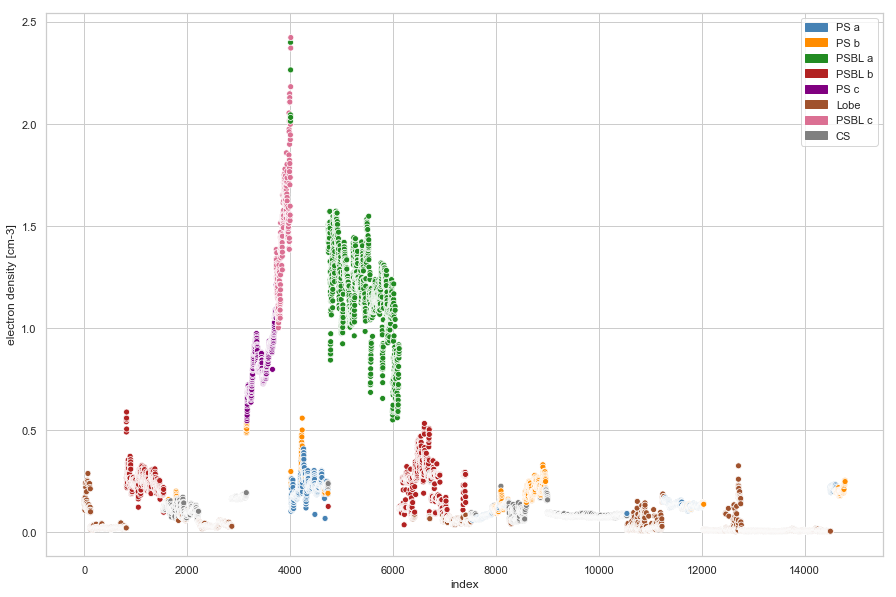

In [109]:
## electron density
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=df_merge_v4['density_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron density [cm-3]')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

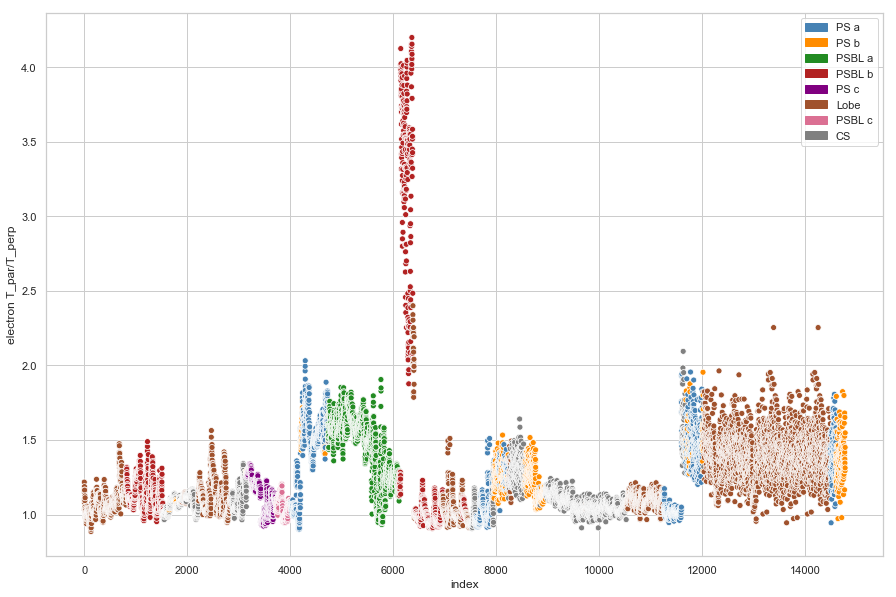

In [110]:
## electron anisotropy (T_par/T_perp)
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=np.array(all_T_ani_pea), data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron T_par/T_perp')
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])

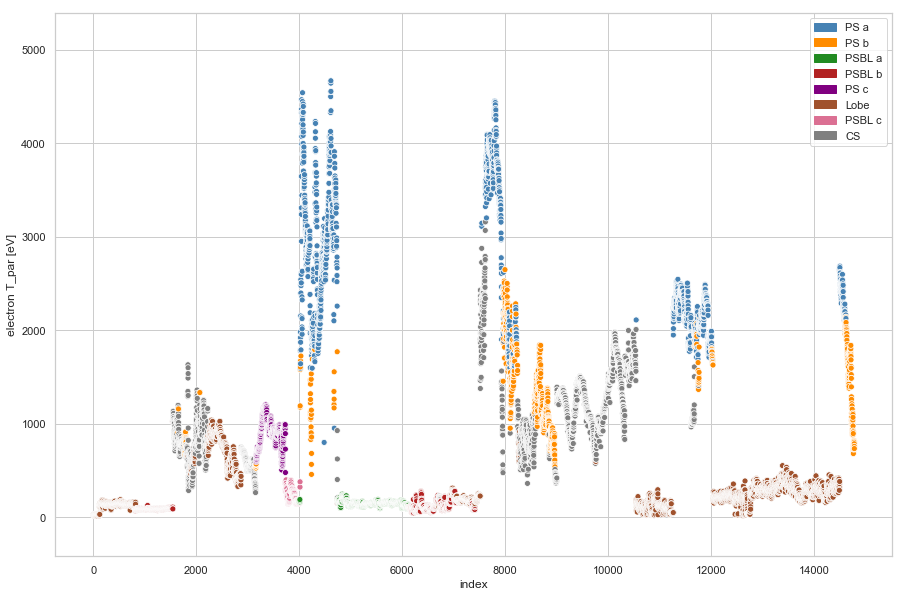

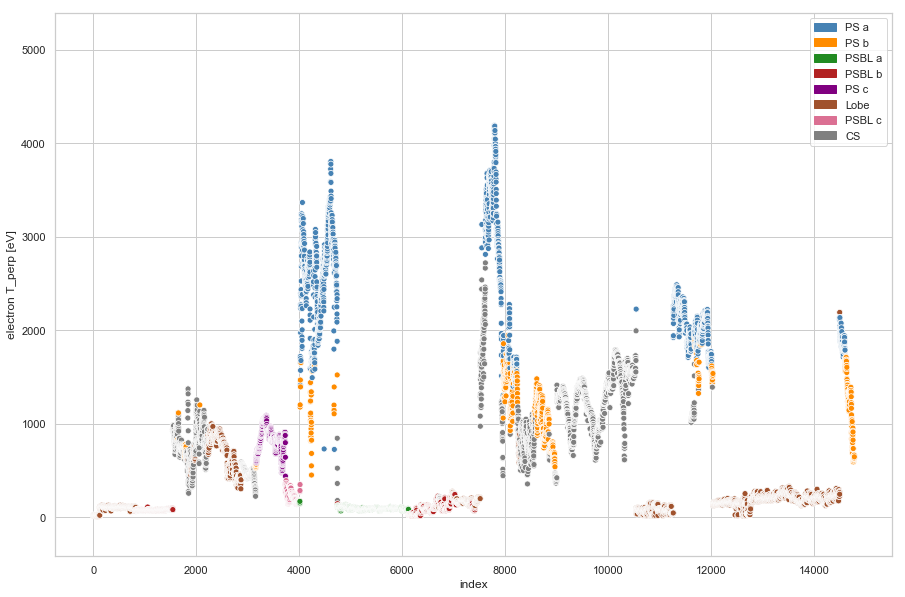

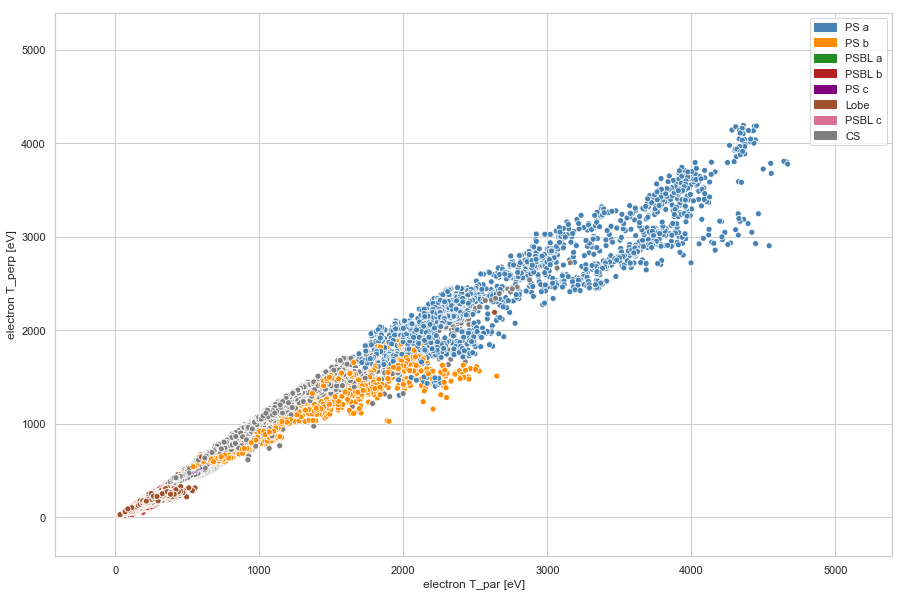

In [111]:
## electron T_par
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=df_merge_v4['T_par_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron T_par [eV]')
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()

## electron T_perp
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4.index, y=df_merge_v4['T_perp_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='index',ylabel='electron T_perp [eV]')
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()

## electron T_par vs. T_perp
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v4['T_par_pea'], y=df_merge_v4['T_perp_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='electron T_par [eV]',ylabel='electron T_perp [eV]')
ax.set_xlim(-5*83,65*83)
ax.set_ylim(-5*83,65*83)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()


In [112]:
df_merge_v5 = pd.merge_asof(df_pea, df_merge_v2, on='Timestamp')

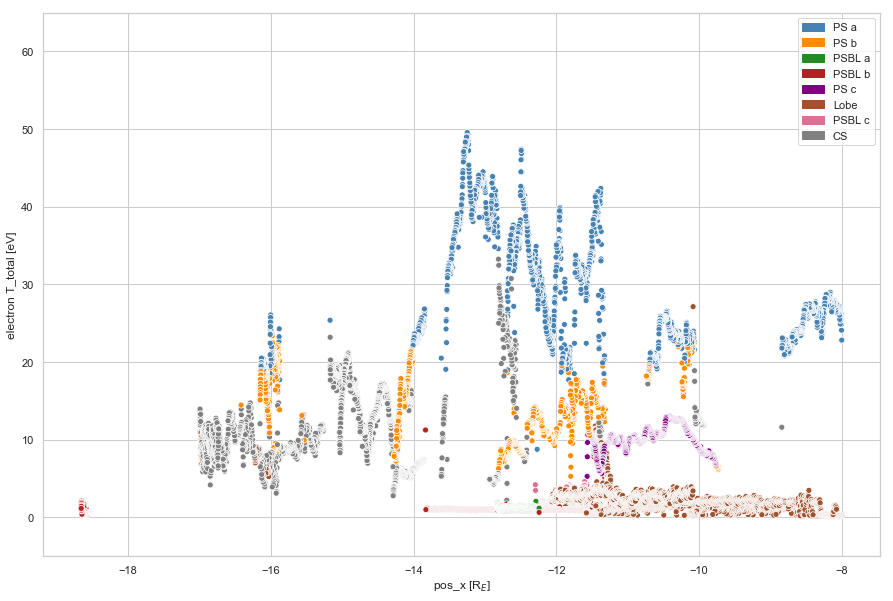

In [113]:
## electron T_total vs pos_x
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_merge_v5['B_pos_x'], y=df_merge_v5['T_pea'], data=df_merge_v4, hue='key_ac_clustering',palette=palette,legend=False)
ax.set(xlabel='pos_x [R$_{E}$]',ylabel='electron T_total [eV]')
ax.set_ylim(-5,65)
plt.legend(handles=[blue,orange,green,red,purple,brown,pink,grey])
plt.show()

Lui, A. T. Y.: Road map to magnetotail domains., in Magnetotail Physics, pp. 3–9, Johns Hopkins Unversity Press, 1987.


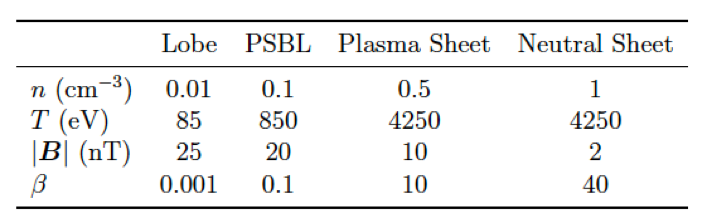

In [123]:
magnetotail_parameters = Image.open("/Users/mayur/PhD/Plots/magnetotail_params.png")
print('Lui, A. T. Y.: Road map to magnetotail domains., in Magnetotail Physics, pp. 3–9, Johns Hopkins Unversity Press, 1987.')
magnetotail_parameters